#**Advance Machine Learning Assignment - Telecom Churn Case Study**

#**Problem Statement**
In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

 

For many incumbent operators, retaining high profitable customers is the number one business goal.

 

To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

 

In this project, you will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

 

**Understanding and defining churn**

There are two main models of payment in the telecom industry - postpaid (customers pay a monthly/annual bill after using the services) and prepaid (customers pay/recharge with a certain amount in advance and then use the services).

 

In the postpaid model, when customers want to switch to another operator, they usually inform the existing operator to terminate the services, and you directly know that this is an instance of churn.

 

However, in the prepaid model, customers who want to switch to another network can simply stop using the services without any notice, and it is hard to know whether someone has actually churned or is simply not using the services temporarily (e.g. someone may be on a trip abroad for a month or two and then intend to resume using the services again).

 

Thus, churn prediction is usually more critical (and non-trivial) for prepaid customers, and the term ‘churn’ should be defined carefully.  Also, prepaid is the most common model in India and Southeast Asia, while postpaid is more common in Europe in North America.

 

This project is based on the Indian and Southeast Asian market.

 

**Definitions of churn**
There are various ways to define churn, such as:

 

**Revenue-based churn:** Customers who have not utilised any revenue-generating facilities such as mobile internet, outgoing calls, SMS etc. over a given period of time. One could also use aggregate metrics such as ‘customers who have generated less than INR 4 per month in total/average/median revenue’.

 

The main shortcoming of this definition is that there are customers who only receive calls/SMSes from their wage-earning counterparts, i.e. they don’t generate revenue but use the services. For example, many users in rural areas only receive calls from their wage-earning siblings in urban areas.

 

**Usage-based churn:** Customers who have not done any usage, either incoming or outgoing - in terms of calls, internet etc. over a period of time.

 

A potential shortcoming of this definition is that when the customer has stopped using the services for a while, it may be too late to take any corrective actions to retain them. For e.g., if you define churn based on a ‘two-months zero usage’ period, predicting churn could be useless since by that time the customer would have already switched to another operator.

 

In this project, you will use the usage-based definition to define churn.

 

**High-value churn**
In the Indian and the Southeast Asian market, approximately 80% of revenue comes from the top 20% customers (called high-value customers). Thus, if we can reduce the churn of the high-value customers, we will be able to reduce significant revenue leakage.

 

In this project, you will define high-value customers based on a certain metric (mentioned later below) and predict churn only on high-value customers.

 

**Understanding the business objective and the data**
The dataset contains customer-level information for a span of four consecutive months - June, July, August and September. The months are encoded as 6, 7, 8 and 9, respectively. 


The business objective is to predict the churn in the last (i.e. the ninth) month using the data (features) from the first three months. To do this task well, understanding the typical customer behaviour during churn will be helpful.

 

**Understanding customer behaviour during churn**
Customers usually do not decide to switch to another competitor instantly, but rather over a period of time (this is especially applicable to high-value customers). In churn prediction, we assume that there are three phases of customer lifecycle :

**The ‘good’ phase:** In this phase, the customer is happy with the service and behaves as usual.

**The ‘action’ phase:** The customer experience starts to sore in this phase, for e.g. he/she gets a compelling offer from a  competitor, faces unjust charges, becomes unhappy with service quality etc. In this phase, the customer usually shows different behaviour than the ‘good’ months. Also, it is crucial to identify high-churn-risk customers in this phase, since some corrective actions can be taken at this point (such as matching the competitor’s offer/improving the service quality etc.)

**The ‘churn’ phase:** In this phase, the customer is said to have churned. You define churn based on this phase. Also, it is important to note that at the time of prediction (i.e. the action months), this data is not available to you for prediction. Thus, after tagging churn as 1/0 based on this phase, you discard all data corresponding to this phase.

 

In this case, since you are working over a four-month window, the first two months are the ‘good’ phase, the third month is the ‘action’ phase, while the fourth month is the ‘churn’ phase.

======================= END OF PROBLEM STATEMENT =================================

#**Beginning of Case Study**

##**1. Importing the Necessary Libraries**

In [404]:
#Suppress Warnings
import warnings
warnings.filterwarnings("ignore")

#Importing Libraries
import numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns
import statsmodels.api as sm
%matplotlib inline
pd.options.display.max_columns = 300
pd.options.display.max_rows = 1000

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn import metrics
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import plot_roc_curve
from sklearn.tree import DecisionTreeClassifier

##**2. Reading, Understanding the Data**

In [405]:
#Reading the dataset
df_tel = pd.read_csv("telecom_churn_data.csv")

In [406]:
#Looking at the dataset
df_tel.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0            9/30/2014  197.385  214.816  213.803   21.100          NaN   
1            9/30/2014   34.047  355.074  268.321   86.285        24.11   
2            9/30/2014  167.690  189.058  210.226  290.714        11.54   
3            9/30/2014  221.338  251.102  508.054  389.500        99.91   
4            9/30/2014  261.636  309.876  238.174  163.426        50.31   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          NaN         0.00          NaN           NaN           NaN   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   
3        54.39       310.98       241.71        123.31        109.01   
4       149.44        83.89        58.78         76.96         91.88   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00           NaN            NaN            NaN           0.00   
1        304.76         53.76            0.0           0.00           0.00   
2        208.36        118.91            0.0           0.00           0.00   
3         71.68        113.54            0.0          54.86          44.38   
4        124.26         45.81            0.0           0.00           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            NaN            NaN            NaN           0.00            NaN   
1           0.00            0.0           0.00           0.00           0.00   
2          38.49            0.0           0.00           0.00          70.94   
3           0.00            0.0          28.09          39.04           0.00   
4           0.00            0.0           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0               NaN               NaN              0.00               NaN   
1             23.88             74.56              7.68             18.34   
2              7.19             28.74             13.58             14.39   
3             73.68             34.81             10.61             15.49   
4             50.31            149.44             83.89             58.78   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0               NaN               NaN              0.00               NaN   
1             11.51             75.94            291.86             53.76   
2             29.34             16.86             38.46             28.16   
3            107.43             83.21             22.46             65.46   
4             67.64             91.88            124.26             37.89   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0               NaN               NaN              0.00               NaN   
1              0.00              0.00              0.00              0.00   
2             24.11             21.79             15.61             22.24   
3              1.91              0.65              

In [407]:
#Checking the shape of the dataframe
df_tel.shape 

(99999, 226)

In [408]:
#Checking the info of the dataframe
df_tel.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    mobile_number             int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    last_date_of_month_9      object 
 9    arpu_6                    float64
 10   arpu_7                    float64
 11   arpu_8                    float64
 12   arpu_9                    float64
 13   onnet_mou_6               float64
 14   onnet_mou_7               float64
 15   onnet_mou_8               float64
 16   onnet_mou_9               float64
 17   offnet_mou_6              float64
 18   offnet_mou_7              float64
 19   offnet_mou_8              float64
 20   offn

In [409]:
#Looking at the statistics of the data
df_tel.describe(include = 'all')

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count    9.999900e+04    99999.0         98981.0         98981.0   
unique            NaN        NaN             NaN             NaN   
top               NaN        NaN             NaN             NaN   
freq              NaN        NaN             NaN             NaN   
mean     7.001207e+09      109.0             0.0             0.0   
std      6.956694e+05        0.0             0.0             0.0   
min      7.000000e+09      109.0             0.0             0.0   
25%      7.000606e+09      109.0             0.0             0.0   
50%      7.001205e+09      109.0             0.0             0.0   
75%      7.001812e+09      109.0             0.0             0.0   
max      7.002411e+09      109.0             0.0             0.0   

        loc_ic_t2o_mou last_date_of_month_6 last_date_of_month_7  \
count          98981.0                99999                99398   
unique             NaN                    1                    1   
top                NaN            6/30/2014            7/31/2014   
freq               NaN                99999                99398   
mean               0.0                  NaN                  NaN   
std                0.0                  NaN                  NaN   
min                0.0                  NaN                  NaN   
25%                0.0                  NaN                  NaN   
50%                0.0                  NaN                  NaN   
75%                0.0                  NaN                  NaN   
max                0.0                  NaN                  NaN   

       last_date_of_month_8 last_date_of_month_9        arpu_6        arpu_7  \
count                 98899                98340  99999.000000  99999.000000   
unique                    1                    1           NaN           NaN   
top               8/31/2014            9/30/2014           NaN           NaN   
freq                  98899                98340           NaN           NaN   
mean                    NaN                  NaN    282.987358    278.536648   
std                     NaN                  NaN    328.439770    338.156291   
min                     NaN                  NaN  -2258.709000  -2014.045000   
25%                     NaN                  NaN     93.411500     86.980500   
50%                     NaN                  NaN    197.704000    191.640000   
75%                     NaN                  NaN    371.060000    365.344500   
max                     NaN                  NaN  27731.088000  35145.834000   

              arpu_8        arpu_9   onnet_mou_6   onnet_mou_7   onnet_mou_8  \
count   99999.000000  99999.000000  96062.000000  96140.000000  94621.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean      279.154731    261.645069    132.395875    133.670805    133.018098   
std       344.474791    341.998630    297.207406    308.794148    308.951589   
min      -945.808000  -1899.505000      0.000000      0.000000      0.000000   
25%        84.126000     62.685000      7.380000      6.660000      6.460000   
50%       192.080000    176.849000     34.310000     32.330000     32.360000   
75%       369.370500    353.466500    118.740000    115.595000    115.860000   
max     33543.624000  38805.617000   7376.710000   8157.780000  10752.560000   

         onnet_mou_9  offnet_mou_6  offnet_mou_7  offnet_mou_8  offnet_mou_9  \
count   92254.000000  96062.000000  96140.000000  94621.000000  92254.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean      130.302327    197.935577    197.045133    

##**3. Finding High Value Customers & Tagging Churn**


We need to find out total amount spent by customers on data recharge.

We will derive new columns by taking product of `av_rech_amt_data_6,7,8 & 9` multiplied by `total_rech_data_6,7,8 & 9`


In [410]:
#Adding new columns having av_rech_amt_data_6,7,8 & 9 multiplied by total_rech_data_6,7,8 & 9
df_tel['total_rech_data_amt_6'] = df_tel['av_rech_amt_data_6'] * df_tel['total_rech_data_6']
df_tel['total_rech_data_amt_7'] = df_tel['av_rech_amt_data_7'] * df_tel['total_rech_data_7']
df_tel['total_rech_data_amt_8'] = df_tel['av_rech_amt_data_8'] * df_tel['total_rech_data_8']
df_tel['total_rech_data_amt_9'] = df_tel['av_rech_amt_data_9'] * df_tel['total_rech_data_9']

We will find out the average recharge done "the good phase" (6 & 7 month). The total amount spent will be the sum of total data recharge done and total call/sms recharges

In [411]:
# Finding out the average recharge done "the good phase" (6 & 7 month) and total amount spent 
df_tel_good_phase = (df_tel['total_rech_amt_6'].fillna(0) 
+ df_tel['total_rech_amt_7'].fillna(0) 
+ df_tel['total_rech_data_amt_6'].fillna(0) 
+ df_tel['total_rech_data_amt_7'].fillna(0))/2

print("Recharge amount at 70th percentile: {0}".format(df_tel_good_phase.quantile(0.7)))

Recharge amount at 70th percentile: 478.0


**Finding High Value Customers**

As explained in problem statement, we will take the 70th percentile of the calculated average amount for good phase

In [412]:
# The 70th percentile of the calculated average amount for good phase
df_tel_good_phase_70= np.percentile(df_tel_good_phase, 70.0)
print(df_tel_good_phase_70)

# We will keep data only for high valued customers as explained in problem 
df_tel_hvc = df_tel[df_tel_good_phase >= df_tel_good_phase_70]
print(df_tel_hvc.shape)

478.0
(30001, 230)


In [413]:
#Checking with Null Values once again
((df_tel_hvc.isnull().sum() * 100)/len(df_tel_hvc)).sort_values(ascending = False)

total_rech_data_amt_9       49.268358
night_pck_user_9            49.268358
count_rech_2g_9             49.268358
max_rech_data_9             49.268358
count_rech_3g_9             49.268358
total_rech_data_9           49.268358
av_rech_amt_data_9          49.268358
date_of_last_rech_data_9    49.268358
arpu_2g_9                   49.268358
arpu_3g_9                   49.268358
fb_user_9                   49.268358
night_pck_user_8            46.825106
arpu_3g_8                   46.825106
total_rech_data_amt_8       46.825106
count_rech_3g_8             46.825106
max_rech_data_8             46.825106
av_rech_amt_data_8          46.825106
date_of_last_rech_data_8    46.825106
total_rech_data_8           46.825106
fb_user_8                   46.825106
arpu_2g_8                   46.825106
count_rech_2g_8             46.825106
arpu_3g_6                   44.148528
arpu_2g_6                   44.148528
total_rech_data_6           44.148528
max_rech_data_6             44.148528
av_rech_amt_

**Tagging Churn**

We will tag "churn" in a new column, values would be either 1 (churn) or 0 (non-churn). we will calculate churn/non-churn based on the usage as mentioned in the problem statement

The attributes you need to use to tag churners are:

* total_ic_mou_9

* total_og_mou_9

* vol_2g_mb_9

* vol_3g_mb_9

In [414]:
#Adding a new "Churn" column based on above defined parameters 

#Here 0 - not churn, 1 - churn

df_tel_hvc['churn'] = df_tel_hvc[['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']].sum(axis=1)
df_tel_hvc['churn'] = df_tel_hvc['churn'].apply(lambda x: 0 if x > 0 else 1)
df_tel_hvc.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0      7000842753        109             0.0             0.0             0.0   
7      7000701601        109             0.0             0.0             0.0   
8      7001524846        109             0.0             0.0             0.0   
21     7002124215        109             0.0             0.0             0.0   
23     7000887461        109             0.0             0.0             0.0   

   last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0             6/30/2014            7/31/2014            8/31/2014   
7             6/30/2014            7/31/2014            8/31/2014   
8             6/30/2014            7/31/2014            8/31/2014   
21            6/30/2014            7/31/2014            8/31/2014   
23            6/30/2014            7/31/2014            8/31/2014   

   last_date_of_month_9    arpu_6    arpu_7    arpu_8   arpu_9  onnet_mou_6  \
0             9/30/2014   197.385   214.816   213.803   21.100          NaN   
7             9/30/2014  1069.180  1349.850  3171.480  500.000        57.84   
8             9/30/2014   378.721   492.223   137.362  166.787       413.69   
21            9/30/2014   514.453   597.753   637.760  578.596       102.41   
23            9/30/2014    74.350   193.897   366.966  811.480        48.96   

    onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0           NaN         0.00          NaN           NaN           NaN   
7         54.68        52.29          NaN        453.43        567.16   
8        351.03        35.08        33.46         94.66         80.63   
21       132.11        85.14       161.63        757.93        896.68   
23        50.66        33.58        15.74         85.41         89.36   

    offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0           0.00           NaN            NaN            NaN           0.00   
7         325.91           NaN          16.23          33.49          31.64   
8         136.48        108.71           0.00           0.00           0.00   
21        983.39        869.89           0.00           0.00           0.00   
23        205.89        111.88           0.00           0.00           0.00   

    roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0             NaN            NaN            NaN           0.00            NaN   
7             NaN          23.74          12.59          38.06            NaN   
8             0.0           0.00           0.00           0.00            0.0   
21            0.0           0.00           0.00           0.00            0.0   
23            0.0           0.00           0.00           0.00            0.0   

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0                NaN               NaN              0.00               NaN   
7              51.39             31.38             40.28               NaN   
8             297.13            217.59             12.49             26.13   
21              4.48              6.16             23.34             29.98   
23             48.96             50.66             33.58             15.74   

    loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0                NaN               NaN              0.00               NaN   
7             308.63            447.38            162.28               NaN   
8              80.96             70.58             50.54             34.58   
21             91.81             87.93            104.81            107.54   
23             82.94             83.01            148.56             83.73   

    loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0                NaN               NaN              0.00               NaN   
7              62.13             55.14             53.23               NaN   
8               0.00              0.00              0.00    

Looking at the percentage of both classes 1 (churn) or 0 (non-churn) in the dataset to identify the skewdness

In [415]:
#Looking the the value_counts of new churn column
print(f'Churn Ratio: \n{(df_tel_hvc.churn.value_counts()*100/df_tel_hvc.shape[0]).round(3)}')

Churn Ratio: 
0    91.864
1     8.136
Name: churn, dtype: float64


##**4. Data Cleaning & Preparation**

We can now drop columns av_rech_amt_data_x, total_rech_data_x (where x = 6/7/8/9 month)

In [416]:
#Dropping columns av_rech_amt_data_x, total_rech_data_x (where x = 6/7/8/9 month)
df_tel.drop(['total_rech_data_6','total_rech_data_7', 'total_rech_data_8','total_rech_data_9', 'av_rech_amt_data_6','av_rech_amt_data_7', 'av_rech_amt_data_8','av_rech_amt_data_9'], axis = 1,inplace = True)

We can see that "vbc" columns have month names in their header i.e.,(aug, jul etc) in place of number we need to covert such columns names to make it consistent with other column name format

In [417]:
#Renaming 'vbc' columns from month names to month numbers 
df_tel_hvc.rename(columns = {'aug_vbc_3g':'vbc_3g_8', 'jul_vbc_3g':'vbc_3g_7', 'jun_vbc_3g':'vbc_3g_6', 'sep_vbc_3g':'vbc_3g_9'}, inplace = True)

As defined in problem statement, after tagging churners, we can drop all the attributes corresponding to the churn phase (all attributes having ‘ _9’, etc. in their names).

In [418]:
#Creating a list of all columns that belong to 9th month
month9_cols = [col for col in list(df_tel_hvc.columns) if '9' in col and 'total_rech_data_9' not in col and 'av_rech_amt_data_9' not in col]

#Dropping all the 9th month columns from the dataframe
df_tel_hvc.drop(month9_cols, axis = 1, inplace = True)

Looking at the shape & missing values in dataset

In [419]:
#Looking at the shape
df_tel_hvc.isnull().shape

(30001, 177)

In [420]:
#Looking at the null values
((df_tel_hvc.isnull().sum() * 100)/len(df_tel_hvc)).sort_values(ascending = False)

total_rech_data_9           49.268358
av_rech_amt_data_9          49.268358
count_rech_2g_8             46.825106
max_rech_data_8             46.825106
count_rech_3g_8             46.825106
total_rech_data_8           46.825106
av_rech_amt_data_8          46.825106
date_of_last_rech_data_8    46.825106
night_pck_user_8            46.825106
arpu_2g_8                   46.825106
total_rech_data_amt_8       46.825106
fb_user_8                   46.825106
arpu_3g_8                   46.825106
date_of_last_rech_data_6    44.148528
total_rech_data_6           44.148528
fb_user_6                   44.148528
max_rech_data_6             44.148528
count_rech_2g_6             44.148528
arpu_3g_6                   44.148528
arpu_2g_6                   44.148528
av_rech_amt_data_6          44.148528
count_rech_3g_6             44.148528
night_pck_user_6            44.148528
total_rech_data_amt_6       44.148528
count_rech_2g_7             43.145228
date_of_last_rech_data_7    43.145228
arpu_3g_7   

Dropping all the columns having more than 30% missing values

In [421]:
#Looking at null values and storing the column names having more than 30% missing values into a new variable for further use
df_tel_null_values = (((df_tel_hvc.isnull().sum() * 100)/len(df_tel_hvc)).sort_values(ascending = False))

null_cols_30 = df_tel_null_values[df_tel_null_values > 30].index.to_list()

#Dropping the columns
df_tel_hvc.drop(null_cols_30, axis = 1, inplace = True)

In [422]:
#Checking with Null Values once again
((df_tel_hvc.isnull().sum() * 100)/len(df_tel)).sort_values(ascending = False)

loc_ic_mou_8            1.174012
og_others_8             1.174012
loc_og_t2f_mou_8        1.174012
loc_ic_t2t_mou_8        1.174012
spl_og_mou_8            1.174012
loc_og_t2m_mou_8        1.174012
loc_ic_t2m_mou_8        1.174012
loc_ic_t2f_mou_8        1.174012
loc_og_t2t_mou_8        1.174012
std_og_t2f_mou_8        1.174012
roam_og_mou_8           1.174012
loc_og_mou_8            1.174012
std_ic_t2t_mou_8        1.174012
roam_ic_mou_8           1.174012
isd_og_mou_8            1.174012
std_ic_t2m_mou_8        1.174012
offnet_mou_8            1.174012
std_ic_t2f_mou_8        1.174012
onnet_mou_8             1.174012
std_og_t2t_mou_8        1.174012
std_ic_t2o_mou_8        1.174012
std_og_mou_8            1.174012
std_ic_mou_8            1.174012
spl_ic_mou_8            1.174012
std_og_t2m_mou_8        1.174012
isd_ic_mou_8            1.174012
std_og_t2c_mou_8        1.174012
ic_others_8             1.174012
loc_og_t2c_mou_8        1.174012
date_of_last_rech_8     0.583006
isd_og_mou

In [423]:
#Checking shape of the dataframe
df_tel_hvc.shape

(30001, 142)

 Remaining columns have only 1% to 2% missing values, we can drop the rows with the missing values

In [424]:
#Dropping the rows having null values 
for cols in df_tel_hvc.columns:
  df_tel_hvc = df_tel_hvc[~df_tel_hvc[cols].isna()]

#Looking at the null values again in our dataframe
((df_tel_hvc.isnull().sum() * 100)/len(df_tel_hvc)).sort_values(ascending = False)

mobile_number           0.0
spl_ic_mou_8            0.0
std_ic_mou_8            0.0
total_ic_mou_6          0.0
total_ic_mou_7          0.0
total_ic_mou_8          0.0
spl_ic_mou_6            0.0
spl_ic_mou_7            0.0
isd_ic_mou_6            0.0
std_ic_mou_6            0.0
isd_ic_mou_7            0.0
isd_ic_mou_8            0.0
ic_others_6             0.0
ic_others_7             0.0
ic_others_8             0.0
total_rech_num_6        0.0
std_ic_mou_7            0.0
std_ic_t2o_mou_8        0.0
total_rech_num_8        0.0
std_ic_t2t_mou_8        0.0
loc_ic_t2f_mou_8        0.0
loc_ic_mou_6            0.0
loc_ic_mou_7            0.0
loc_ic_mou_8            0.0
std_ic_t2t_mou_6        0.0
std_ic_t2t_mou_7        0.0
std_ic_t2m_mou_6        0.0
std_ic_t2o_mou_7        0.0
std_ic_t2m_mou_7        0.0
std_ic_t2m_mou_8        0.0
std_ic_t2f_mou_6        0.0
std_ic_t2f_mou_7        0.0
std_ic_t2f_mou_8        0.0
std_ic_t2o_mou_6        0.0
total_rech_num_7        0.0
total_rech_amt_6    

In [425]:
#Checking shape of the dataframe
df_tel_hvc.shape

(28163, 142)

Creating a list of recharge columns and looking at the description of data also for further analysis as explained during live session for Case Study

In [426]:
#Creating a list of all recharge columns 
rech_cols = [j for j in df_tel_hvc.columns if 'rech' in j]

In [427]:
#Looking at the statistics of recharge cols
df_tel_hvc[rech_cols].describe(include = 'all')

total_rech_num_6  total_rech_num_7  total_rech_num_8  \
count       28163.000000      28163.000000      28163.000000   
unique               NaN               NaN               NaN   
top                  NaN               NaN               NaN   
freq                 NaN               NaN               NaN   
mean           12.015659         12.037318         10.435323   
std             9.312036          9.454239          9.288002   
min             1.000000          1.000000          1.000000   
25%             6.000000          6.000000          4.000000   
50%            10.000000          9.000000          8.000000   
75%            15.000000         15.000000         13.000000   
max           307.000000        138.000000        196.000000   

        total_rech_amt_6  total_rech_amt_7  total_rech_amt_8  max_rech_amt_6  \
count       28163.000000      28163.000000      28163.000000    28163.000000   
unique               NaN               NaN               NaN             NaN   
top                  NaN               NaN               NaN             NaN   
freq                 NaN               NaN               NaN             NaN   
mean          663.225935        673.653268        610.754607      165.679402   
std           549.295173        581.800878        610.396698      164.132644   
min             0.000000          0.000000          0.000000        0.000000   
25%           371.000000        370.000000        280.000000      110.000000   
50%           570.000000        574.000000        508.000000      120.000000   
75%           830.000000        839.000000        795.000000      198.000000   
max         35190.000000      40335.000000      45320.000000     3559.000000   

        max_rech_amt_7  max_rech_amt_8 date_of_last_rech_6  \
count     28163.000000    28163.000000               28163   
unique             NaN             NaN                  30   
top                NaN             NaN           6/30/2014   
freq               NaN             NaN                8068   
mean        169.816994      164.597131                 NaN   
std         170.688806      169.014286                 NaN   
min           0.000000        0.000000                 NaN   
25%         110.000000       67.000000                 NaN   
50%         128.000000      140.000000                 NaN   
75%         200.000000      198.000000                 NaN   
max        3299.000000     4449.000000                 NaN   

       date_of_last_rech_7 date_of_last_rech_8  
count                28163               28163  
unique                  31                  31  
top              7/31/2014           8/31/2014  
freq                  7436                6134  
mean                   NaN                 NaN  
std                    NaN                 NaN  
min                    NaN                 NaN  
25%                    NaN                 NaN  
50%                    NaN                 NaN  
75%                    NaN                 NaN  
max                    NaN                 NaN

As we seen above in descriptive statistics of the dataset, the recharge date and the recharge value are missing together which means the customer didn't recharge.

Let us create define few new list variables which will contain list of various columns names & dtypes, which we will be using for ease in our analysis

In [428]:
#Creating a list of id columns 
id_cols = ['circle_id','mobile_number']

#Creating a list of date columns 
date_cols = [cols for cols in list(df_tel_hvc.columns) if 'date' in cols]

#Creating a list of Categorical Data columns 
categ_cols = [cc for cc in list(df_tel_hvc.columns) if 'fb' in cc or 'night' in cc]

#Creating a list of Numerical data columns
num_cols = [nc for nc in list(df_tel_hvc.columns) if nc not in id_cols + date_cols + categ_cols]

# print the number of columns in each list
print("1. ID cols: ",len(id_cols))
print("2. Date cols: ",len(date_cols))
print("3. Categorical cols: ",len(categ_cols))
print("4. Numerical cols: ",len(num_cols))


1. ID cols:  2
2. Date cols:  6
3. Categorical cols:  0
4. Numerical cols:  134


Dropping 'circle_id','mobile_number' and all the date columns also as these are not significant for our case study

In [429]:
#Dropping 'id_cols'
df_tel_hvc.drop(columns = id_cols, axis = 1, inplace = True)

#Dropping 'id_cols'
df_tel_hvc.drop(columns = date_cols, axis = 1, inplace = True)

#Checking the shape of updated dataframe
df_tel_hvc.shape

(28163, 134)

"Age on Network" column is in days, we need to convert the same to months i.e., aon/30

In [430]:
# We will now convert AON in months in a new column and dropping original AON column
df_tel_hvc['aon_mon'] = (df_tel_hvc['aon']/30).round(1)

#After coverting aon to months, we can drop the original aon columns too
df_tel_hvc.drop('aon', axis=1, inplace=True)

#Checking the new aon_mon column again
df_tel_hvc['aon_mon'].head()

7     26.7
8     10.5
21    24.0
23    20.1
33    44.3
Name: aon_mon, dtype: float64

Checking the columns with unique valve and dropping those columns as there is no variance in their values

In [431]:
#lets check the columns with no variance in their values and drop such columns
for i in df_tel_hvc.columns:
    if df_tel_hvc[i].nunique() == 1:
      print("\nColumn",i,"has no variance and contains only", df_tel_hvc[i].nunique(),"unique value")
      print("Dropping the column",i)
      df_tel_hvc.drop(i,axis=1,inplace = True)

#Checking shape of dataframe again
print(df_tel_hvc.shape)


Column loc_og_t2o_mou has no variance and contains only 1 unique value
Dropping the column loc_og_t2o_mou

Column std_og_t2o_mou has no variance and contains only 1 unique value
Dropping the column std_og_t2o_mou

Column loc_ic_t2o_mou has no variance and contains only 1 unique value
Dropping the column loc_ic_t2o_mou

Column std_og_t2c_mou_6 has no variance and contains only 1 unique value
Dropping the column std_og_t2c_mou_6

Column std_og_t2c_mou_7 has no variance and contains only 1 unique value
Dropping the column std_og_t2c_mou_7

Column std_og_t2c_mou_8 has no variance and contains only 1 unique value
Dropping the column std_og_t2c_mou_8

Column std_ic_t2o_mou_6 has no variance and contains only 1 unique value
Dropping the column std_ic_t2o_mou_6

Column std_ic_t2o_mou_7 has no variance and contains only 1 unique value
Dropping the column std_ic_t2o_mou_7

Column std_ic_t2o_mou_8 has no variance and contains only 1 unique value
Dropping the column std_ic_t2o_mou_8
(28163, 125)


Checking the columns having correlation +/- 60%

In [432]:
#Code for finding correlation amongst the features
corr = df_tel_hvc.corr()
corr.loc[:,:] = np.tril(corr, k=-1)
corr = corr.stack()
corr_cols = corr[(corr > 0.60) | (corr < -0.80)]
corr_cols

arpu_7              arpu_6              0.728704
arpu_8              arpu_6              0.671437
                    arpu_7              0.778413
onnet_mou_7         onnet_mou_6         0.770224
onnet_mou_8         onnet_mou_6         0.646114
                    onnet_mou_7         0.811314
offnet_mou_7        offnet_mou_6        0.755880
offnet_mou_8        offnet_mou_6        0.605742
                    offnet_mou_7        0.772001
roam_ic_mou_8       roam_ic_mou_7       0.618233
roam_og_mou_6       roam_ic_mou_6       0.647696
roam_og_mou_8       roam_og_mou_7       0.605246
loc_og_t2t_mou_7    loc_og_t2t_mou_6    0.801091
loc_og_t2t_mou_8    loc_og_t2t_mou_6    0.708473
                    loc_og_t2t_mou_7    0.836495
loc_og_t2m_mou_7    loc_og_t2m_mou_6    0.790918
loc_og_t2m_mou_8    loc_og_t2m_mou_6    0.698190
                    loc_og_t2m_mou_7    0.826281
loc_og_t2f_mou_7    loc_og_t2f_mou_6    0.812776
loc_og_t2f_mou_8    loc_og_t2f_mou_6    0.674290
                    

In [433]:
#Creating a list of columns having high correlation
corr_60_cols = [ 'std_og_t2m_mou_8', 'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 
                 'total_rech_amt_8', 'vol_3g_mb_6', 'vol_3g_mb_7', 'vol_3g_mb_8', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8',
                 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8', 'std_ic_t2m_mou_6', 'std_ic_t2m_mou_7', 
                 'std_ic_t2m_mou_8', 'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8', 'total_rech_amt_6', 'total_rech_amt_7', 
                 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8',
                 'loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7', 'loc_ic_t2f_mou_8', 'loc_og_t2m_mou_6', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7']

Droppling columns having high correlation +/- 60%

In [434]:
#Dropping columns having high correlation of +/- 60%
df_tel_hvc.drop(columns = corr_60_cols, axis =1, inplace = True)

Checking the remaining columns for null values

In [435]:
#Checking with Null Values once again
((df_tel_hvc.isnull().sum() * 100)/len(df_tel_hvc)).sort_values(ascending = False)

arpu_6                0.0
ic_others_6           0.0
max_rech_amt_8        0.0
max_rech_amt_7        0.0
max_rech_amt_6        0.0
total_rech_num_8      0.0
total_rech_num_7      0.0
total_rech_num_6      0.0
ic_others_8           0.0
ic_others_7           0.0
isd_ic_mou_8          0.0
last_day_rch_amt_7    0.0
isd_ic_mou_7          0.0
isd_ic_mou_6          0.0
spl_ic_mou_8          0.0
spl_ic_mou_7          0.0
spl_ic_mou_6          0.0
std_ic_mou_8          0.0
std_ic_mou_7          0.0
std_ic_mou_6          0.0
last_day_rch_amt_6    0.0
last_day_rch_amt_8    0.0
arpu_7                0.0
monthly_3g_7          0.0
churn                 0.0
vbc_3g_6              0.0
vbc_3g_7              0.0
vbc_3g_8              0.0
sachet_3g_8           0.0
sachet_3g_7           0.0
sachet_3g_6           0.0
monthly_3g_8          0.0
monthly_3g_6          0.0
vol_2g_mb_6           0.0
sachet_2g_8           0.0
sachet_2g_7           0.0
sachet_2g_6           0.0
monthly_2g_8          0.0
monthly_2g_7

Rechecking and correcing the dtypes of churn columns

In [436]:
df_tel_hvc['churn'] = df_tel_hvc['churn'].astype('category')
print(df_tel_hvc['churn'].dtypes)

category


As we know that 6th & 7th month termed as "goodphase". Therefore, to reduce the number of columns, we can create new columns for the good phase by taking average of similar 6th and 7th month columns

In [437]:
#Creating a list of 6th and 7th month columns only
six_seven_cols = [col[:-2] for col in df_tel_hvc.columns if '6' in col or '7' in col]

In [438]:
# Create new feature and drop the redundant columns
for col in set(six_seven_cols):
    df_tel_hvc[f'goodphase_{col}'] = (df_tel_hvc[f'{col}_6'] + df_tel_hvc[f'{col}_7'] ) / 2
    df_tel_hvc.drop([f'{col}_6', f'{col}_7'], axis=1, inplace=True)   

In [439]:
#Looking at the shape of the dataframe
df_tel_hvc.shape

(28163, 58)

In [440]:
#Resetting the index of the dataframe
df_tel_hvc.reset_index(inplace = True, drop = True)
df_tel_hvc.head()

arpu_8  onnet_mou_8  offnet_mou_8  roam_ic_mou_8  roam_og_mou_8  \
0  3171.480        52.29        325.91          31.64          38.06   
1   137.362        35.08        136.48           0.00           0.00   
2   637.760        85.14        983.39           0.00           0.00   
3   366.966        33.58        205.89           0.00           0.00   
4   409.230         0.00          0.00           0.00           0.00   

   loc_og_t2c_mou_8  loc_og_mou_8  std_og_t2f_mou_8  std_og_mou_8  \
0              0.00        255.79             16.68         77.84   
1              7.15         63.04              0.00         98.28   
2              0.00        129.74              0.00        938.79   
3             17.71        182.14              0.00         39.61   
4              0.56          0.00              0.00          0.00   

   isd_og_mou_8  spl_og_mou_8  og_others_8  loc_ic_mou_8  std_ic_t2t_mou_8  \
0         10.01          6.50          0.0        188.04             30.39   
1          0.00         10.23          0.0         15.79              0.10   
2          0.00          0.00          0.0        159.11              0.18   
3          0.00         17.71          0.0        224.21             13.38   
4          0.00          0.56          0.0         40.54              0.05   

   std_ic_t2f_mou_8  std_ic_mou_8  spl_ic_mou_8  isd_ic_mou_8  ic_others_8  \
0             22.21        193.94           0.0         31.59        15.14   
1              0.00          0.75           0.0          0.00         0.00   
2              0.00        101.93           0.0          0.00         0.00   
3              0.00         57.29           0.0          3.74        13.06   
4              0.13          1.04           0.0          0.00         0.20   

   total_rech_num_8  max_rech_amt_8  last_day_rch_amt_8  vol_2g_mb_8  \
0                 7            1580                 779         0.00   
1                14              30                  10         0.03   
2                27              50                  50         0.00   
3                 4             179                   0         0.01   
4                 1             455                 455         7.97   

   monthly_2g_8  sachet_2g_8  monthly_3g_8  sachet_3g_8  vbc_3g_8 churn  \
0             0            0             0            0     57.74     1   
1             0            3             0            0     21.03     0   
2             0            0             0            0      0.00     0   
3             0            0             1            1     40.45     0   
4             0            0             1            0    358.10     0   

   aon_mon  goodphase_std_ic_mou  goodphase_ic_others  \
0     26.7               176.810               15.465   
1     10.5                13.545                0.000   
2     24.0                62.985                0.000   
3     20.1                 8.915                2.675   
4     44.3                 4.420                0.940   

   goodphase_std_ic_t2t_mou  goodphase_offnet_mou  goodphase_vol_2g_mb  \
0                    24.360               510.295                0.000   
1                     0.290                87.645              178.000   
2                    10.020               827.305                0.000   
3                     0.255                87.385                0.240   
4                     1.455                 0.000               72.405   

   goodphase_arpu  goodphase_loc_ic_mou  goodphase_spl_og_mou  \
0       1209.5150               391.555                  2.25   
1        435.4720                52.630                  0.00   
2        556.1030               106.505                  0.00   
3        134.1235               145.520                  0.05   
4       1669.9265                 2.180                  0.00   

   goodphase_total_rech_num  goodphase_onnet_mou  goodphase_last_day_rch_amt  \
0                       5.0                56.26                         0.0

##**5. Exploratory Data Anaylsis**

**Plotting a heatmap to see the correlations once again**

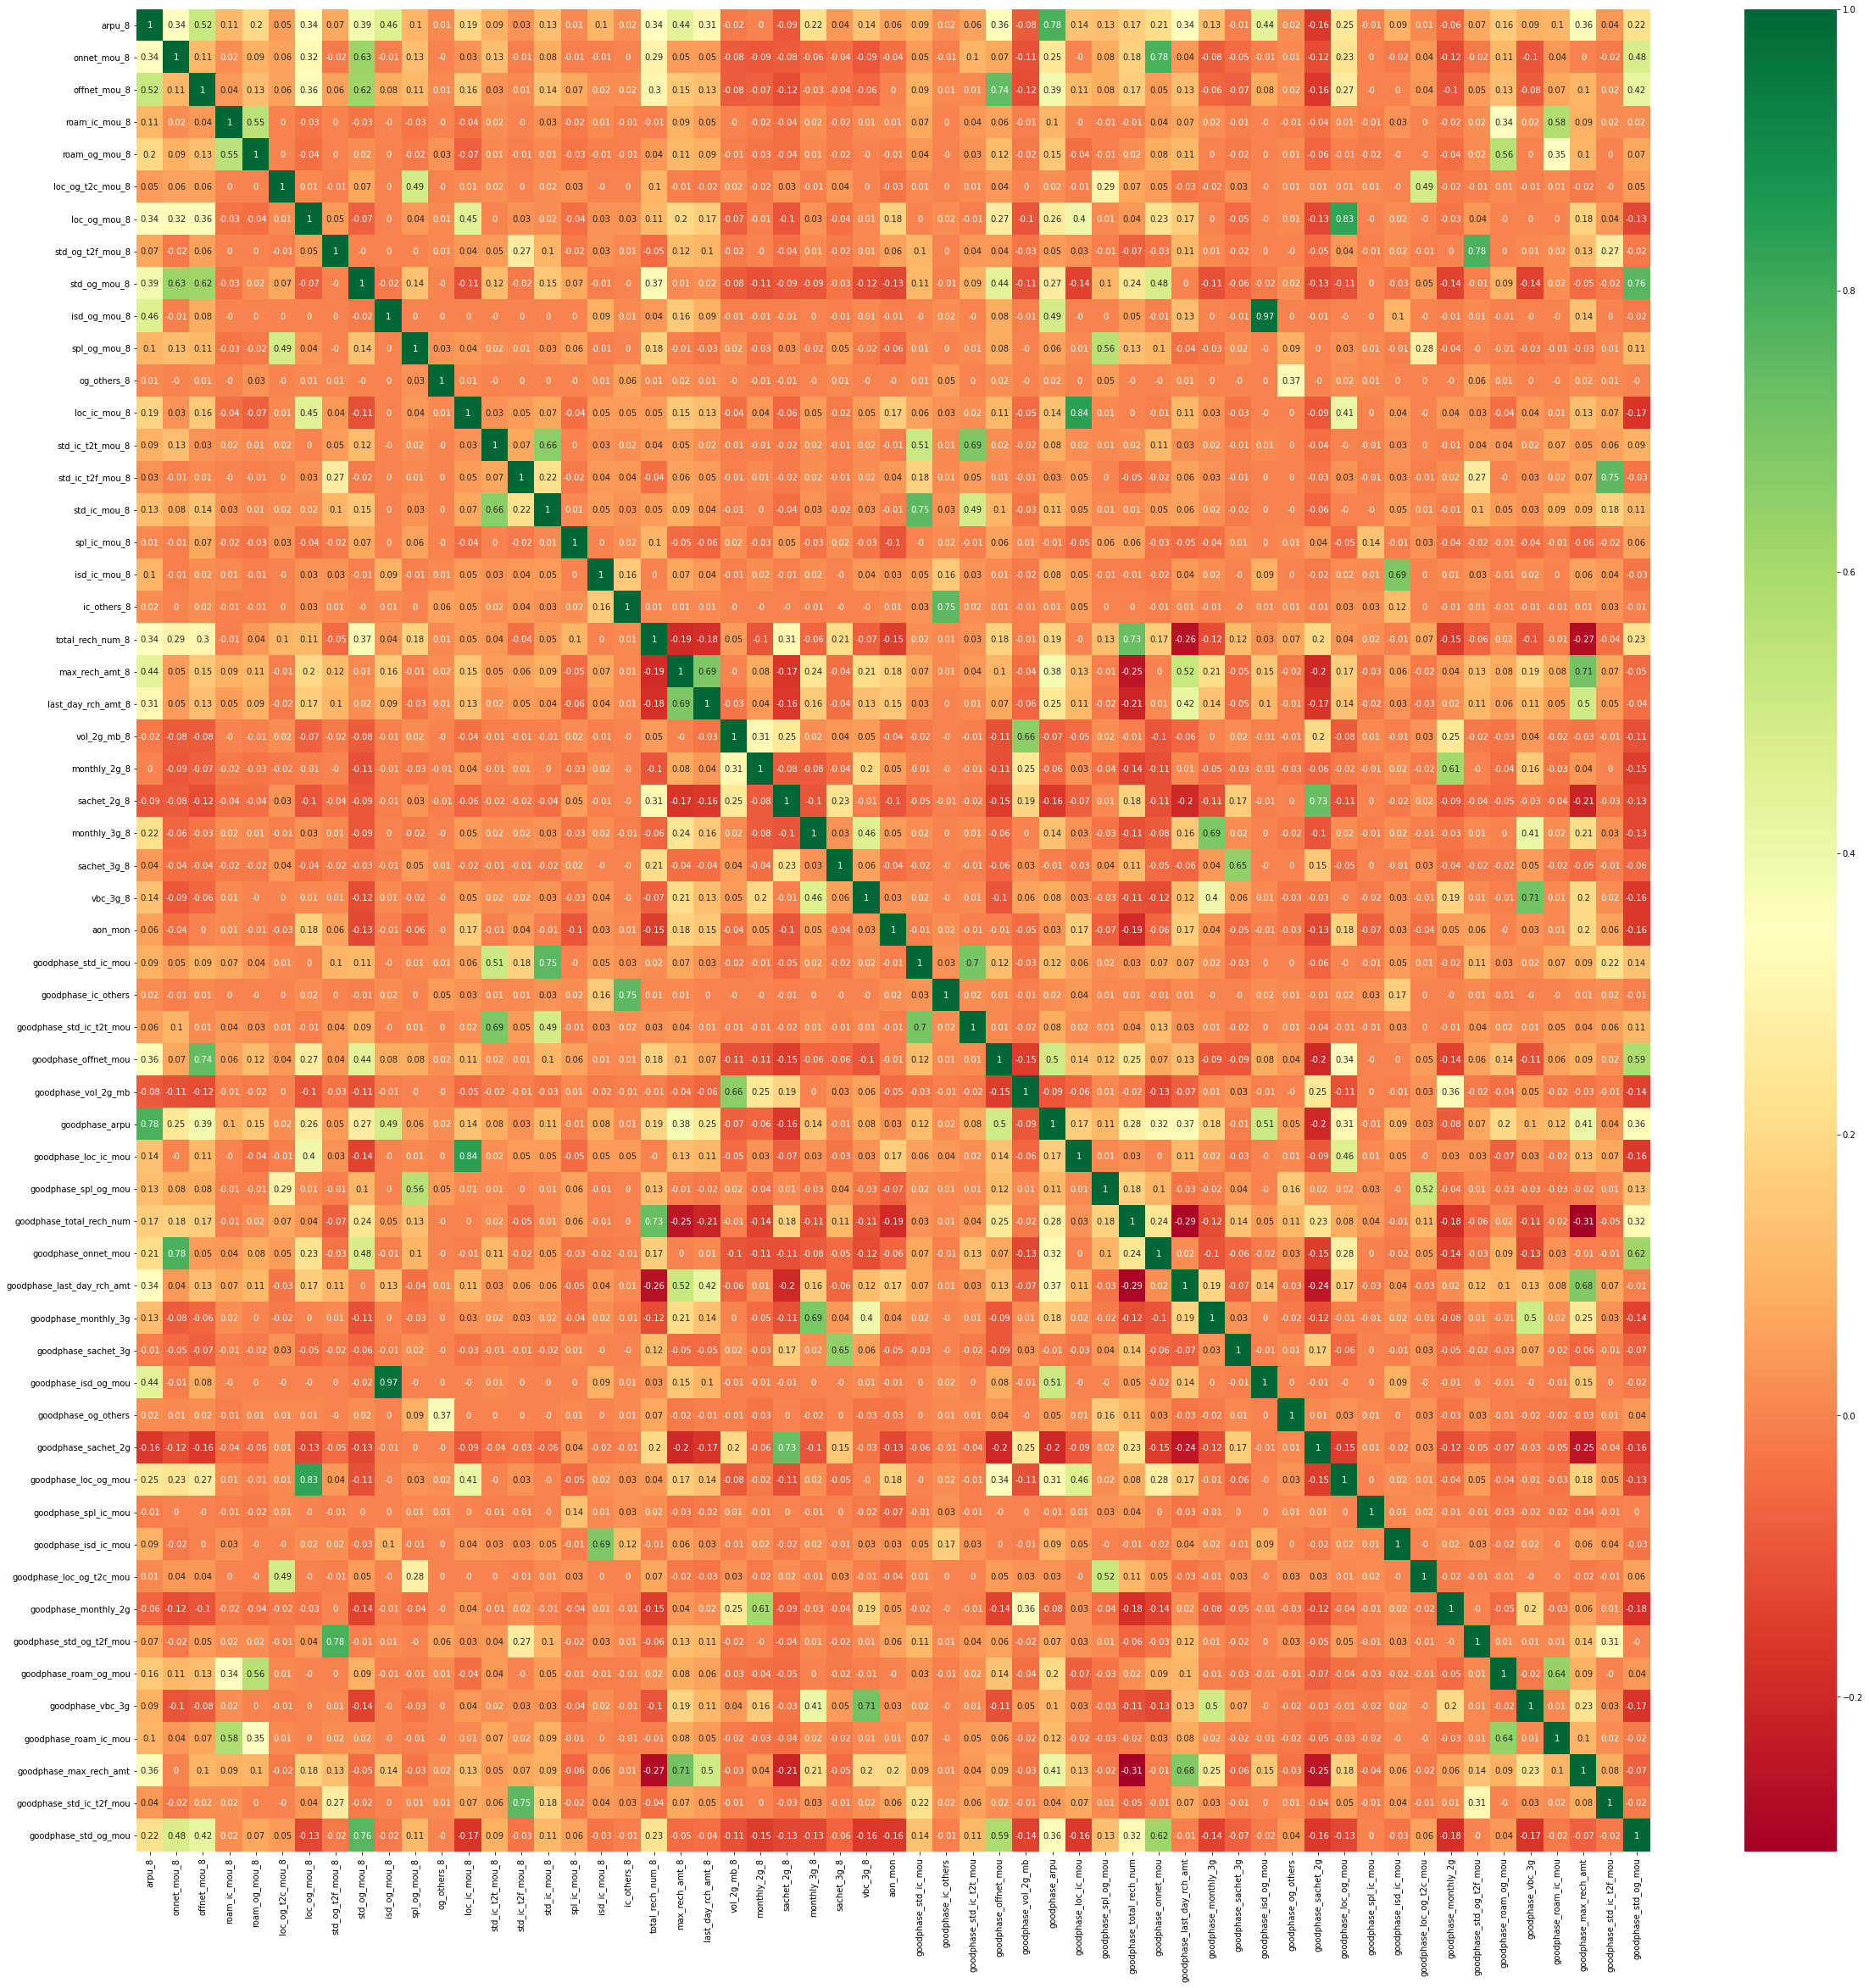

In [441]:
#Plotting the heatmap
plt.figure(figsize = [40,40])
sns.heatmap(df_tel_hvc.corr().round(2), annot = True, cmap = 'RdYlGn')
plt.show()

**Defining Fuctions for Data Visulization**

In [442]:
def data_type(df_column):
    if df_column.dtype == np.int64 or df_column.dtype == np.float64:
        return 'numerical'
    elif df_column.dtype == 'category':
        return 'categorical'
    
def univariate(df_column, stats=True):
  
    if data_type(df_column) == 'numerical':
        sns.distplot(df_column)
        if stats == True:
            print(df_column.describe())
    
    elif data_type(df_column) == 'categorical':
        sns.countplot(df_column)
        if stats == True:
            print(df_column.value_counts())
            
    else:
        print("Invalid column data type")
        
def bivariate(var1, var2):
    if data_type(var1) == 'numerical' and data_type(var2) == 'numerical':
        sns.regplot(var1, var2)
    elif (data_type(var1) == 'categorical' and data_type(var2) == 'numerical') or (data_type(var1) == 'numerical' and data_type(var2) == 'categorical'):        
        sns.boxplot(var1, var2)

**Univariate Analysis on Numerical Columns**

count    28163.000000
mean       528.992500
std        500.479643
min       -345.129000
25%        258.075500
50%        445.338000
75%        675.208500
max      33543.624000
Name: arpu_8, dtype: float64


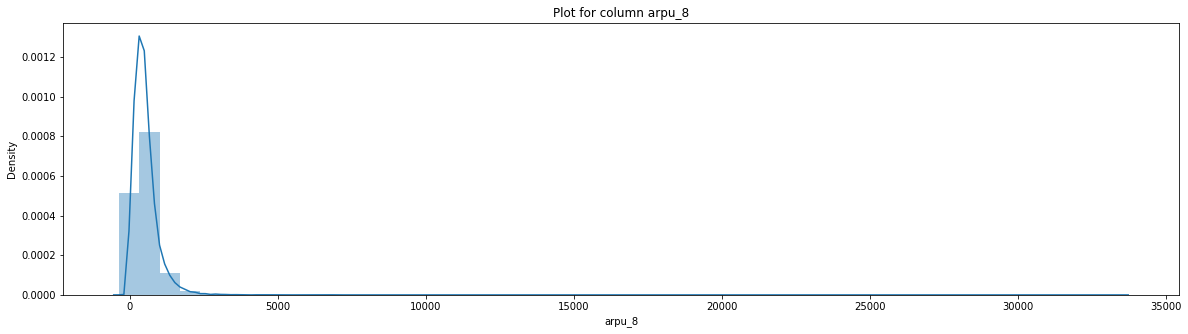


count    28163.000000
mean       246.288657
std        465.372774
min          0.000000
25%         15.340000
50%         75.110000
75%        259.685000
max      10752.560000
Name: onnet_mou_8, dtype: float64


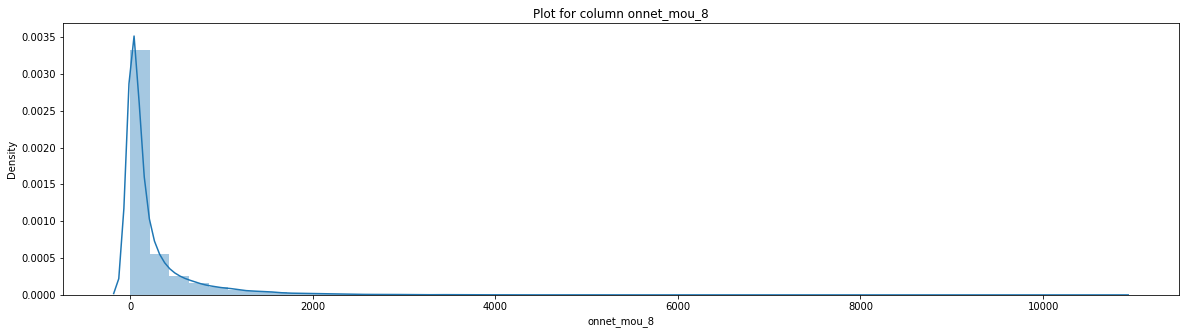


count    28163.000000
mean       351.089623
std        482.498518
min          0.000000
25%         62.040000
50%        202.140000
75%        459.160000
max      14007.340000
Name: offnet_mou_8, dtype: float64


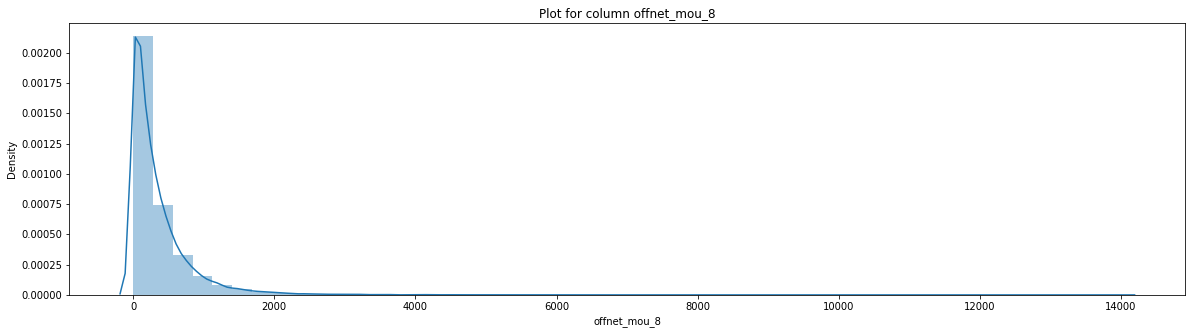


count    28163.000000
mean        13.145865
std         76.125433
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       4169.810000
Name: roam_ic_mou_8, dtype: float64


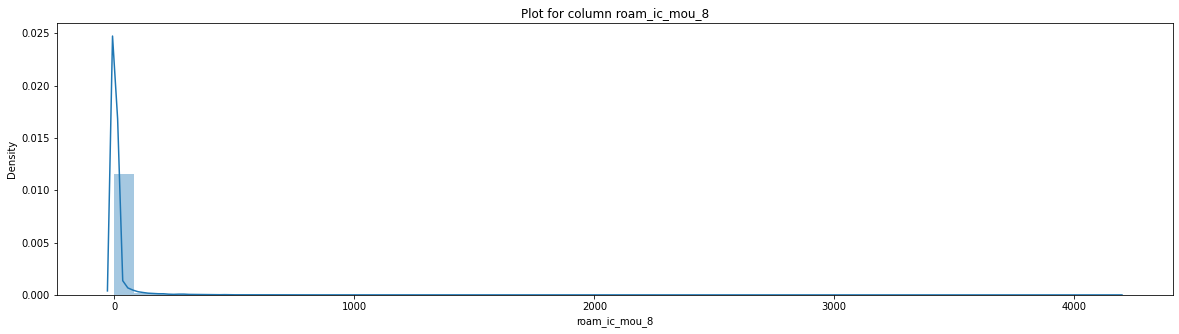


count    28163.000000
mean        20.926258
std        107.722393
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       5337.040000
Name: roam_og_mou_8, dtype: float64


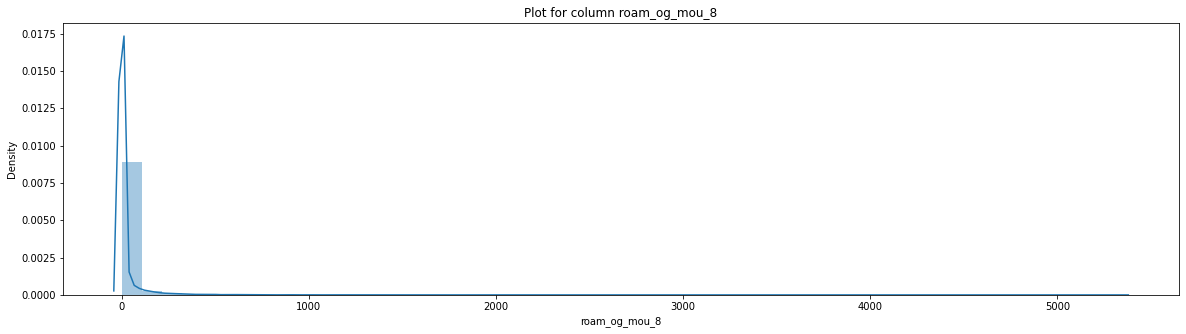


count    28163.000000
mean         1.789363
std          7.390599
min          0.000000
25%          0.000000
50%          0.000000
75%          0.130000
max        351.830000
Name: loc_og_t2c_mou_8, dtype: float64


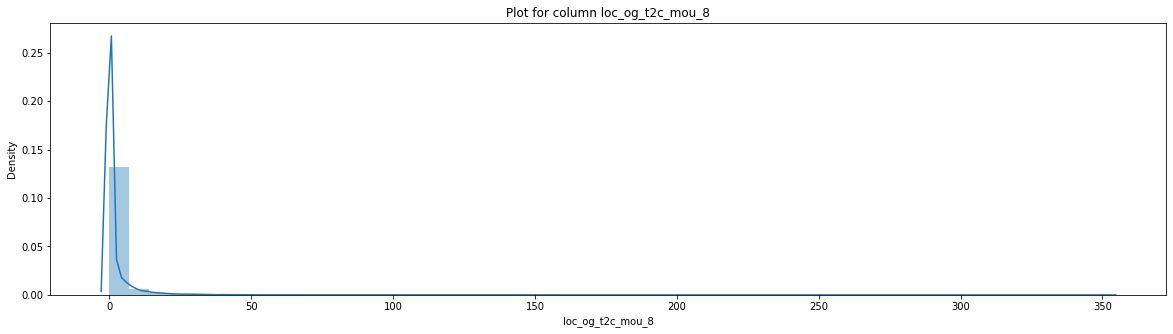


count    28163.000000
mean       247.845569
std        367.353912
min          0.000000
25%         31.410000
50%        124.060000
75%        325.160000
max      11039.910000
Name: loc_og_mou_8, dtype: float64


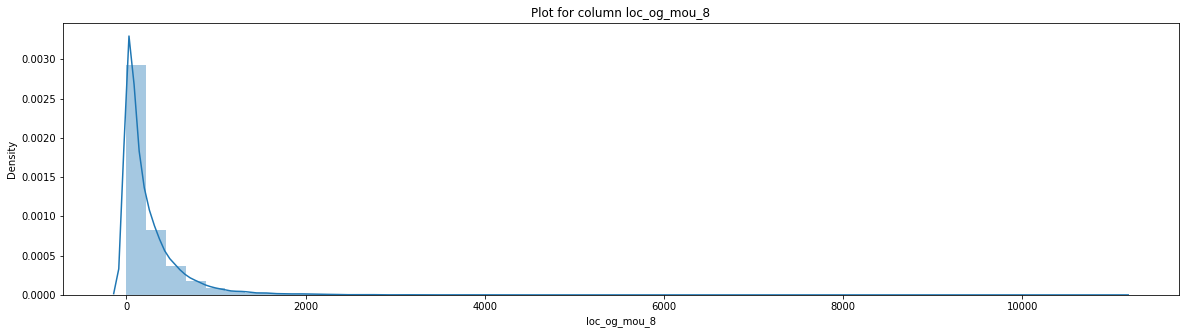


count    28163.000000
mean         1.646062
std         11.126142
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        516.910000
Name: std_og_t2f_mou_8, dtype: float64


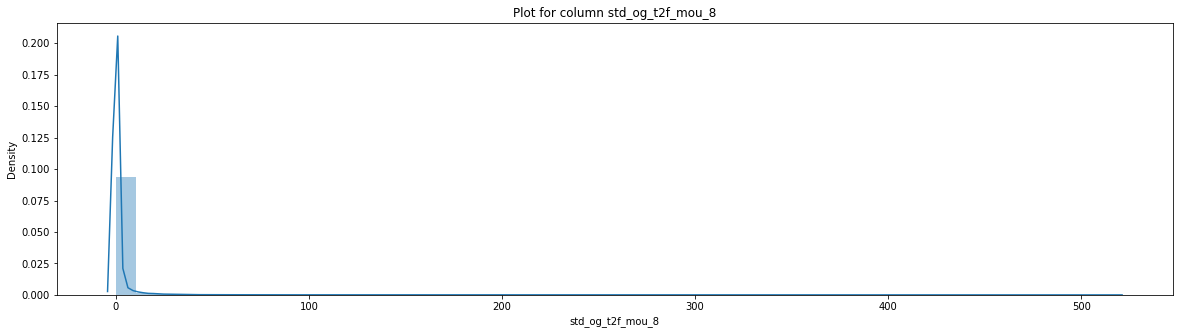


count    28163.000000
mean       322.121339
std        615.275135
min          0.000000
25%          0.000000
50%         34.990000
75%        392.840000
max      13980.060000
Name: std_og_mou_8, dtype: float64


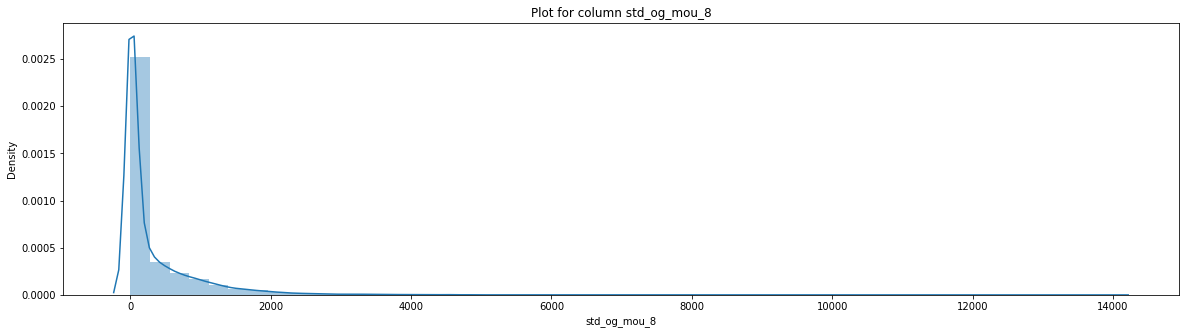


count    28163.000000
mean         1.989213
std         45.888765
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       5681.540000
Name: isd_og_mou_8, dtype: float64


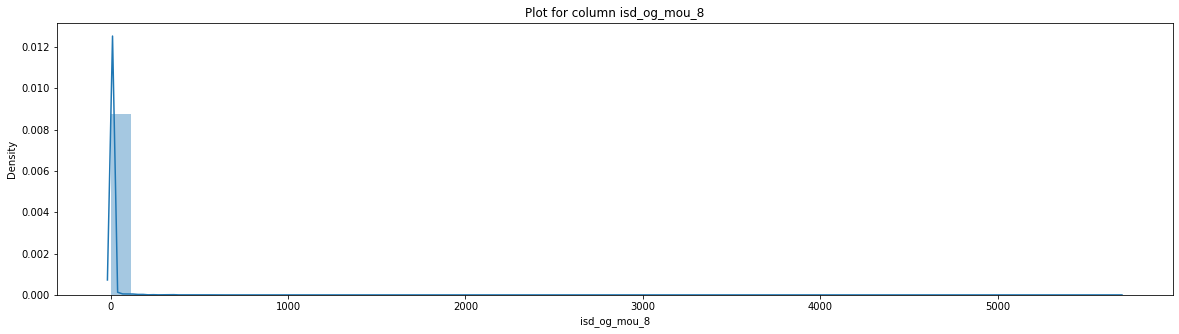


count    28163.000000
mean         6.889342
std         20.813297
min          0.000000
25%          0.000000
50%          0.700000
75%          6.640000
max        954.510000
Name: spl_og_mou_8, dtype: float64


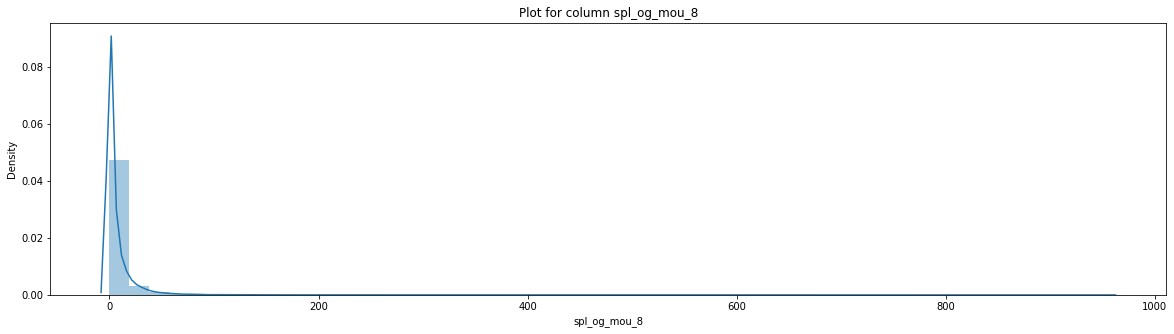


count    28163.000000
mean         0.061151
std          3.421503
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        394.930000
Name: og_others_8, dtype: float64


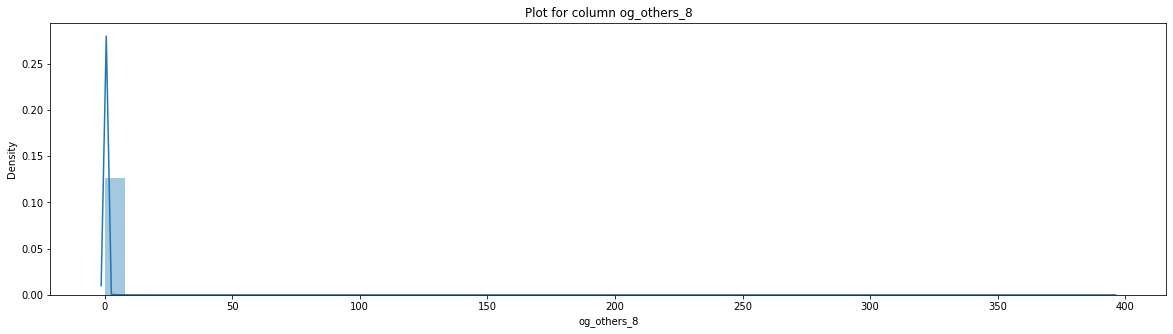


count    28163.000000
mean       235.639315
std        313.175366
min          0.000000
25%         51.185000
50%        140.310000
75%        299.135000
max       5388.740000
Name: loc_ic_mou_8, dtype: float64


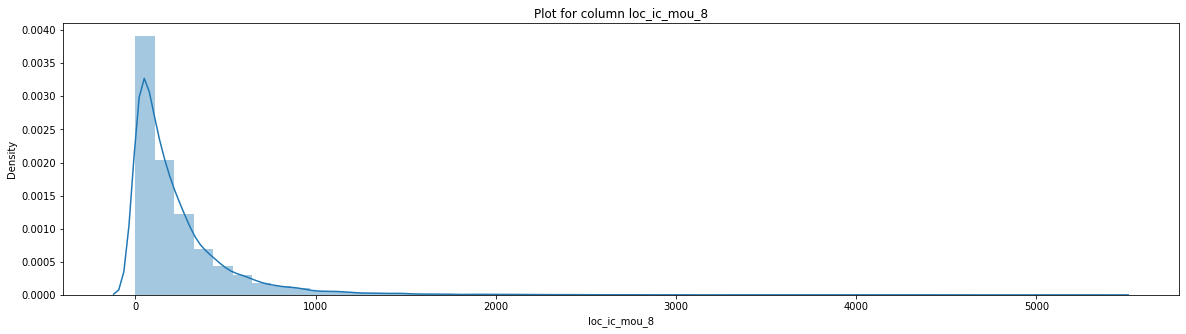


count    28163.000000
mean        14.625113
std         73.017056
min          0.000000
25%          0.000000
50%          0.330000
75%          7.780000
max       4309.290000
Name: std_ic_t2t_mou_8, dtype: float64


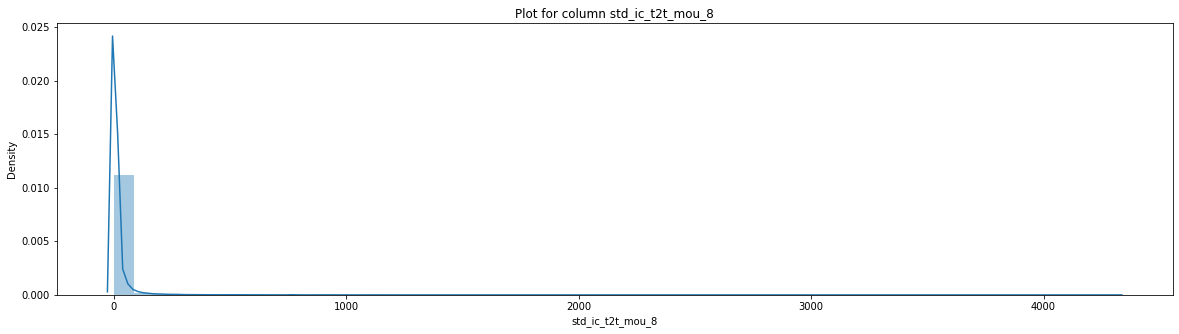


count    28163.000000
mean         2.692254
std         20.476161
min          0.000000
25%          0.000000
50%          0.000000
75%          0.230000
max       1394.890000
Name: std_ic_t2f_mou_8, dtype: float64


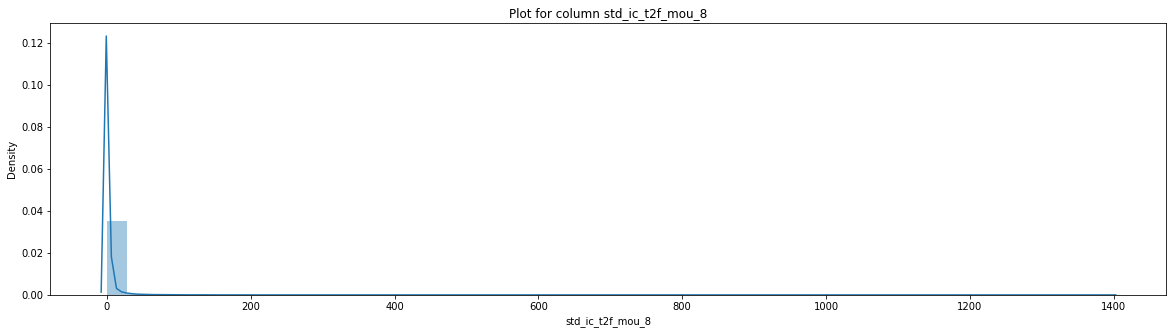


count    28163.000000
mean        46.761176
std        142.430462
min          0.000000
25%          0.940000
50%         10.810000
75%         41.040000
max       5957.140000
Name: std_ic_mou_8, dtype: float64


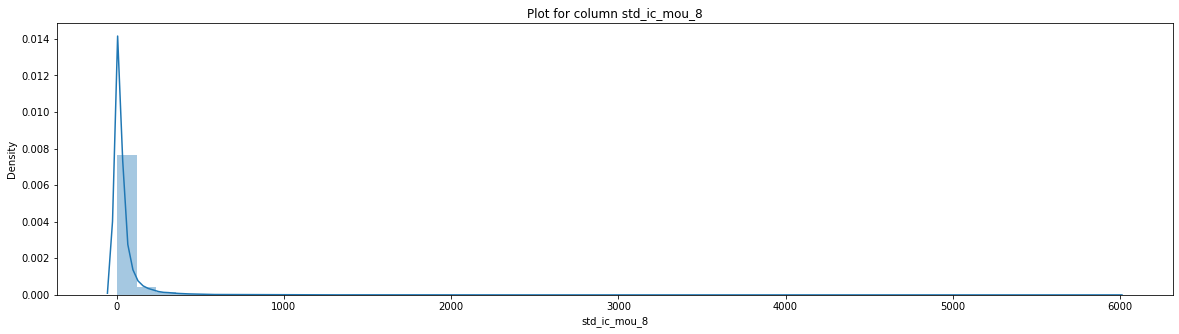


count    28163.000000
mean         0.027889
std          0.113430
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          6.230000
Name: spl_ic_mou_8, dtype: float64


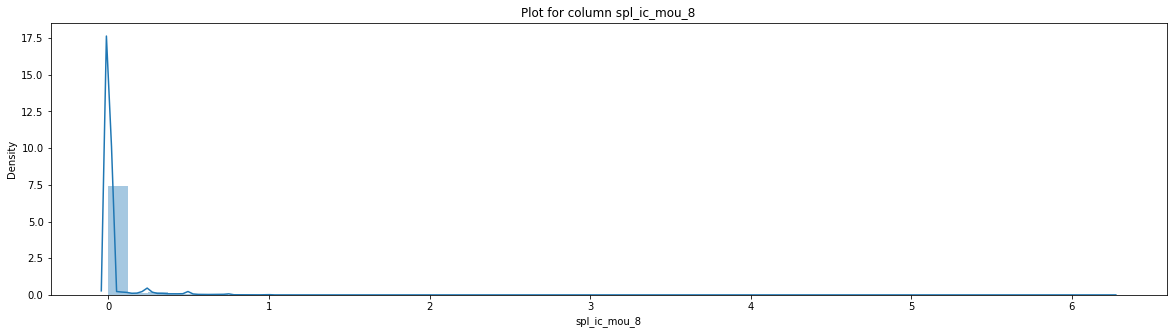


count    28163.000000
mean        11.437856
std         72.276371
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       3432.880000
Name: isd_ic_mou_8, dtype: float64


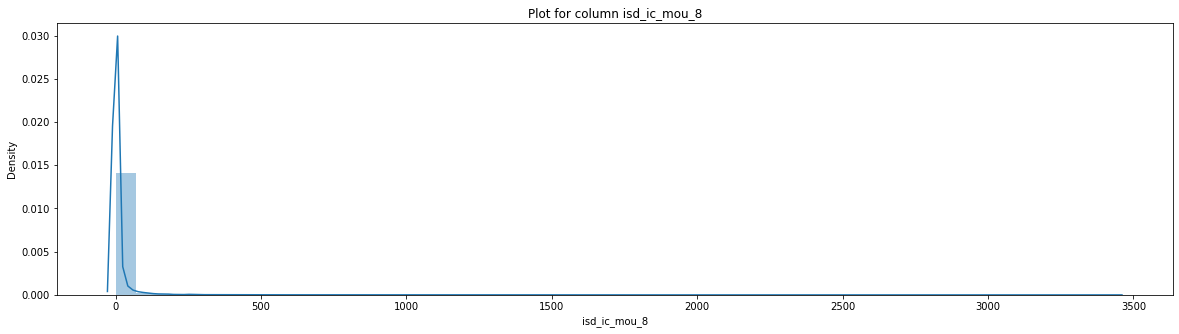


count    28163.000000
mean         1.291328
std         13.164084
min          0.000000
25%          0.000000
50%          0.000000
75%          0.060000
max       1209.860000
Name: ic_others_8, dtype: float64


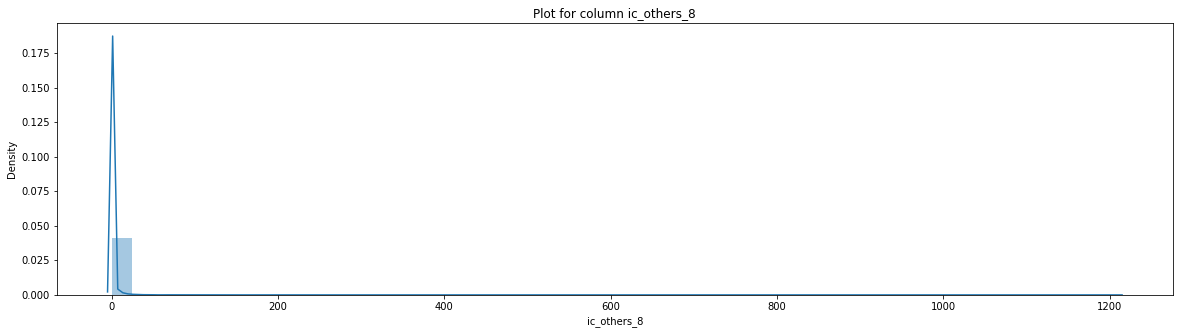


count    28163.000000
mean        10.435323
std          9.288002
min          1.000000
25%          4.000000
50%          8.000000
75%         13.000000
max        196.000000
Name: total_rech_num_8, dtype: float64


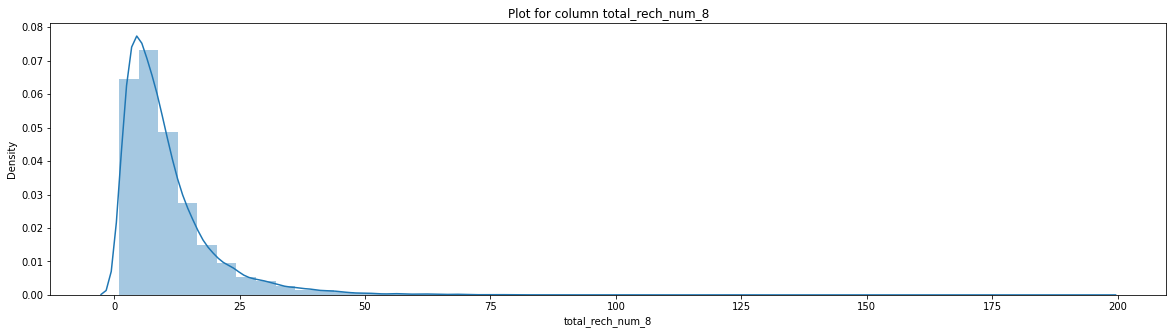


count    28163.000000
mean       164.597131
std        169.014286
min          0.000000
25%         67.000000
50%        140.000000
75%        198.000000
max       4449.000000
Name: max_rech_amt_8, dtype: float64


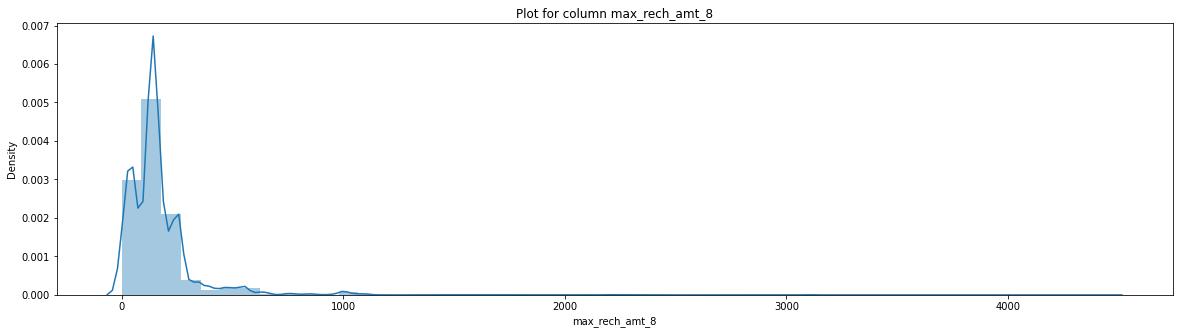


count    28163.000000
mean        94.779640
std        141.789453
min          0.000000
25%         10.000000
50%         50.000000
75%        130.000000
max       4449.000000
Name: last_day_rch_amt_8, dtype: float64


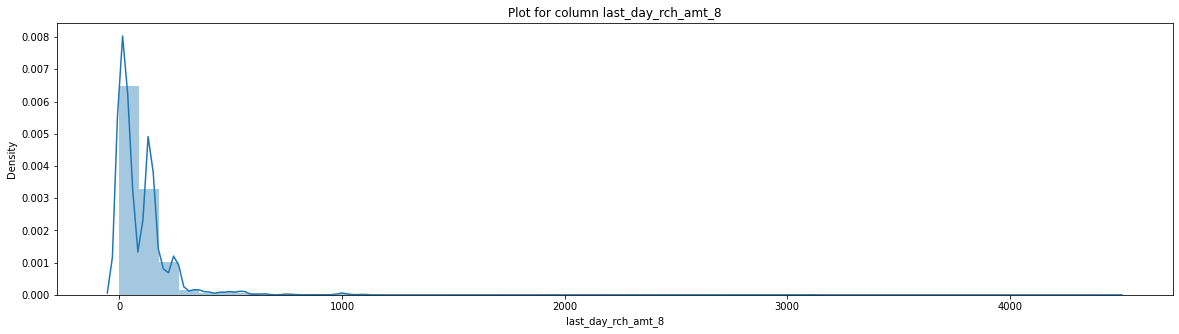


count    28163.000000
mean       109.831129
std        317.809110
min          0.000000
25%          0.000000
50%          0.000000
75%         58.805000
max      11117.610000
Name: vol_2g_mb_8, dtype: float64


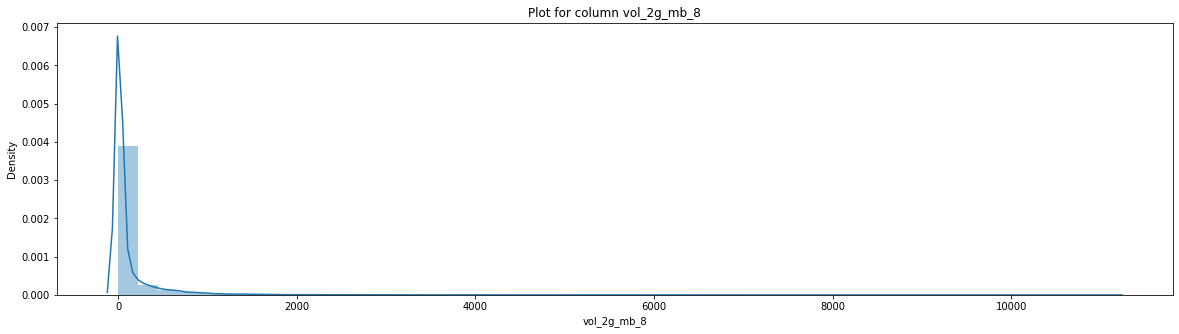


count    28163.000000
mean         0.160210
std          0.413067
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          5.000000
Name: monthly_2g_8, dtype: float64


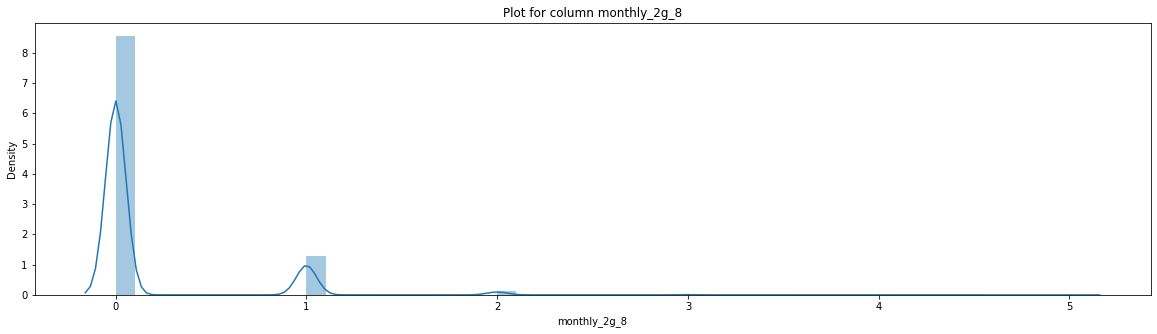


count    28163.000000
mean         1.100771
std          2.573361
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max         44.000000
Name: sachet_2g_8, dtype: float64


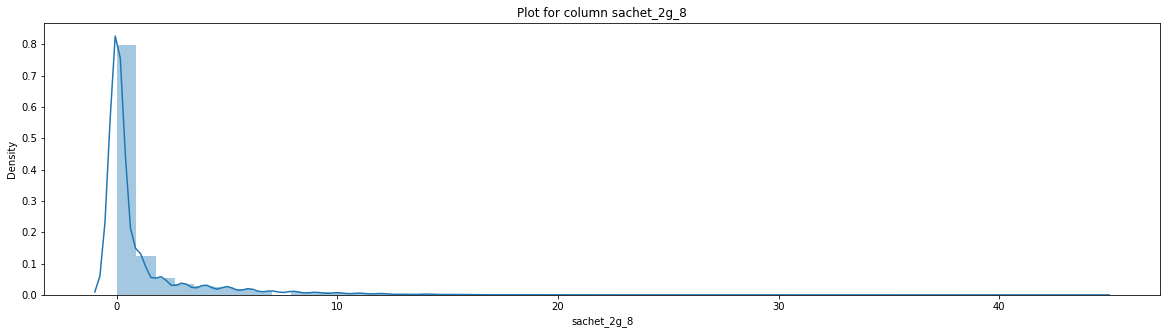


count    28163.000000
mean         0.209459
std          0.619138
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         16.000000
Name: monthly_3g_8, dtype: float64


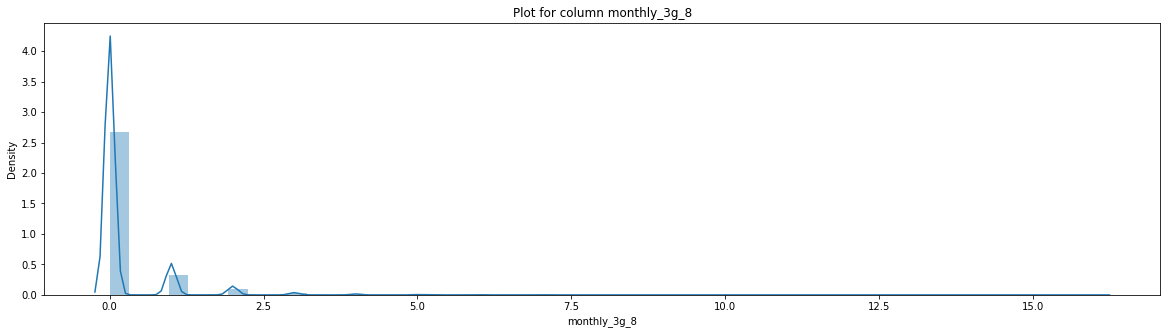


count    28163.000000
mean         0.208287
std          1.116503
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         41.000000
Name: sachet_3g_8, dtype: float64


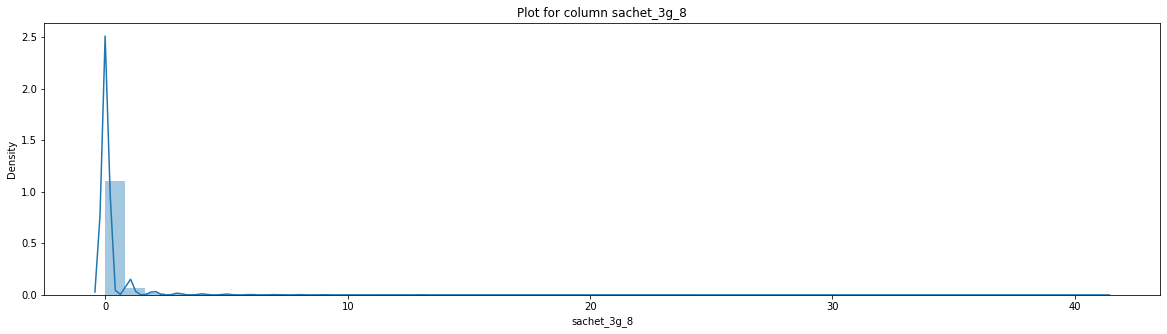


count    28163.000000
mean       173.745705
std        424.621028
min          0.000000
25%          0.000000
50%          0.000000
75%        142.470000
max      12916.220000
Name: vbc_3g_8, dtype: float64


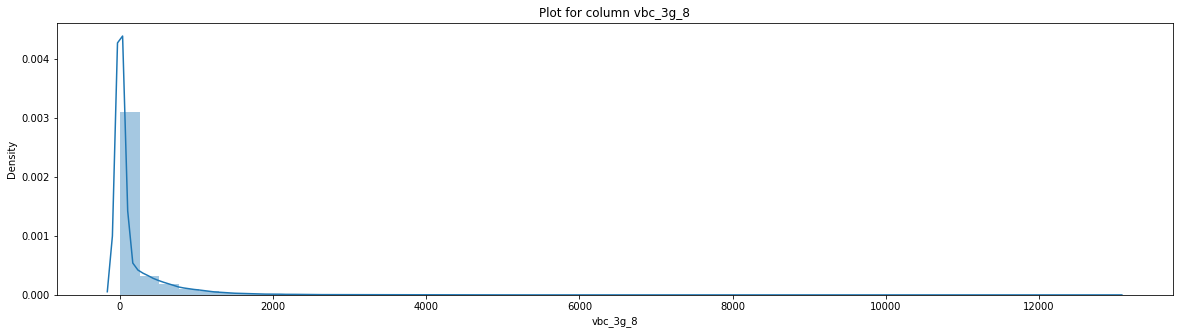


0    26625
1     1538
Name: churn, dtype: int64


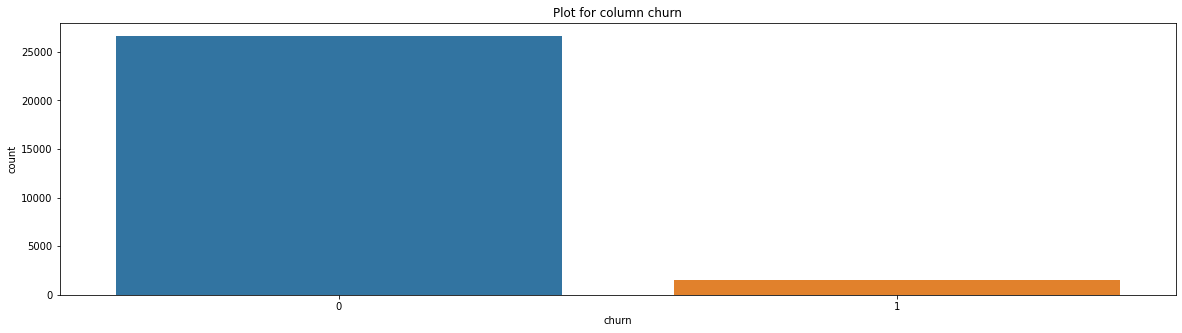


count    28163.000000
mean        41.115492
std         32.099471
min          6.000000
25%         15.700000
50%         29.200000
75%         60.350000
max        144.000000
Name: aon_mon, dtype: float64


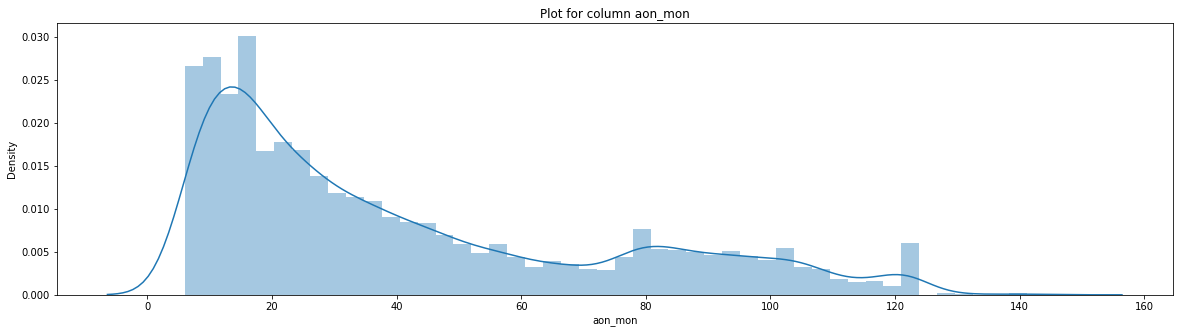


count    28163.000000
mean        49.261396
std        135.463961
min          0.000000
25%          2.955000
50%         15.155000
75%         45.655000
max       5630.410000
Name: goodphase_std_ic_mou, dtype: float64


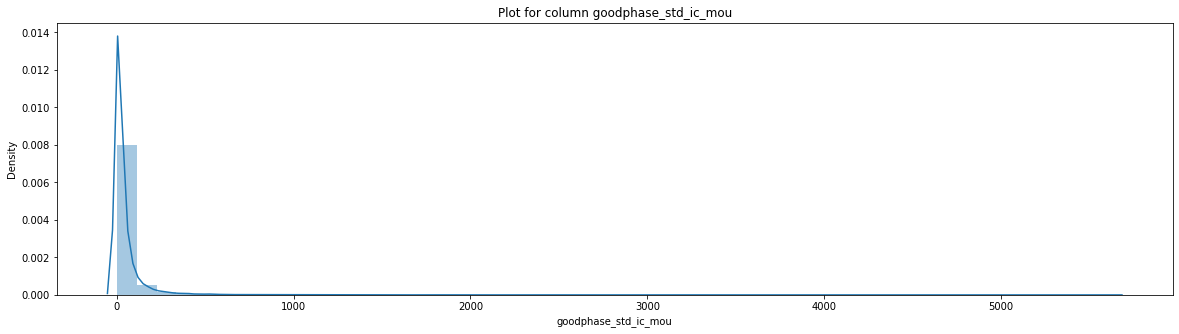


count    28163.000000
mean         1.371220
std         14.081974
min          0.000000
25%          0.000000
50%          0.000000
75%          0.240000
max       1420.040000
Name: goodphase_ic_others, dtype: float64


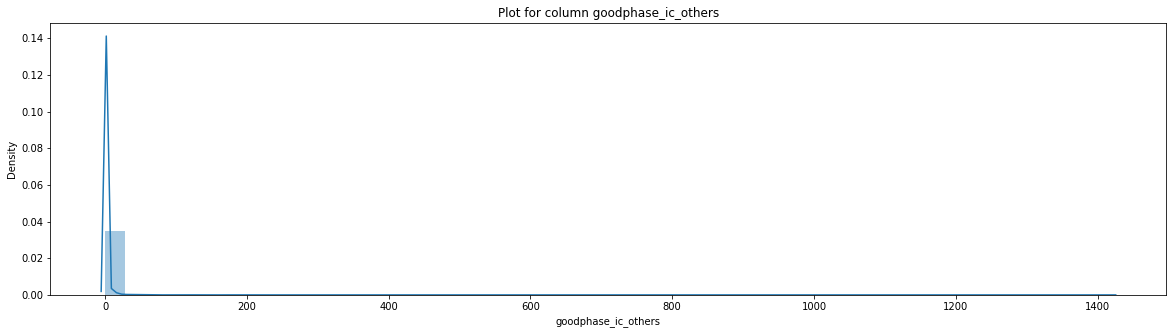


count    28163.000000
mean        15.535415
std         76.790814
min          0.000000
25%          0.000000
50%          1.570000
75%         10.255000
max       5630.245000
Name: goodphase_std_ic_t2t_mou, dtype: float64


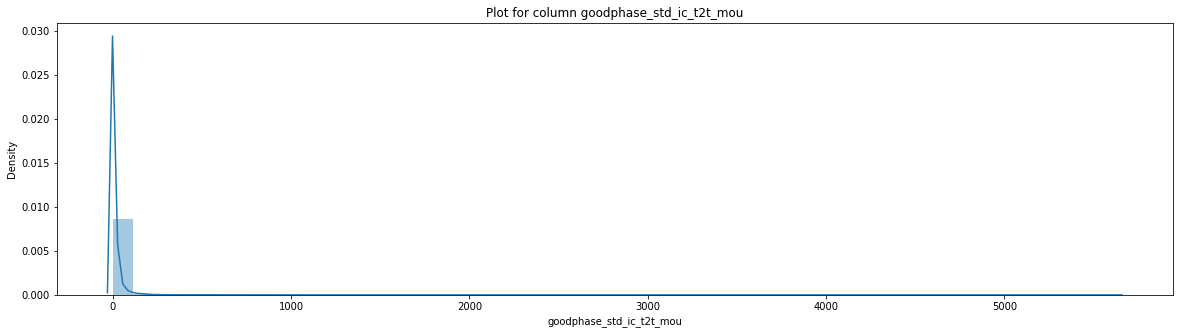


count    28163.000000
mean       384.886852
std        458.317317
min          0.000000
25%         92.042500
50%        246.770000
75%        508.660000
max       8314.795000
Name: goodphase_offnet_mou, dtype: float64


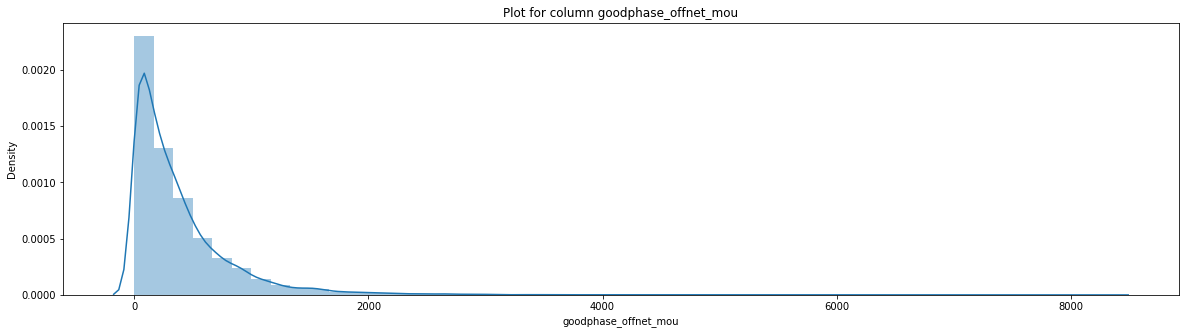


count    28163.000000
mean       127.717157
std        304.044111
min          0.000000
25%          0.000000
50%          6.505000
75%        110.375000
max       7939.075000
Name: goodphase_vol_2g_mb, dtype: float64


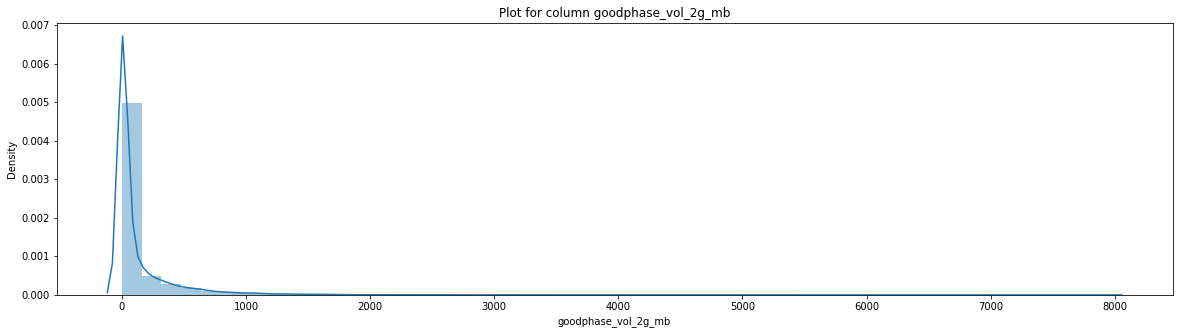


count    28163.000000
mean       567.163074
std        431.807280
min       -451.713500
25%        355.689750
50%        490.352500
75%        682.077250
max      31438.461000
Name: goodphase_arpu, dtype: float64


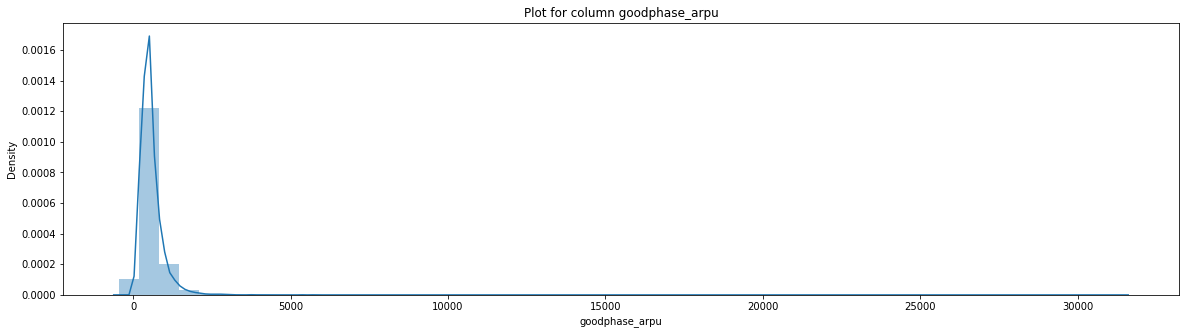


count    28163.000000
mean       241.031533
std        303.003271
min          0.000000
25%         62.502500
50%        148.215000
75%        307.542500
max       6556.670000
Name: goodphase_loc_ic_mou, dtype: float64


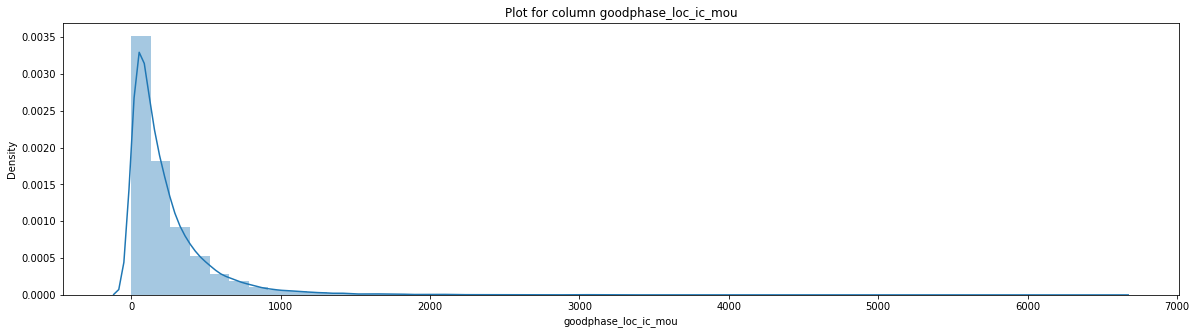


count    28163.000000
mean         6.610121
std         17.610173
min          0.000000
25%          0.000000
50%          1.875000
75%          7.157500
max       1144.500000
Name: goodphase_spl_og_mou, dtype: float64


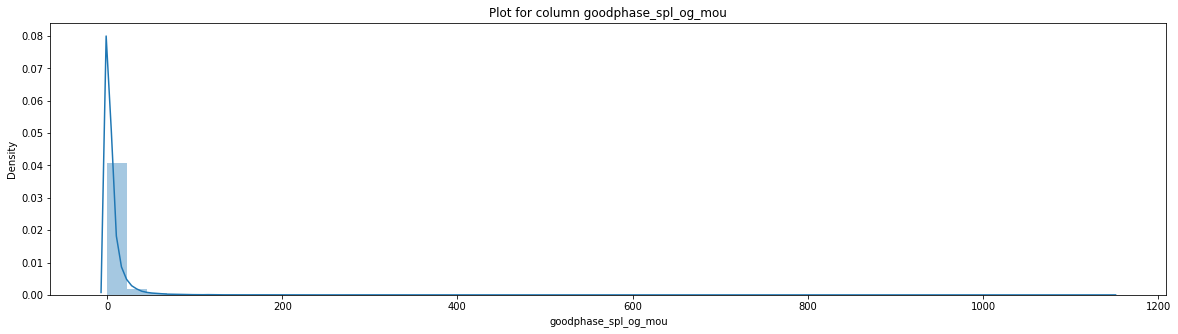


count    28163.000000
mean        12.026489
std          8.650631
min          1.000000
25%          6.500000
50%          9.500000
75%         14.500000
max        155.500000
Name: goodphase_total_rech_num, dtype: float64


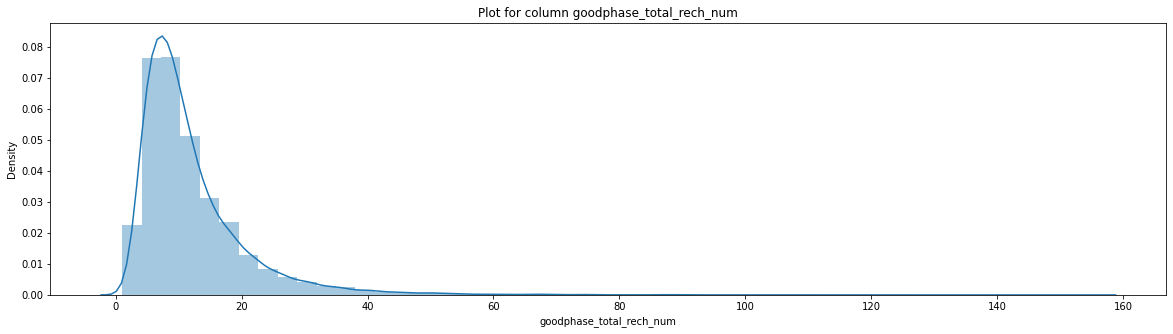


count    28163.000000
mean       271.207259
std        443.021451
min          0.000000
25%         23.945000
50%         98.500000
75%        317.900000
max       7331.060000
Name: goodphase_onnet_mou, dtype: float64


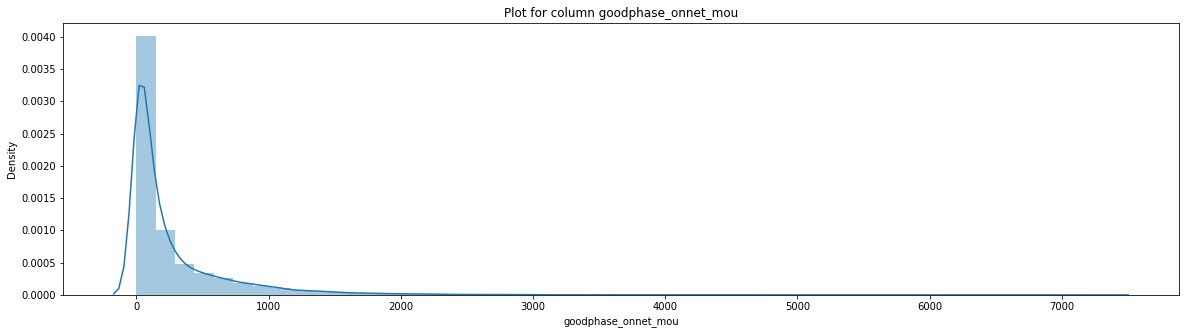


count    28163.000000
mean        98.522885
std        108.064480
min          0.000000
25%         30.000000
50%         77.000000
75%        124.000000
max       3100.000000
Name: goodphase_last_day_rch_amt, dtype: float64


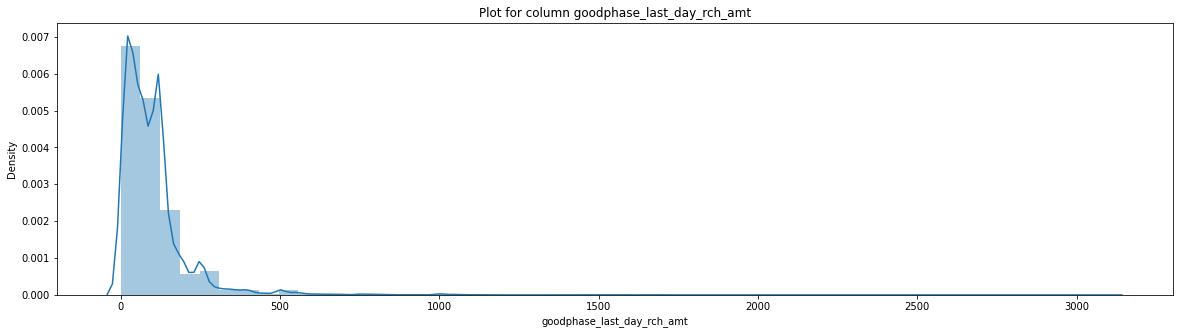


count    28163.000000
mean         0.213773
std          0.565446
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         11.500000
Name: goodphase_monthly_3g, dtype: float64


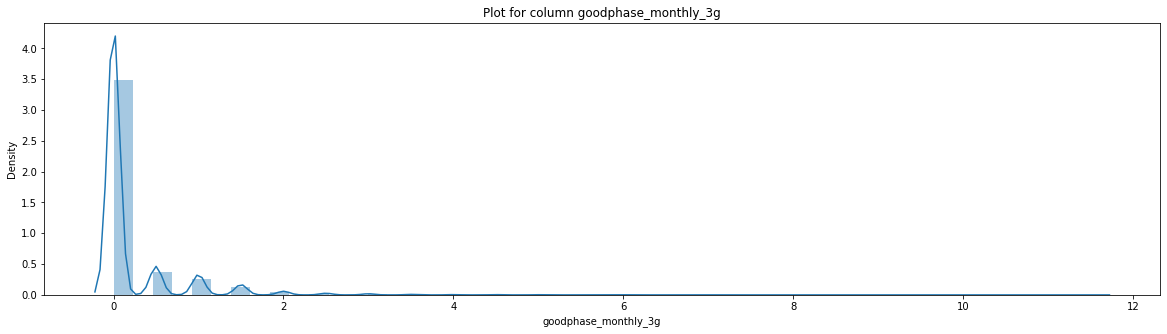


count    28163.000000
mean         0.217200
std          0.940707
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         26.500000
Name: goodphase_sachet_3g, dtype: float64


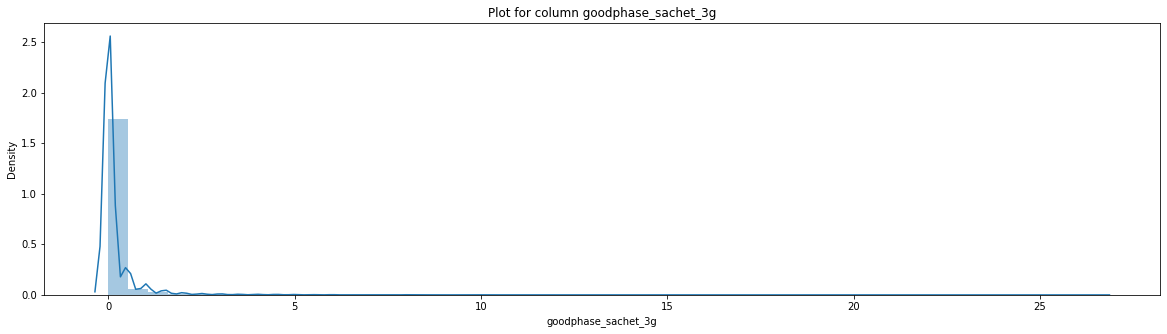


count    28163.000000
mean         2.047679
std         45.536401
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       5695.470000
Name: goodphase_isd_og_mou, dtype: float64


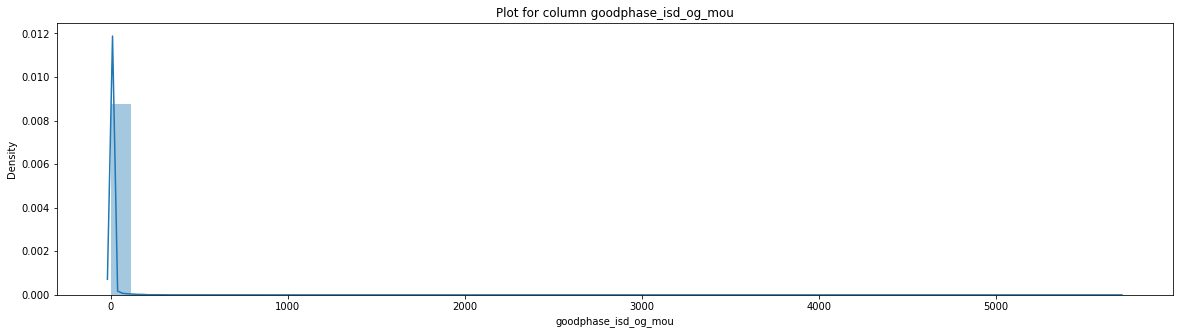


count    28163.000000
mean         0.359434
std          2.533710
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        304.905000
Name: goodphase_og_others, dtype: float64


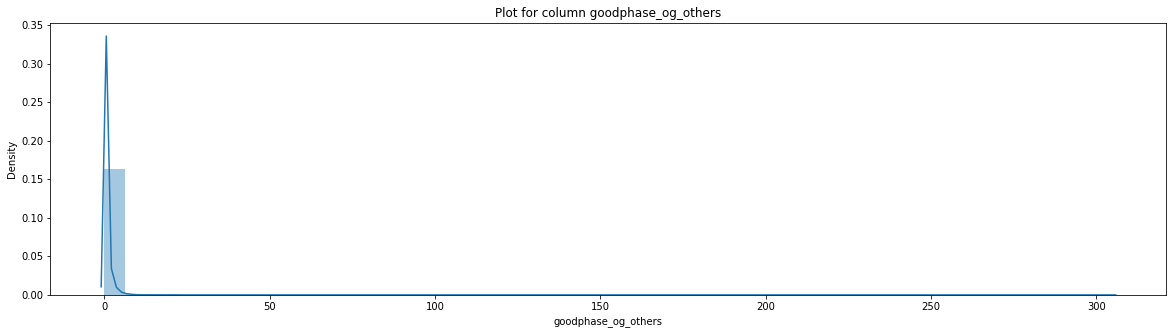


count    28163.000000
mean         1.154618
std          2.435548
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max         38.000000
Name: goodphase_sachet_2g, dtype: float64


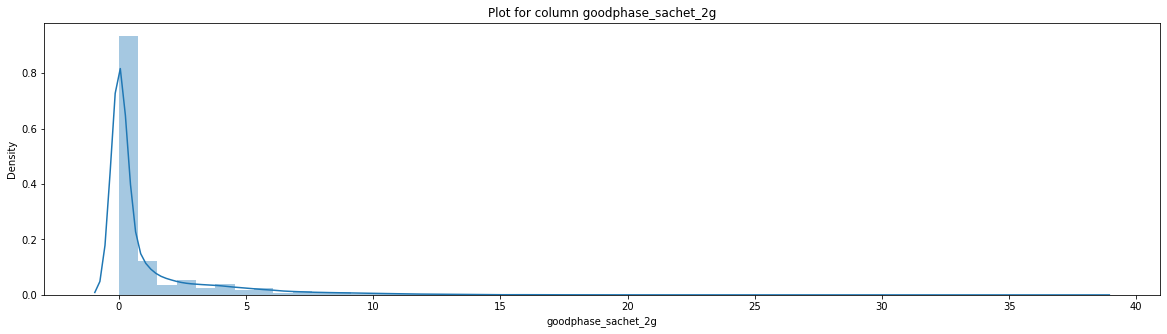


count    28163.000000
mean       263.016895
std        361.575126
min          0.000000
25%         45.762500
50%        140.590000
75%        347.185000
max       6582.420000
Name: goodphase_loc_og_mou, dtype: float64


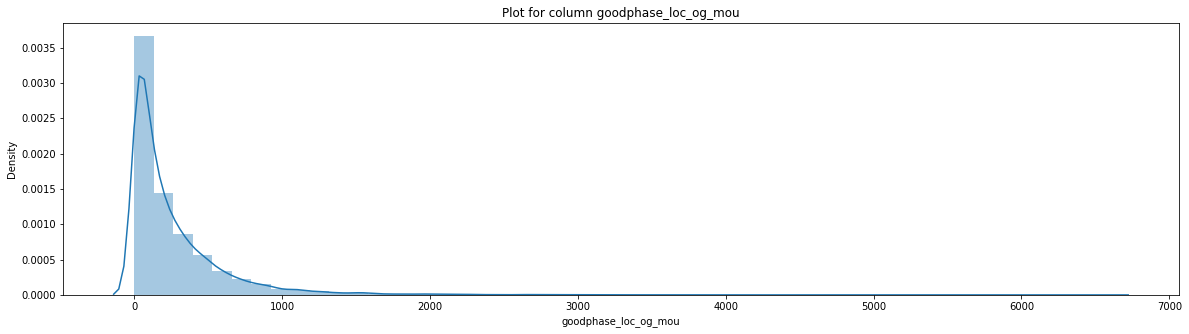


count    28163.000000
mean         0.041413
std          0.154356
min          0.000000
25%          0.000000
50%          0.000000
75%          0.005000
max         16.610000
Name: goodphase_spl_ic_mou, dtype: float64


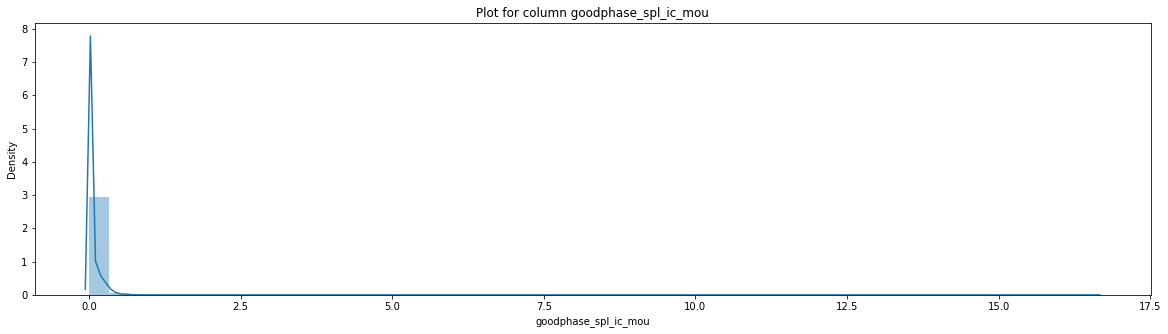


count    28163.000000
mean        11.458002
std         74.792010
min          0.000000
25%          0.000000
50%          0.000000
75%          0.540000
max       5651.025000
Name: goodphase_isd_ic_mou, dtype: float64


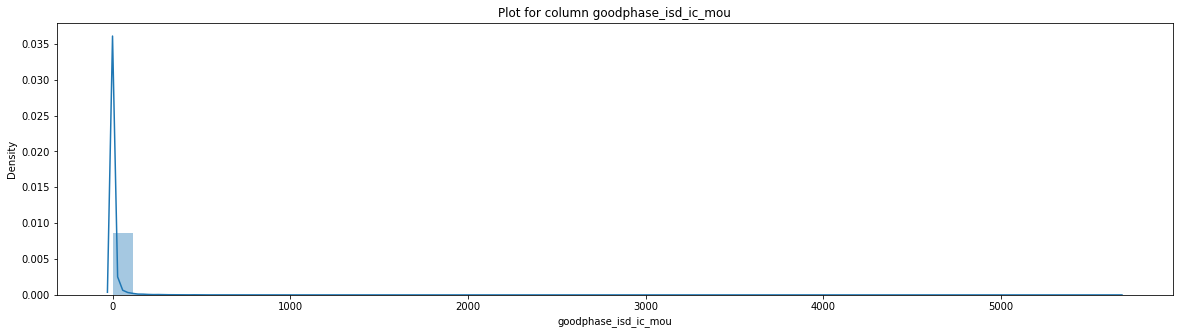


count    28163.000000
mean         1.766261
std          6.536779
min          0.000000
25%          0.000000
50%          0.000000
75%          1.175000
max        420.575000
Name: goodphase_loc_og_t2c_mou, dtype: float64


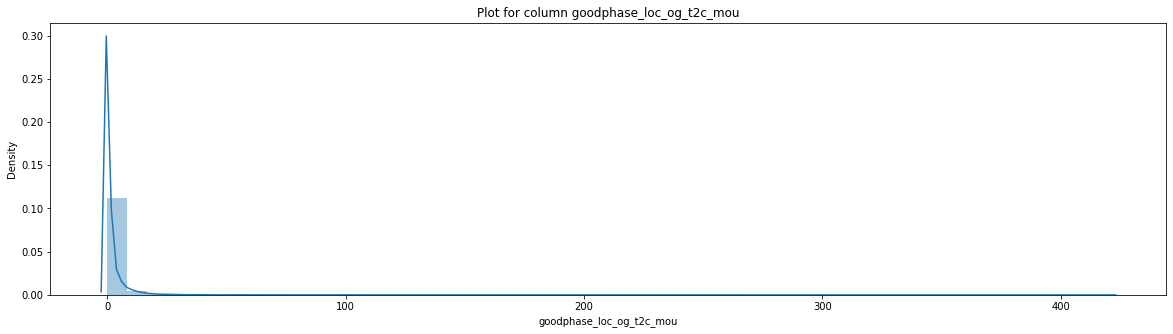


count    28163.000000
mean         0.183397
std          0.392058
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          4.500000
Name: goodphase_monthly_2g, dtype: float64


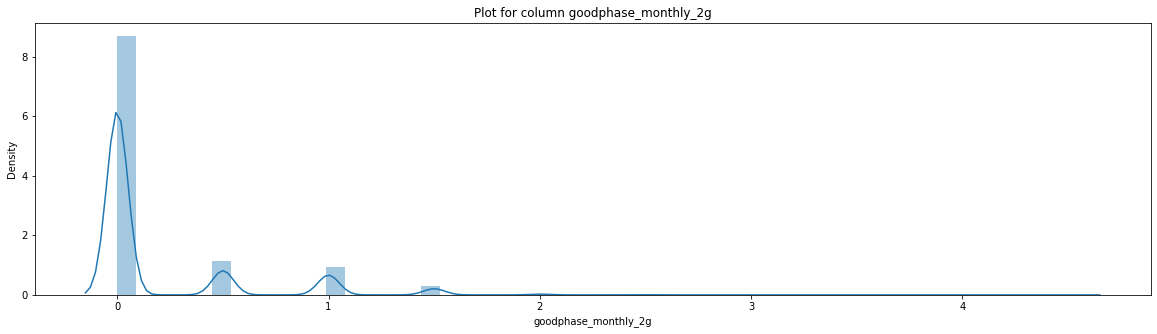


count    28163.000000
mean         1.840391
std         11.647474
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        382.920000
Name: goodphase_std_og_t2f_mou, dtype: float64


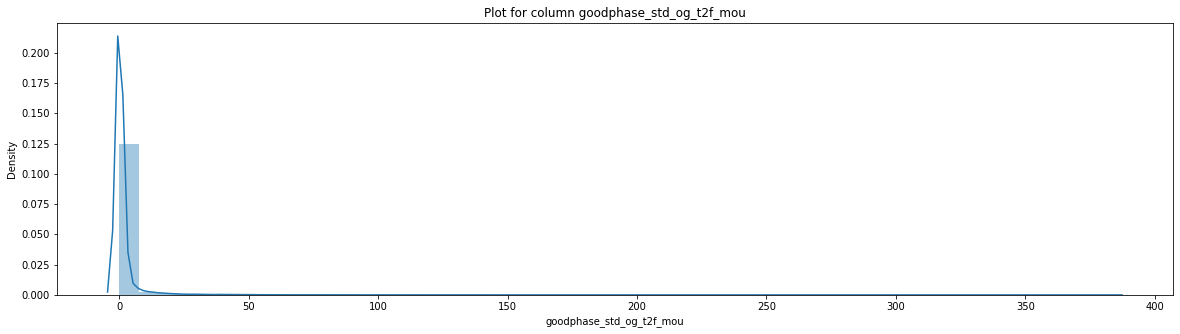


count    28163.000000
mean        23.757457
std         94.459260
min          0.000000
25%          0.000000
50%          0.000000
75%          3.345000
max       2410.835000
Name: goodphase_roam_og_mou, dtype: float64


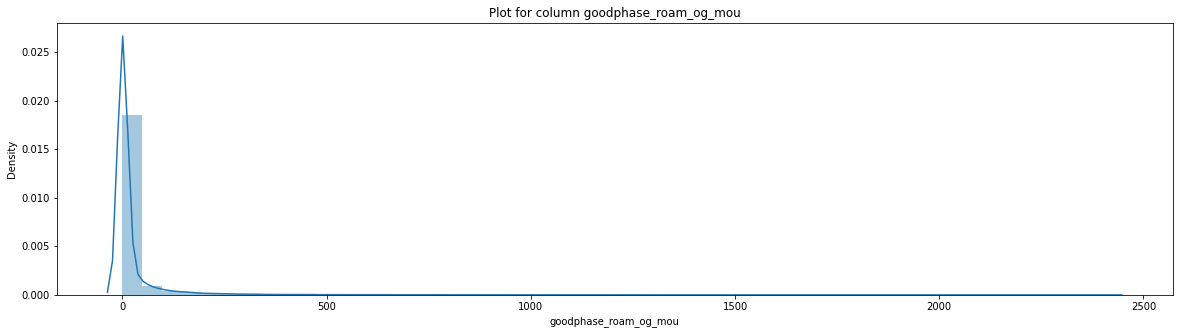


count    28163.000000
mean       169.310408
std        395.513994
min          0.000000
25%          0.000000
50%          0.000000
75%        157.682500
max       8190.585000
Name: goodphase_vbc_3g, dtype: float64


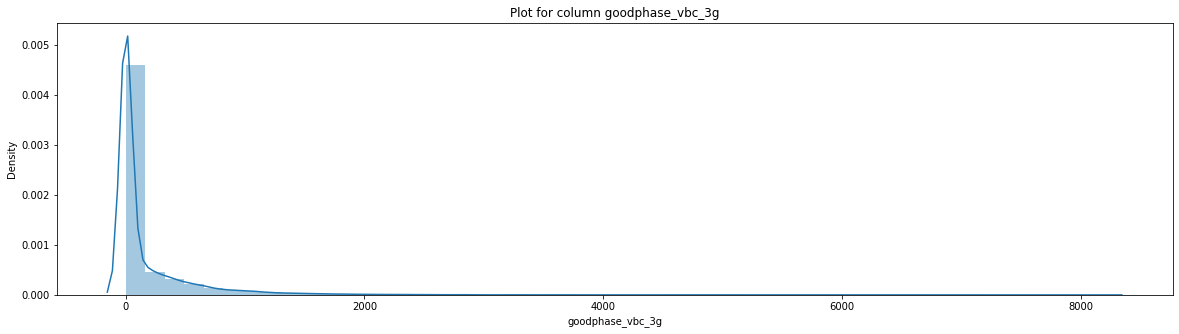


count    28163.000000
mean        14.632102
std         66.404361
min          0.000000
25%          0.000000
50%          0.000000
75%          1.715000
max       3060.600000
Name: goodphase_roam_ic_mou, dtype: float64


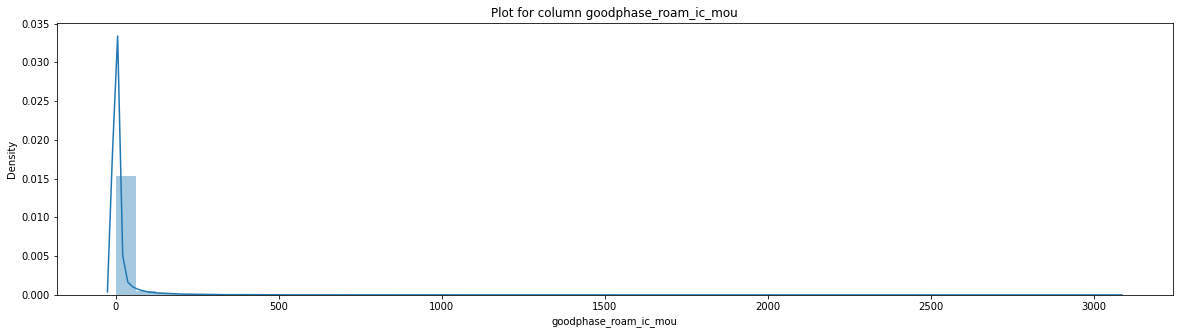


count    28163.000000
mean       167.748198
std        148.011960
min          0.000000
25%        104.000000
50%        128.000000
75%        198.000000
max       3299.000000
Name: goodphase_max_rech_amt, dtype: float64


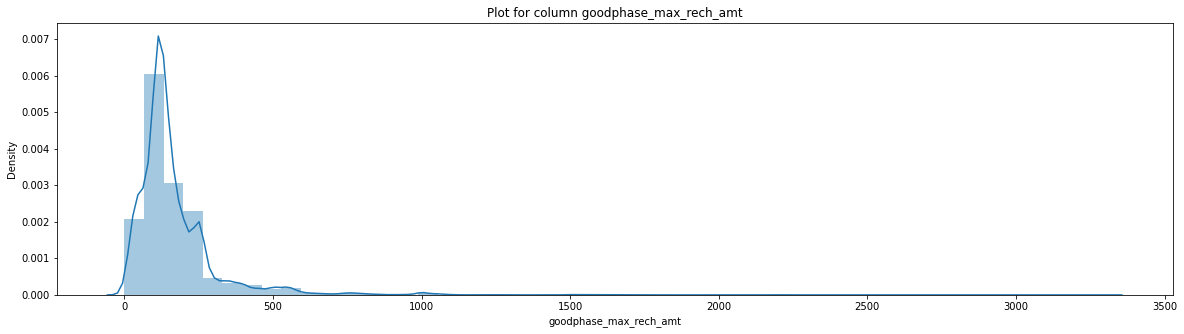


count    28163.000000
mean         2.835280
std         18.312495
min          0.000000
25%          0.000000
50%          0.000000
75%          0.750000
max       1185.045000
Name: goodphase_std_ic_t2f_mou, dtype: float64


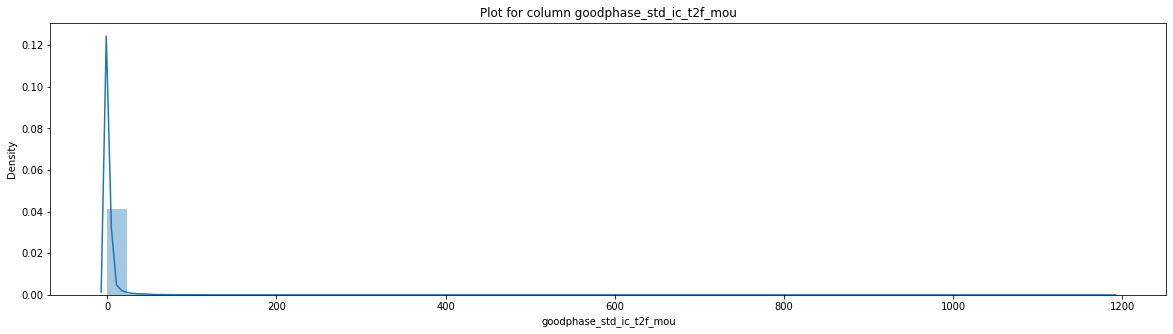


count    28163.000000
mean       362.567597
std        586.639498
min          0.000000
25%          2.450000
50%         66.560000
75%        543.692500
max       8856.235000
Name: goodphase_std_og_mou, dtype: float64


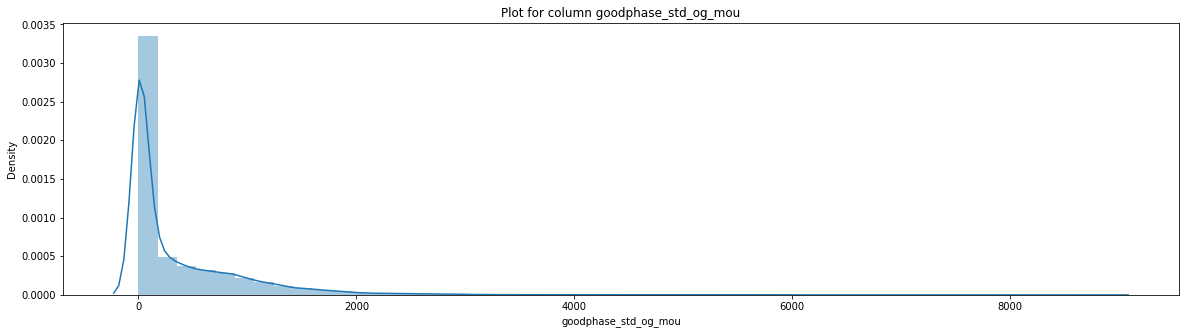

In [443]:
#Plotting distplots for various columns
for i in df_tel_hvc.columns:
  plt.figure(figsize = [20,5])
  plt.title(f'Plot for column {i}')
  univariate(df_tel_hvc[i])
  plt.show()
  print(180*"=","\n")

**Observations of Univariate EDA**
* Class imbalance is quite visible from the plots, most of the features are showing on lower side
* The maximum number of customers have churned in period of 0 to 20 months

**Bivariate Analysis on Columns with respect to Churn**

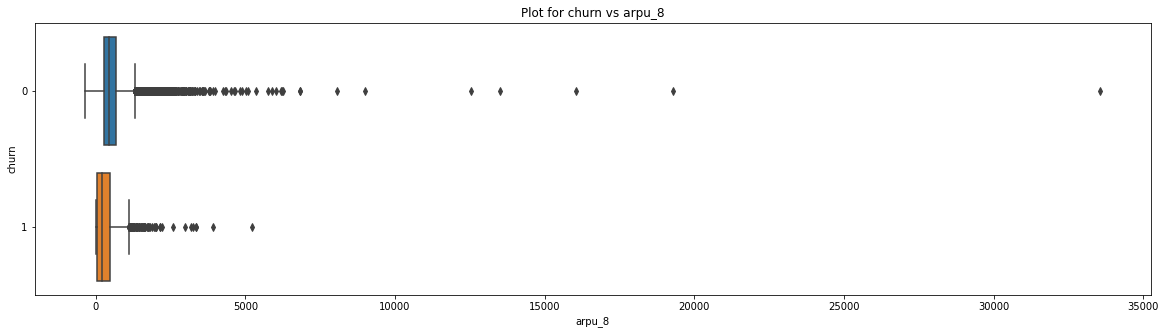

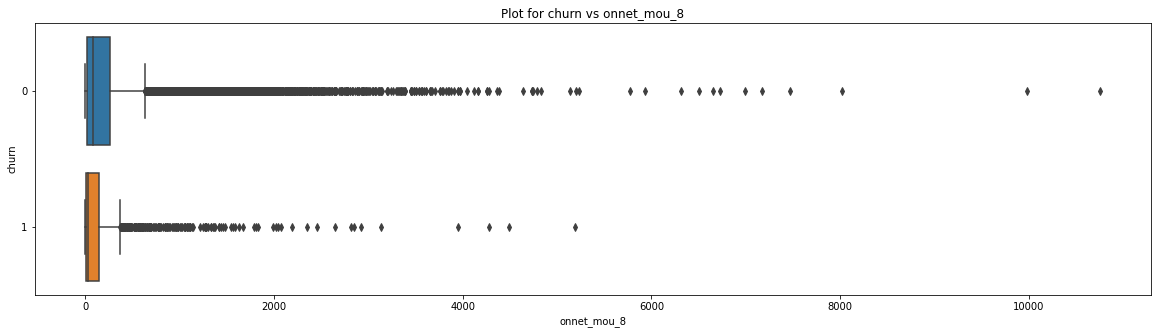

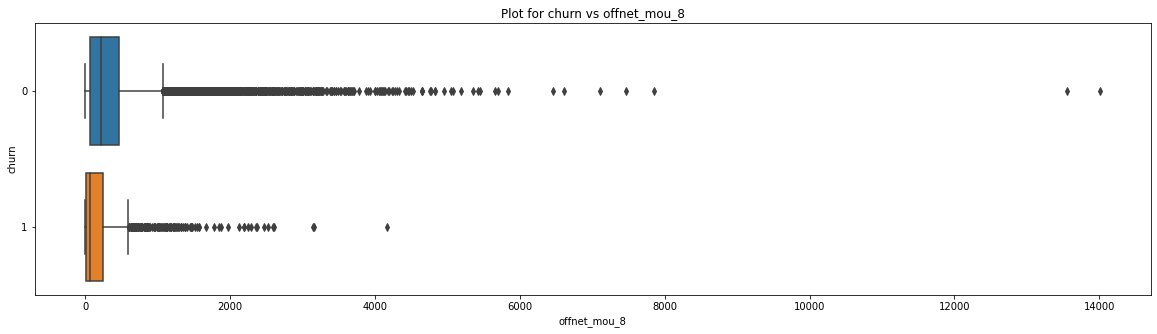

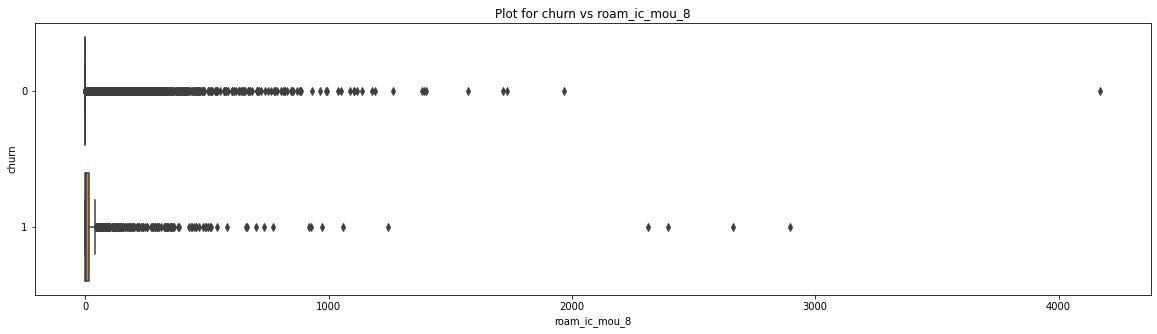

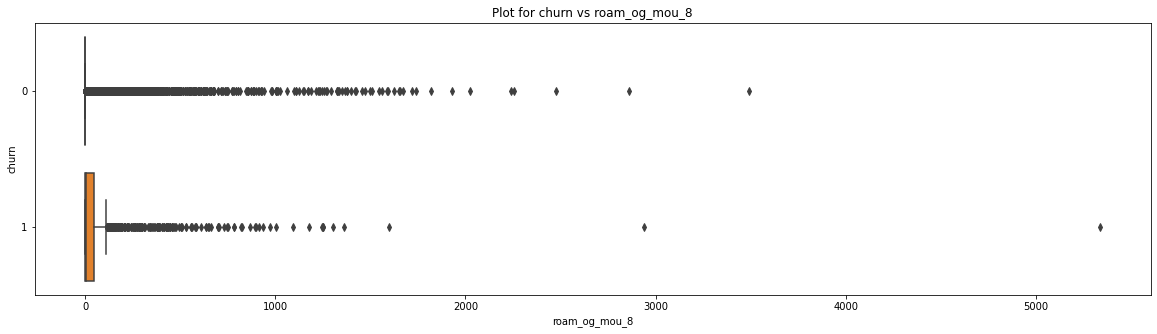

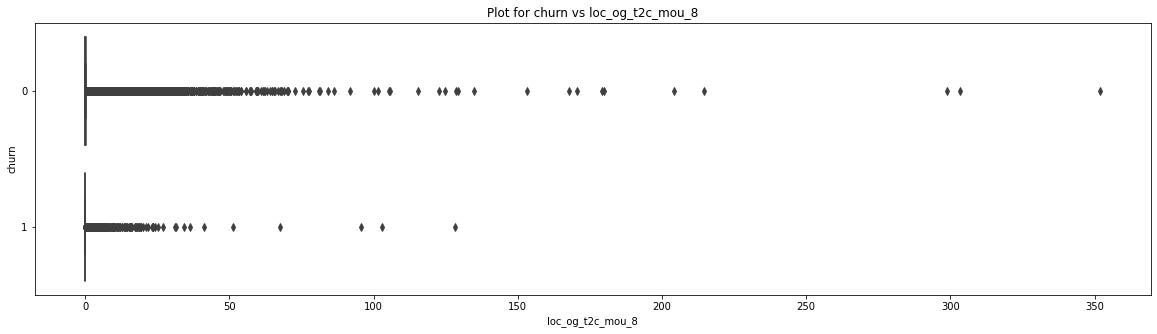

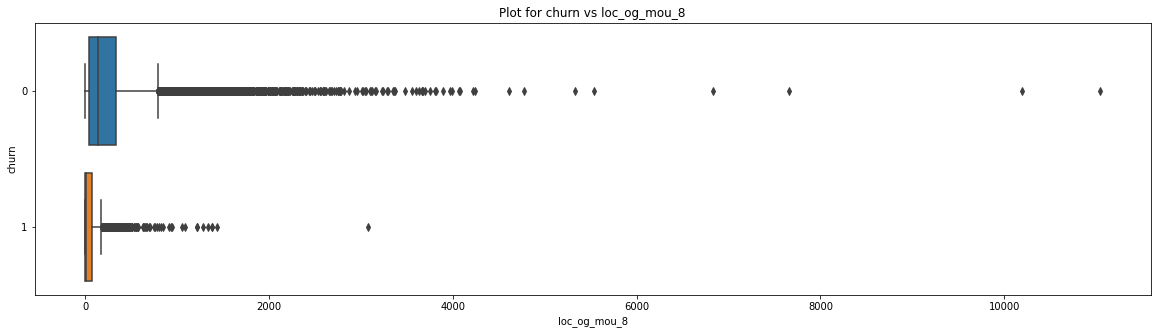

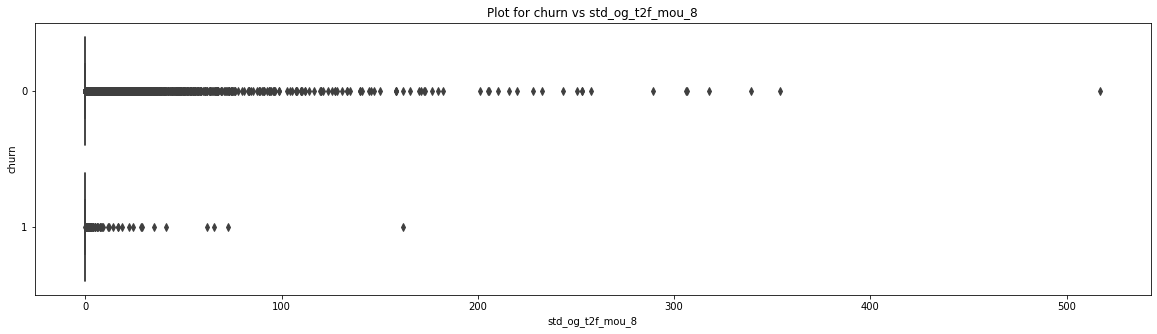

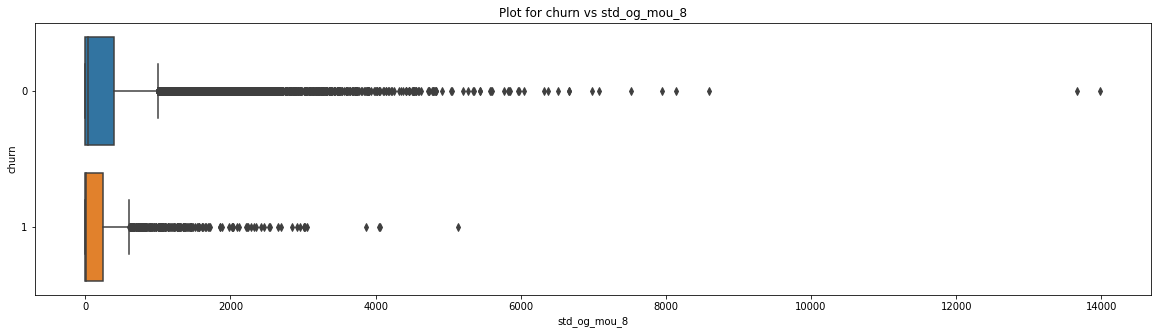

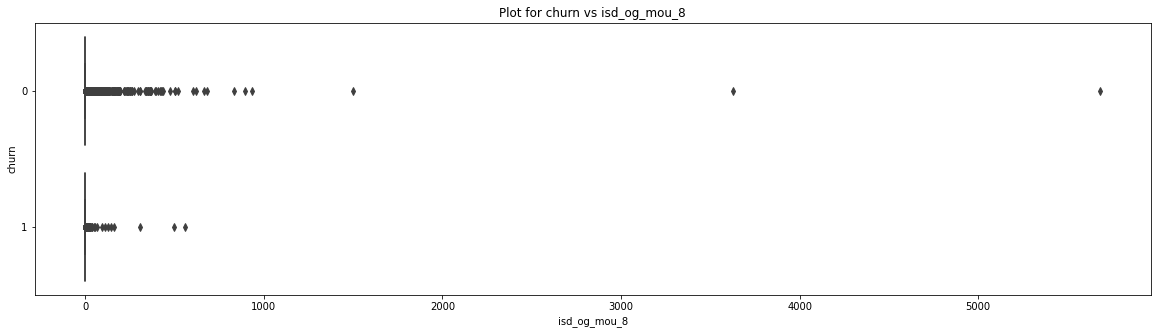

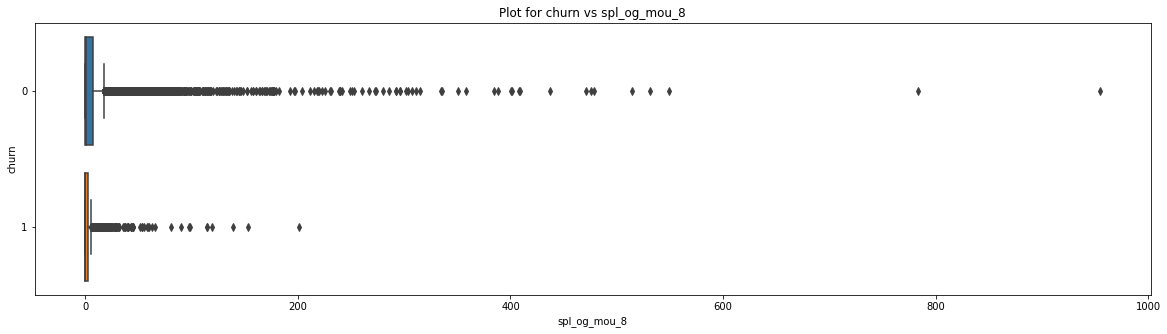

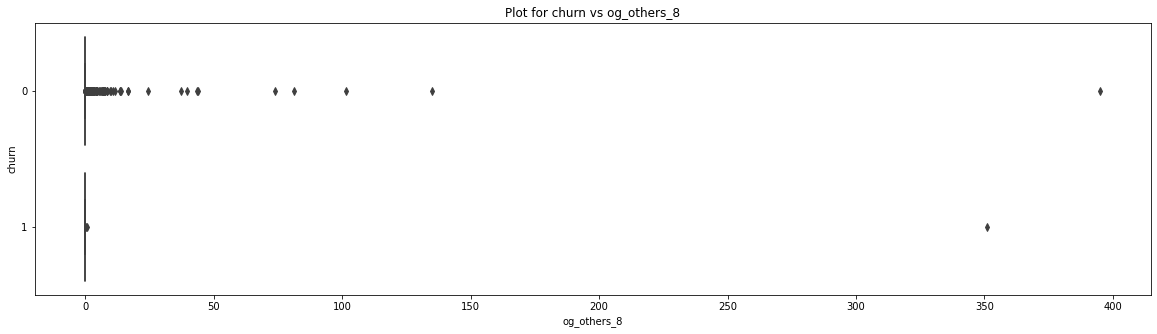

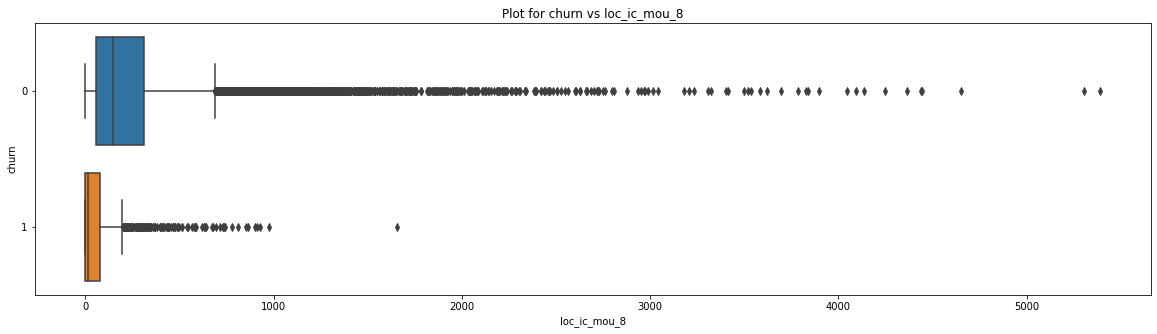

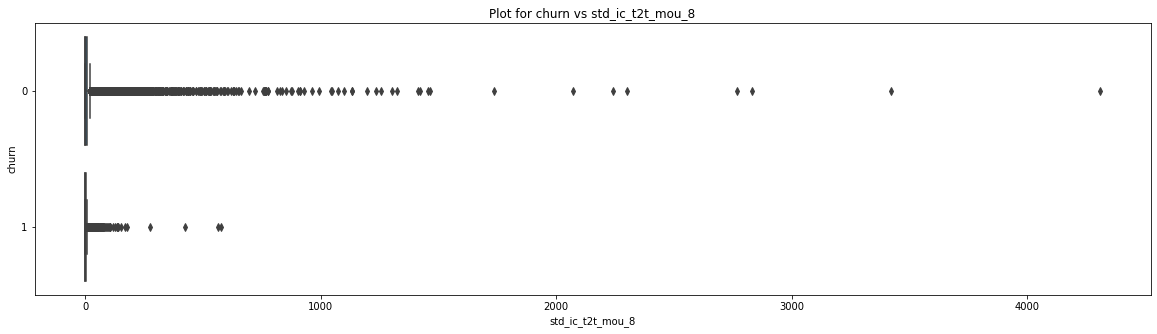

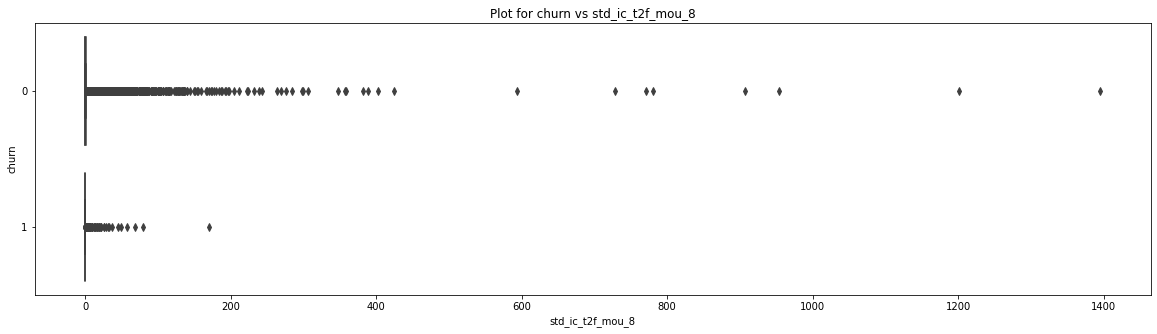

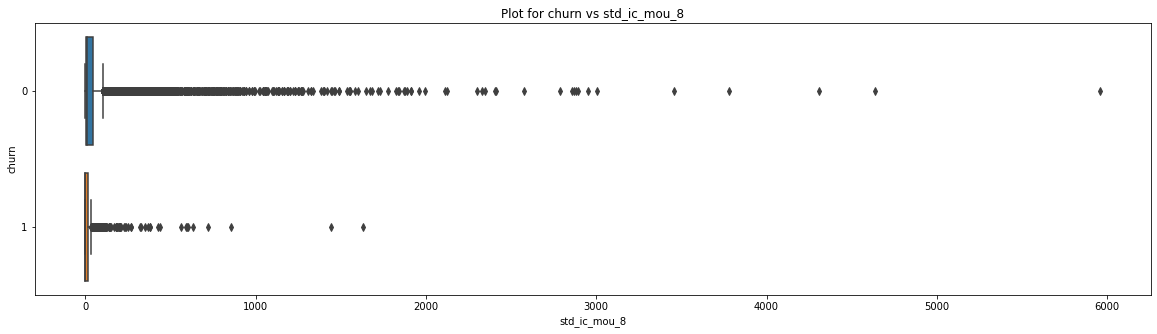

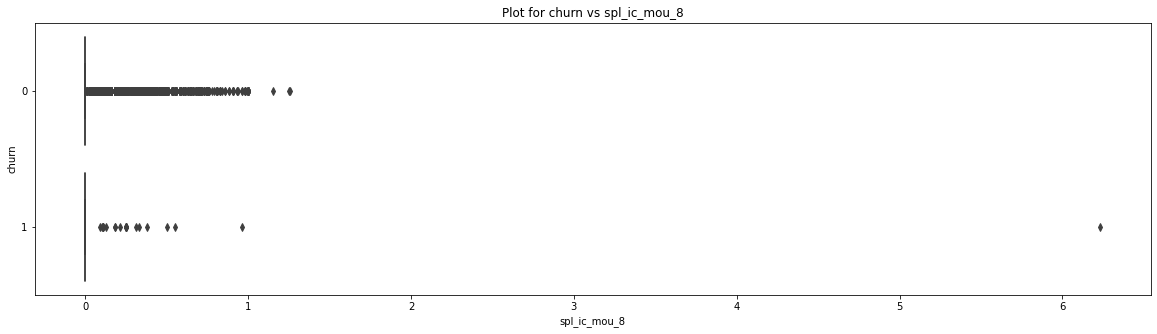

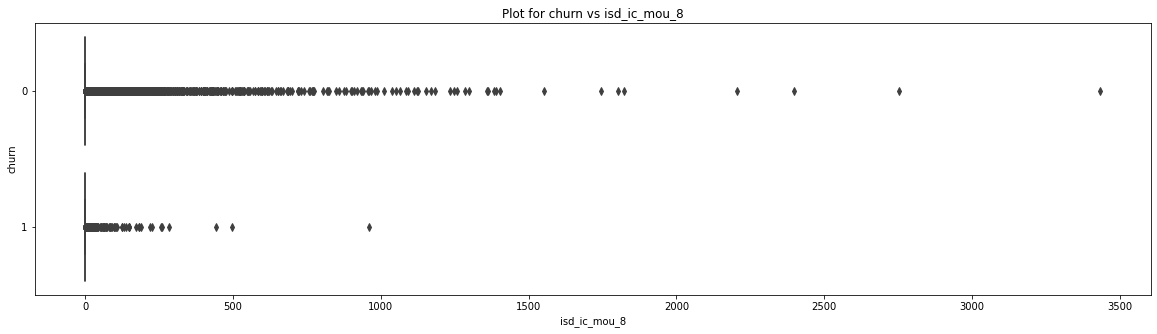

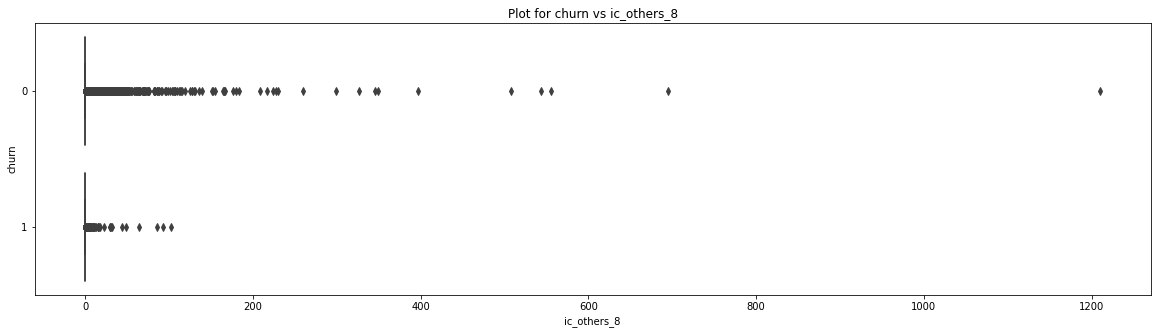

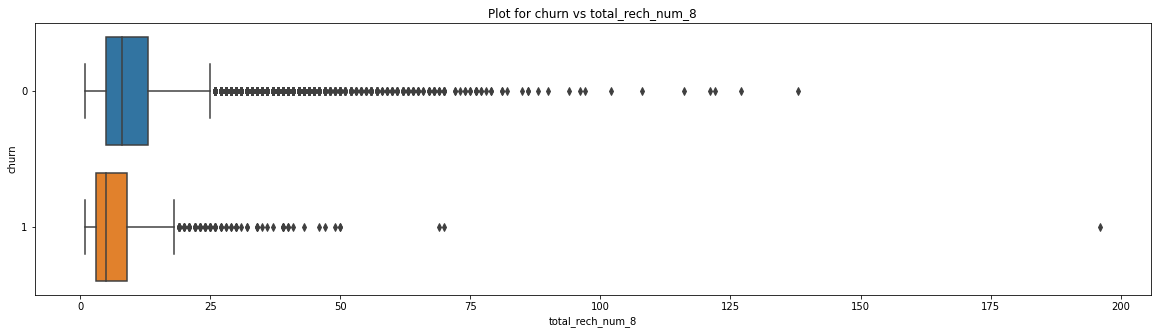

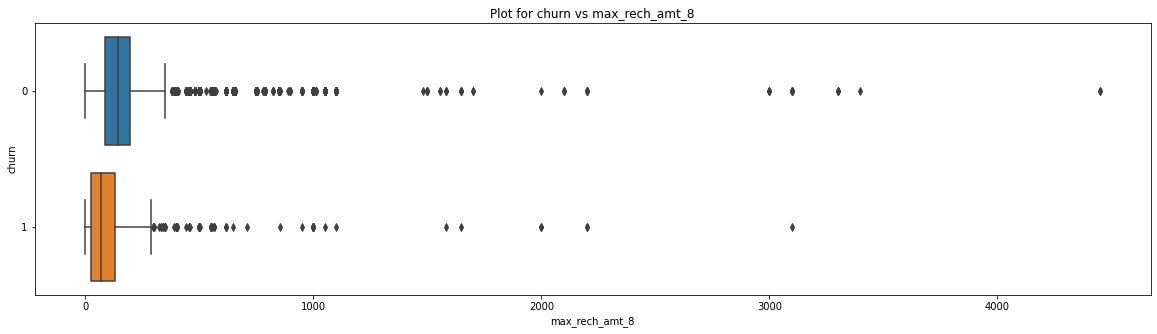

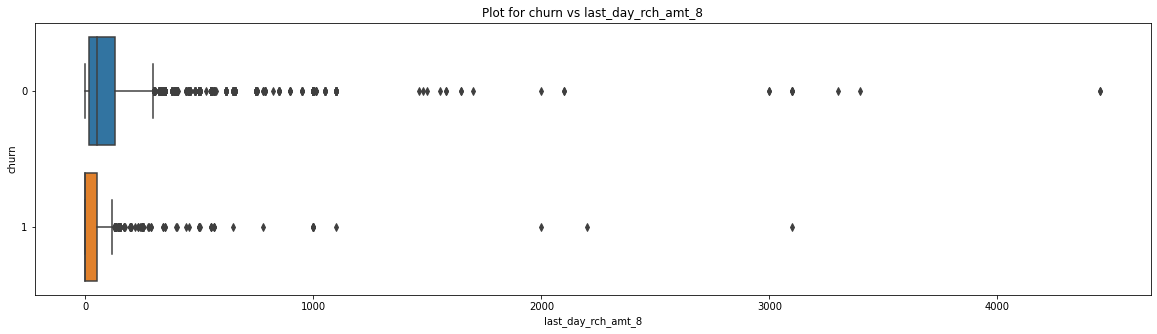

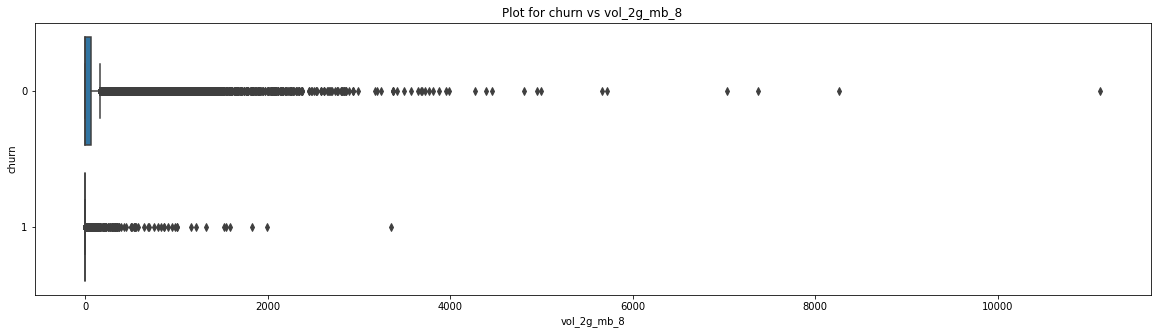

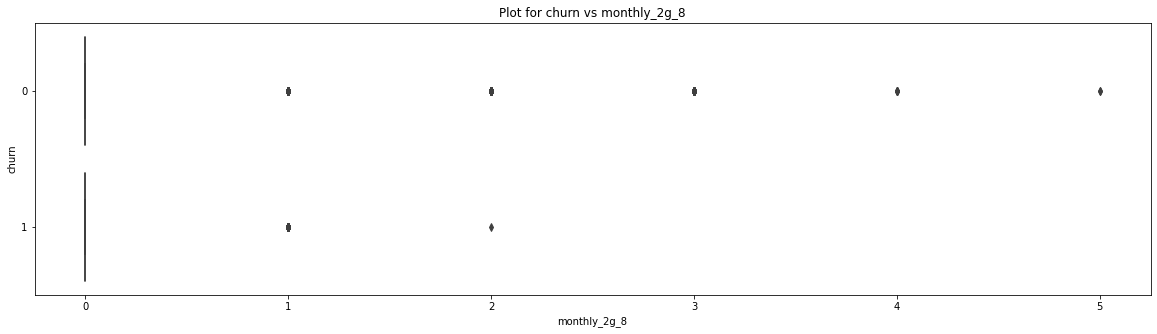

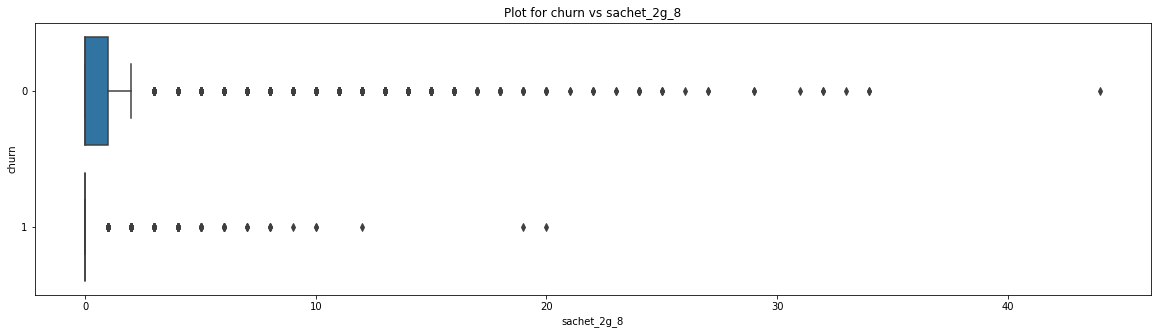

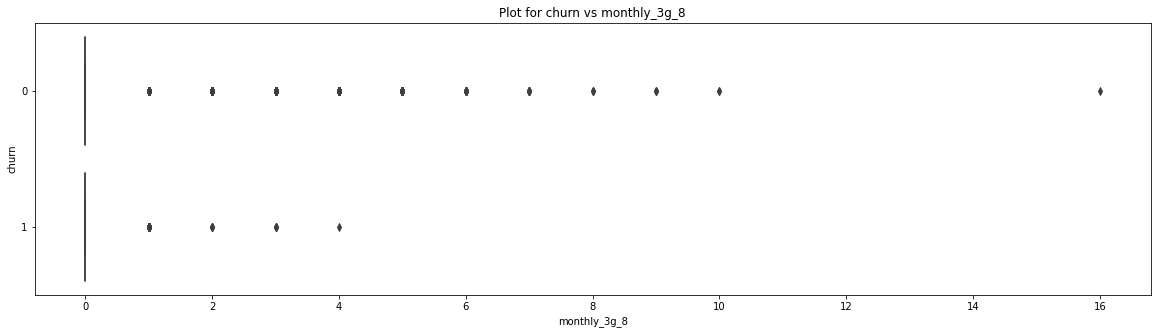

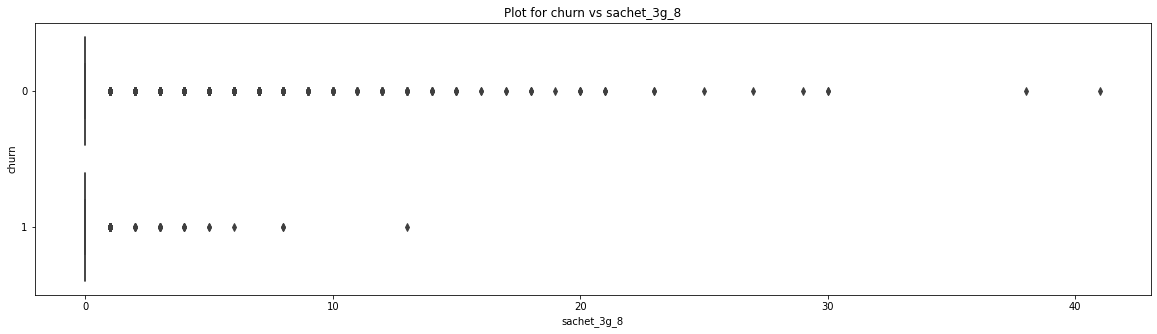

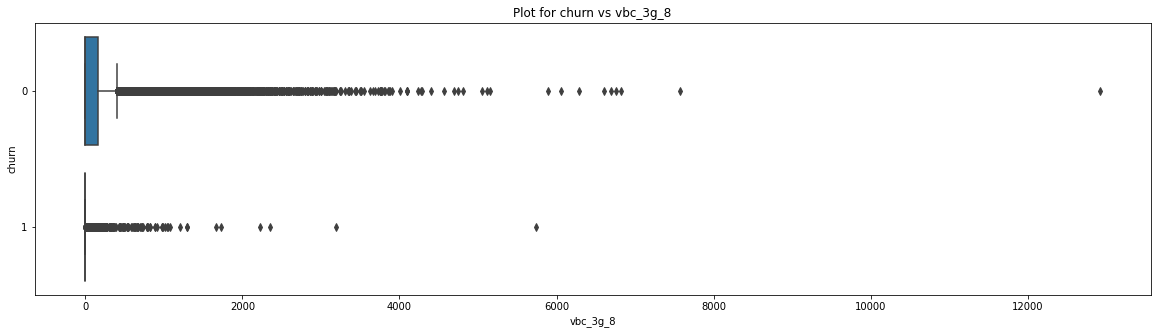

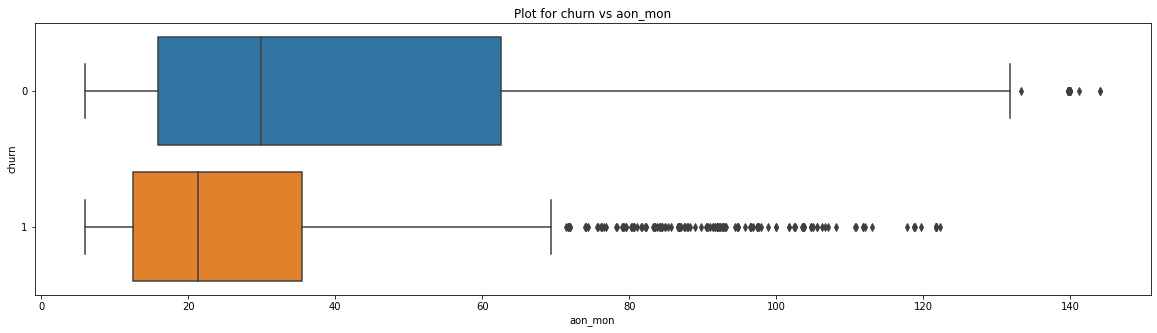

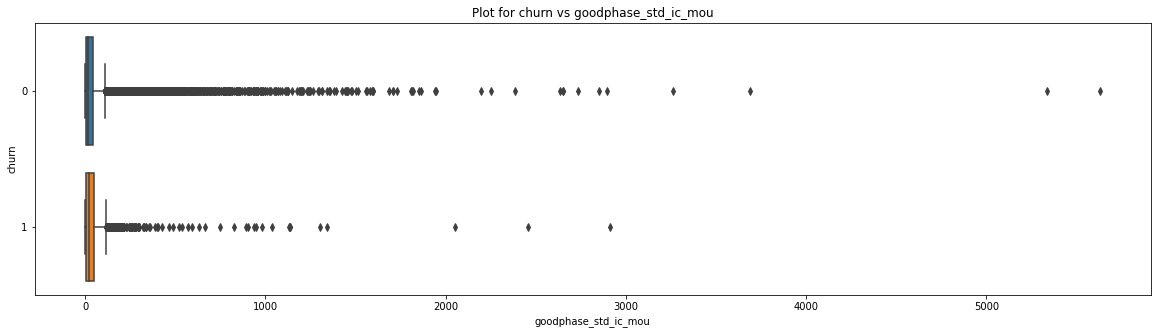

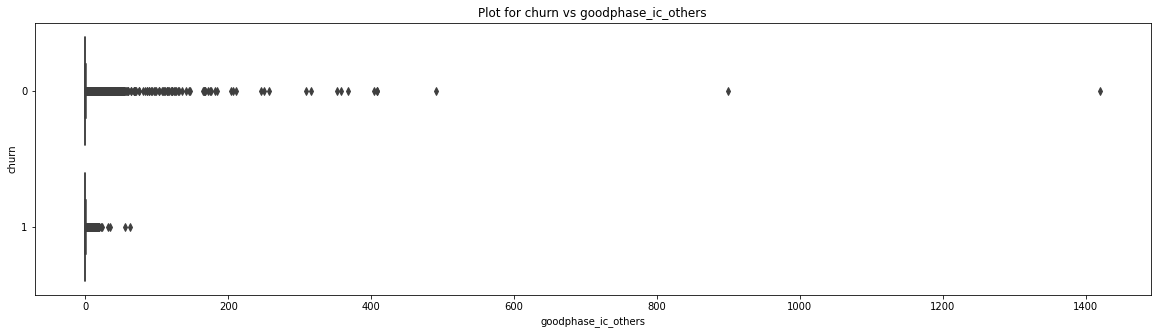

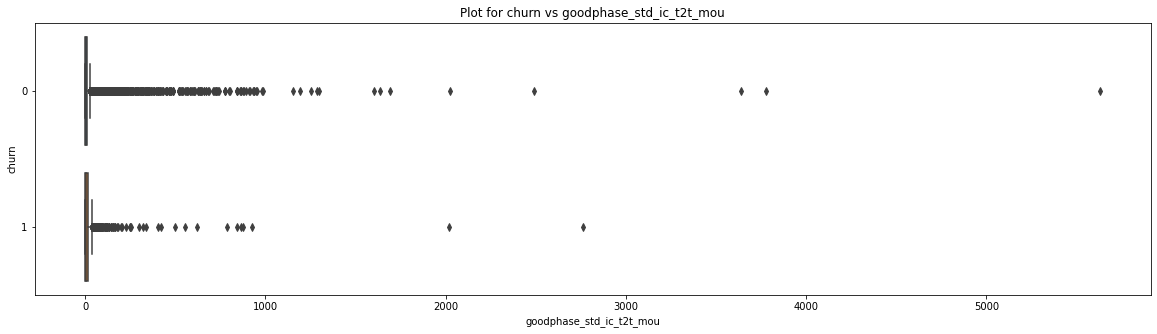

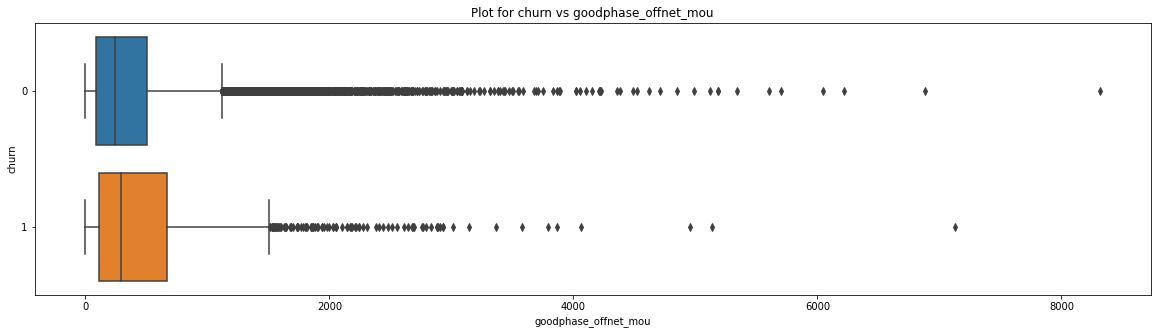

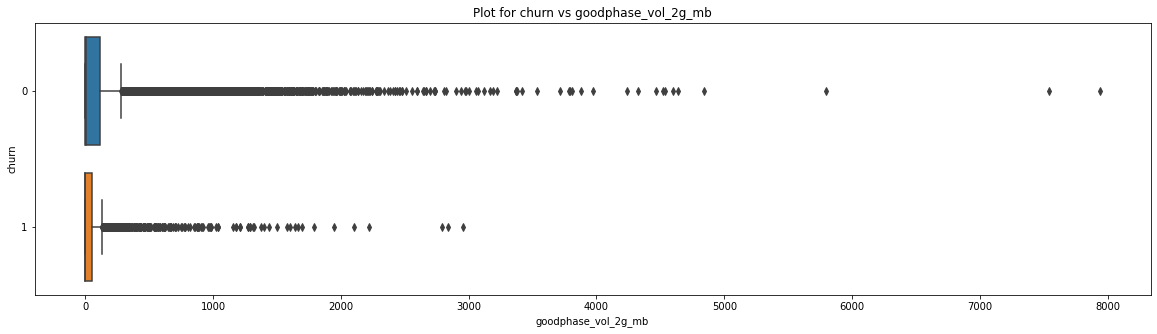

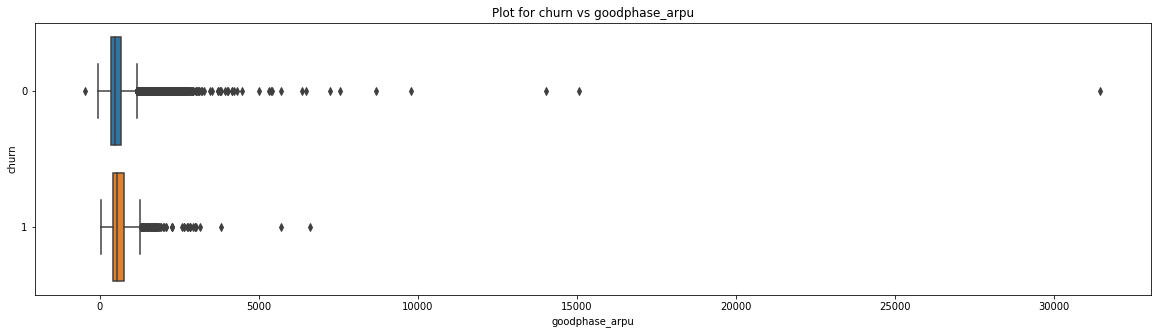

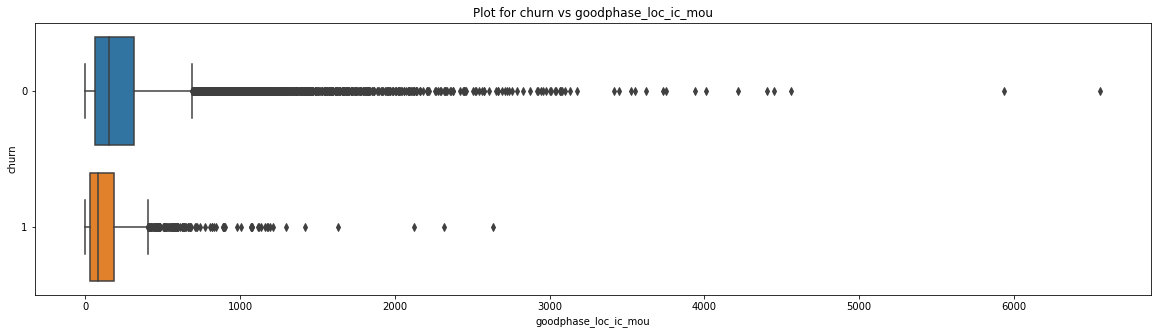

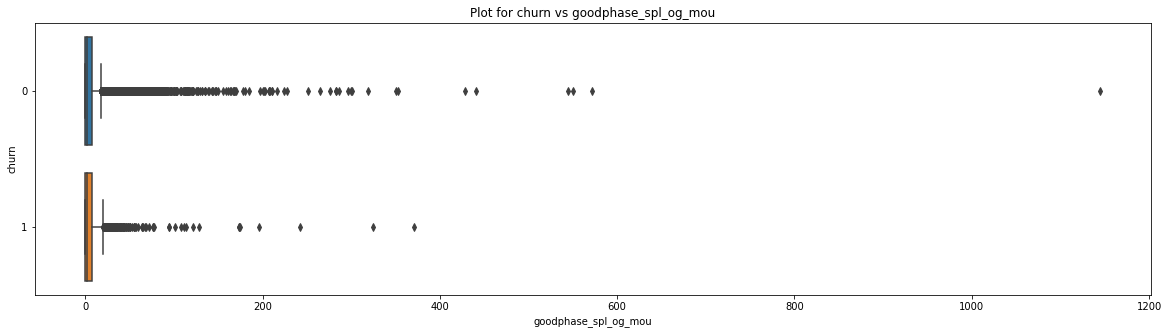

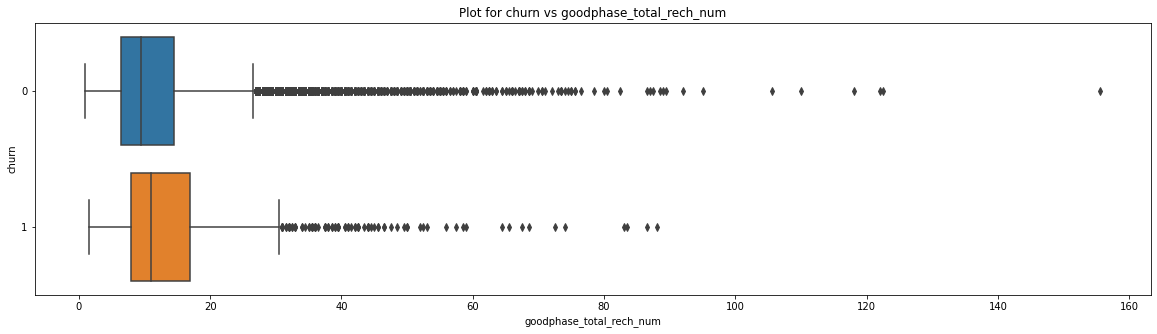

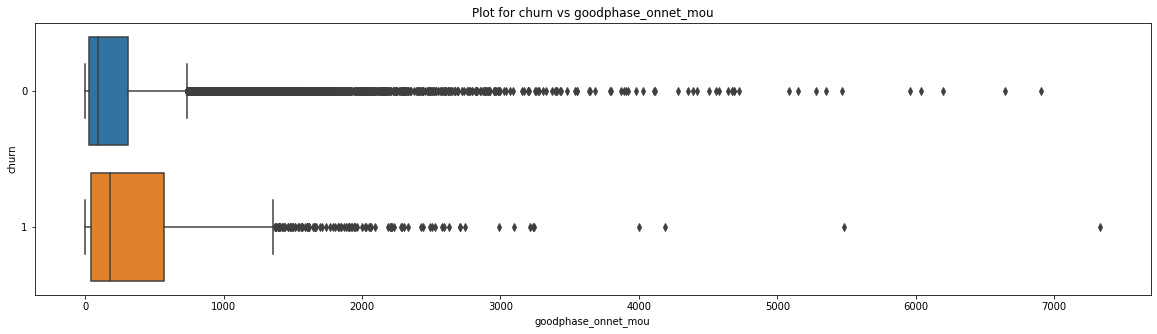

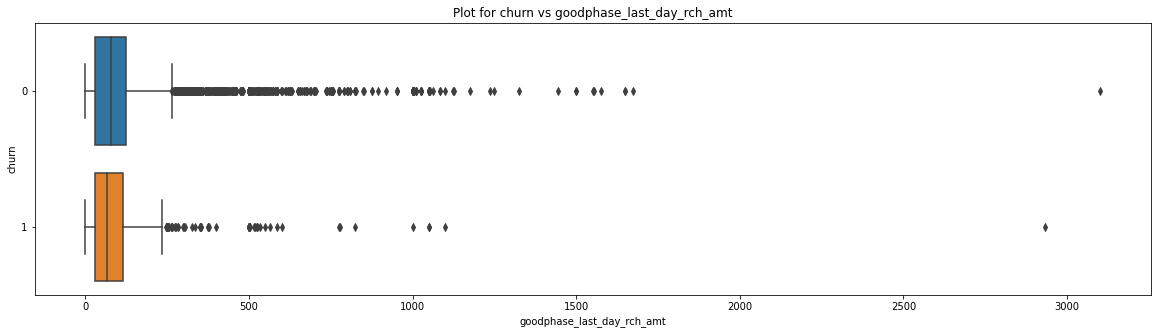

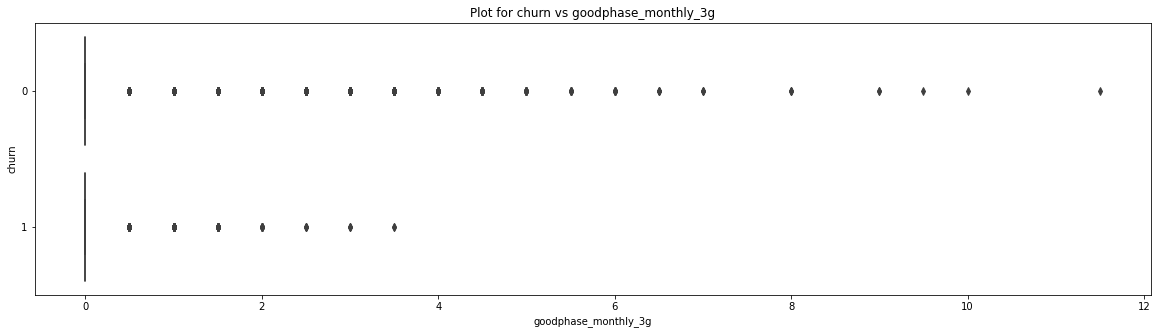

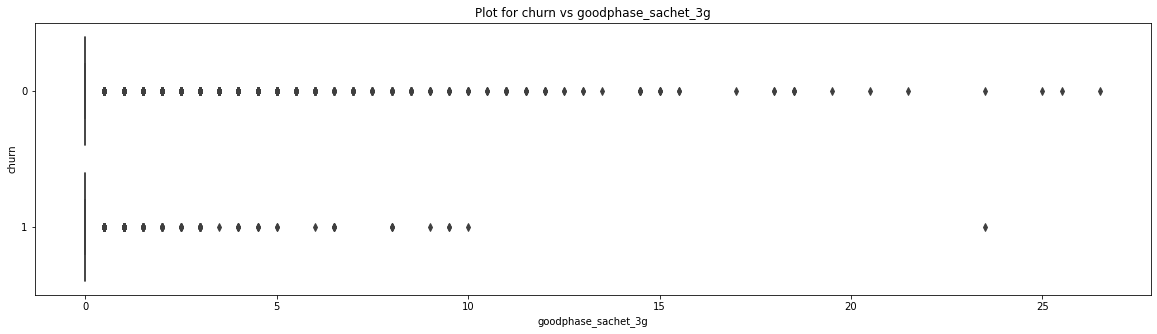

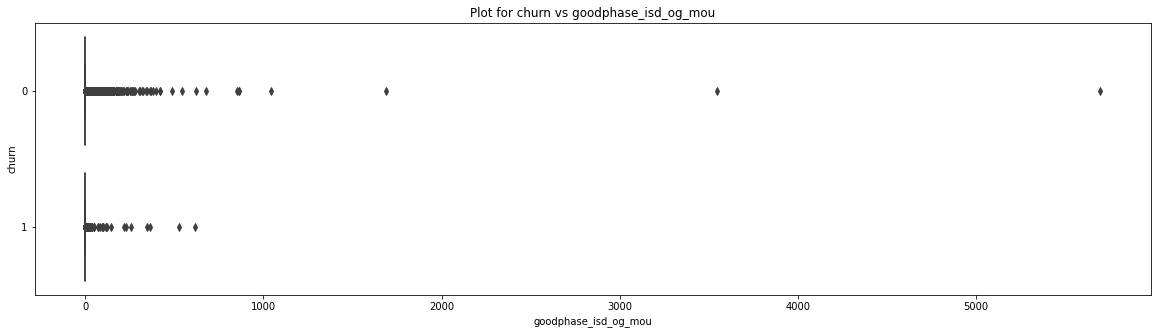

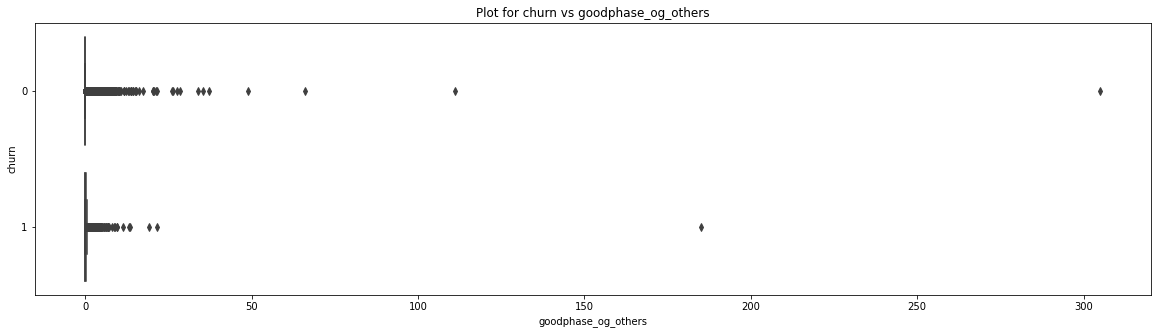

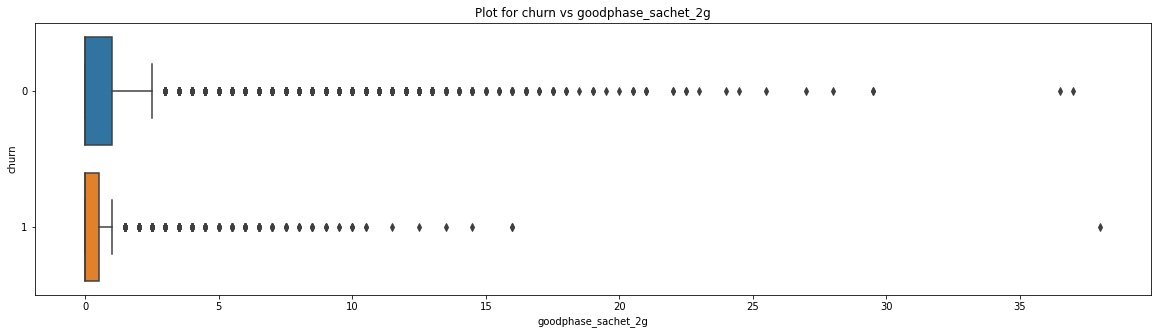

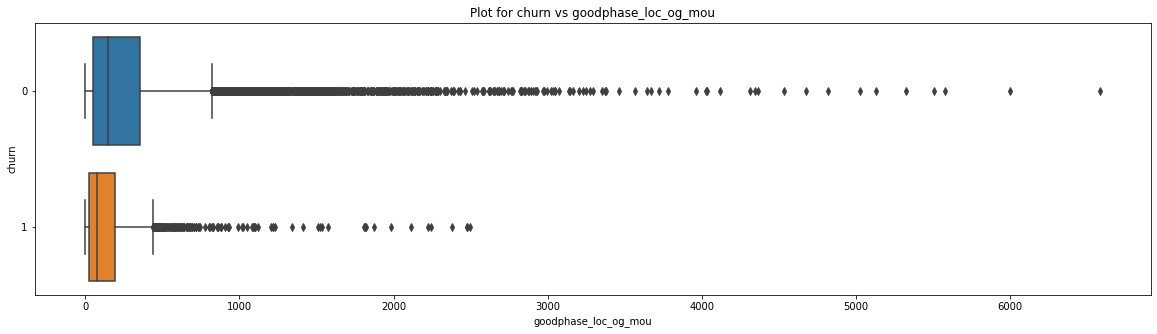

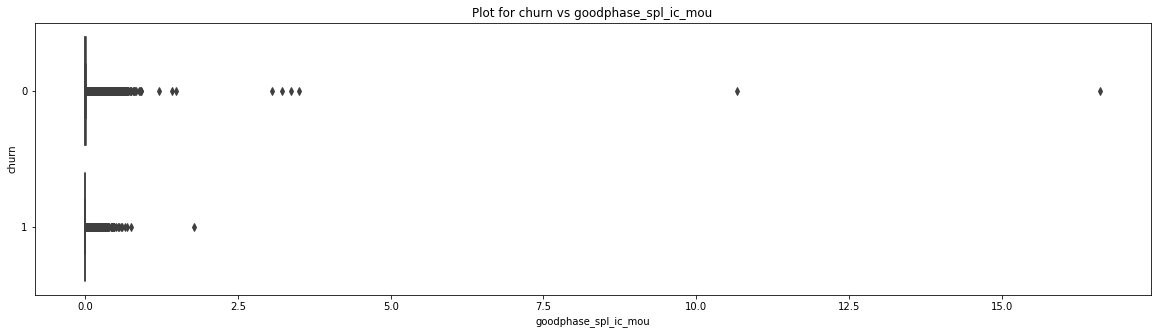

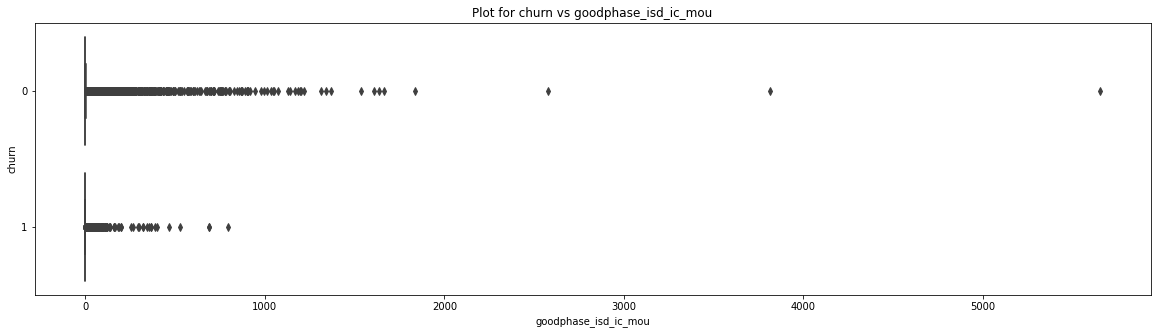

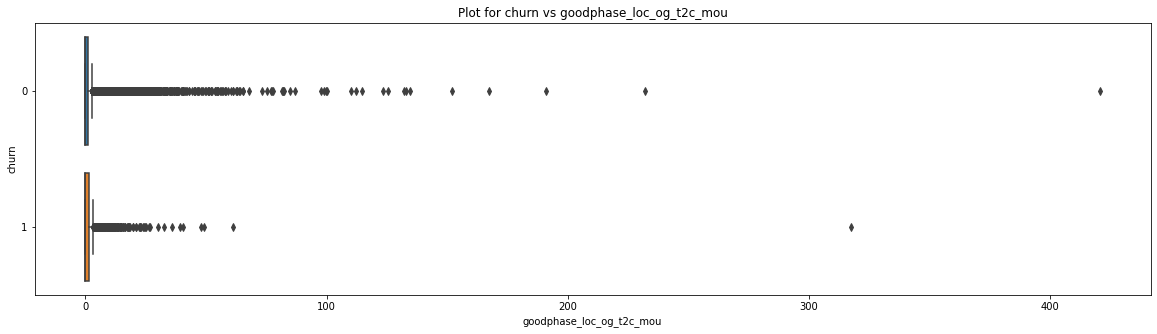

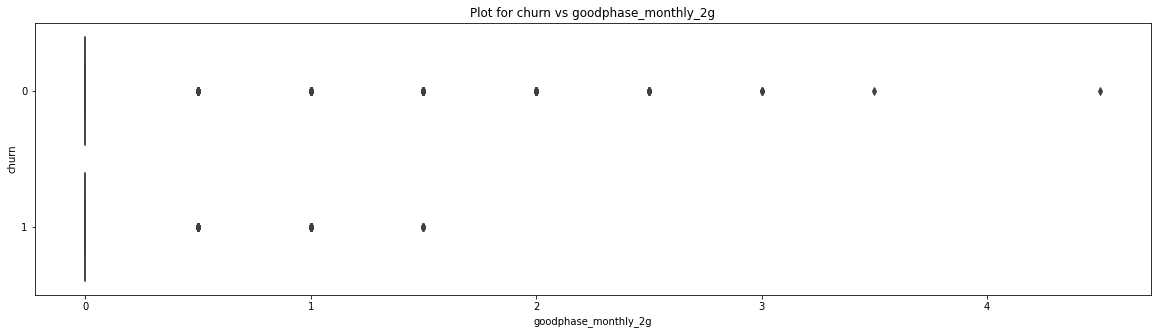

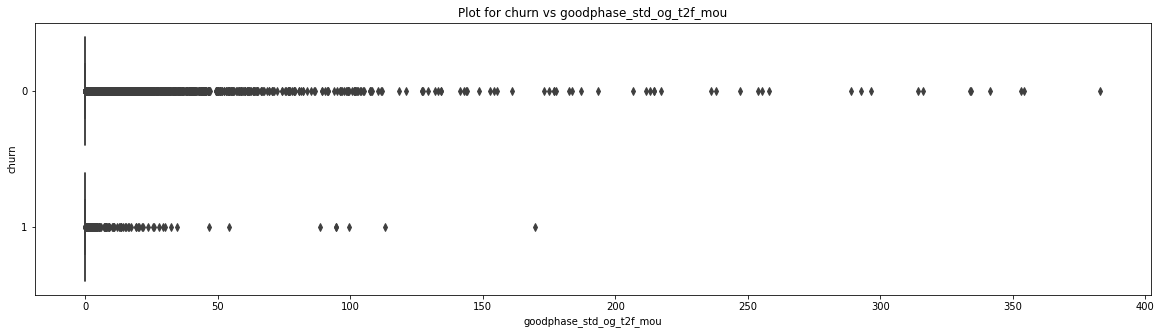

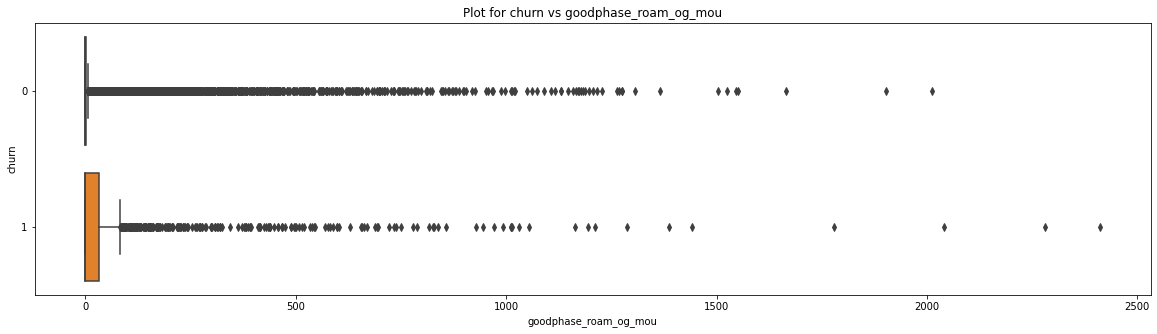

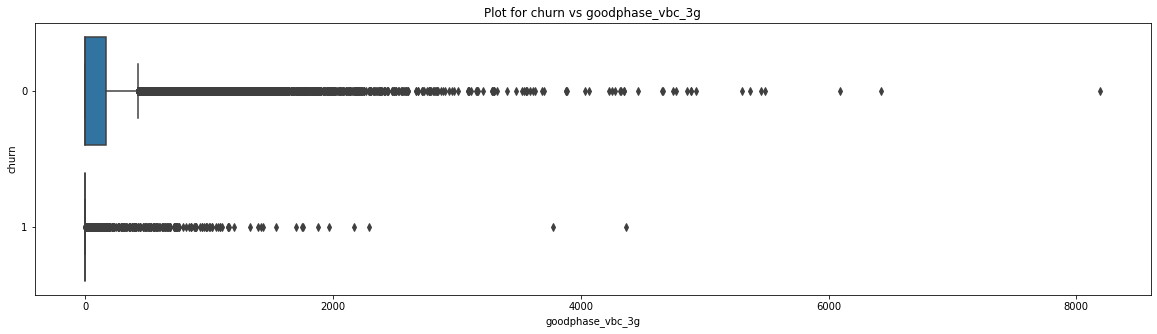

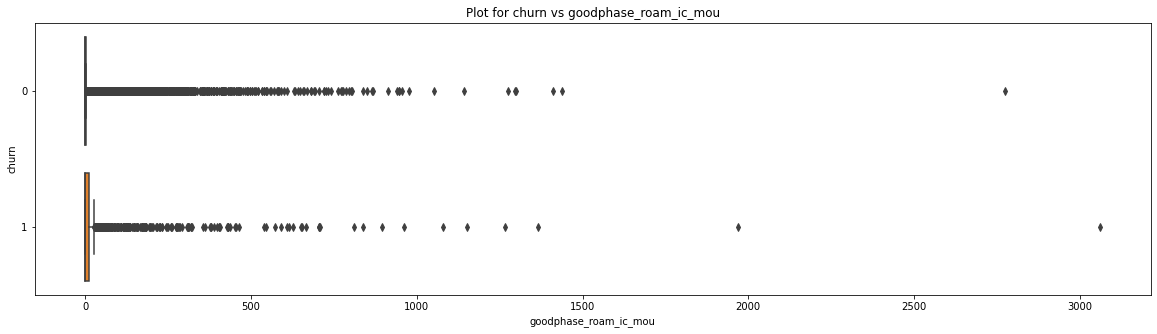

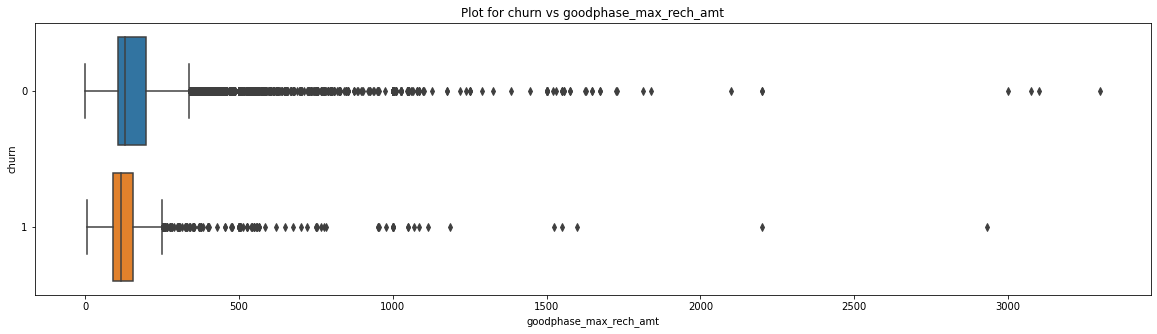

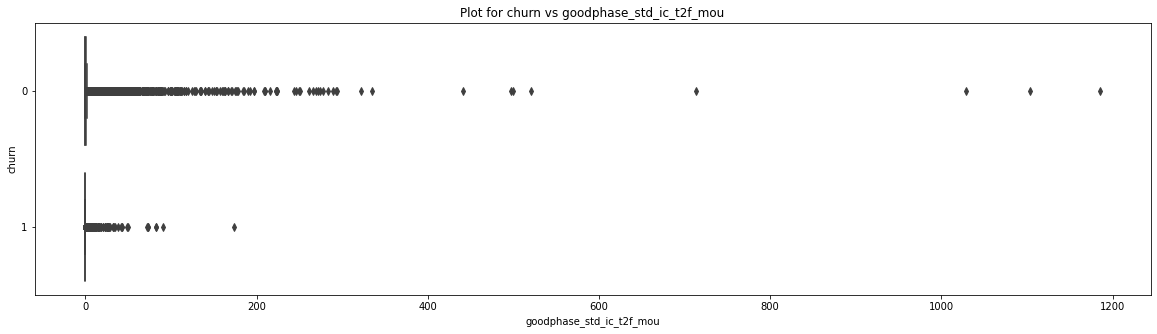

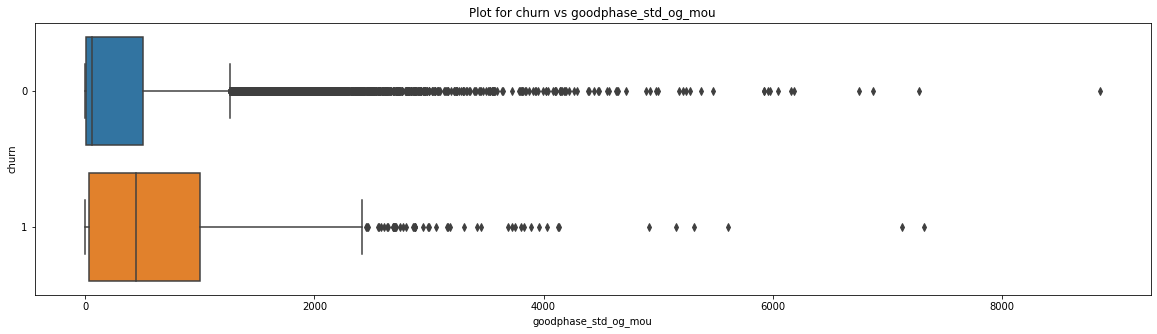

In [444]:
#Plotting boxplots for various columns
for k in df_tel_hvc.columns:
  if k != 'churn':
    plt.figure(figsize = [20,5])
    plt.title(f'Plot for churn vs {k}')
    bivariate(df_tel_hvc[k],df_tel_hvc['churn'])
    plt.show()
    print(180*"=","\n")

**Observations of Bivariate EDA**
* The data contains outliers in most of the columns we need to treat the outliers for better model performance
* Median of Churners is more than median of non-churners in 6th & 7th Month (good phase) total recharge
* Good phase sachet_3g has most outliers only

**Capping the Outliers**

In [445]:
def cap_outliers(data, k=3):
    upper_limit = data.mean() + k*data.std()
    lower_limit = data.mean() - k*data.std()
    data[data<lower_limit] = lower_limit
    data[data>upper_limit] = upper_limit
    return data

In [446]:
#Updating list of Numerical data columns
num_cols = [nc for nc in df_tel_hvc.columns if nc not in 'churn']

In [447]:
#Capping outliers in the numeric columns
df_tel_hvc[num_cols] =df_tel_hvc[num_cols].apply(cap_outliers, axis=0)

Rechecking if outliers are capped by plotting any one variable

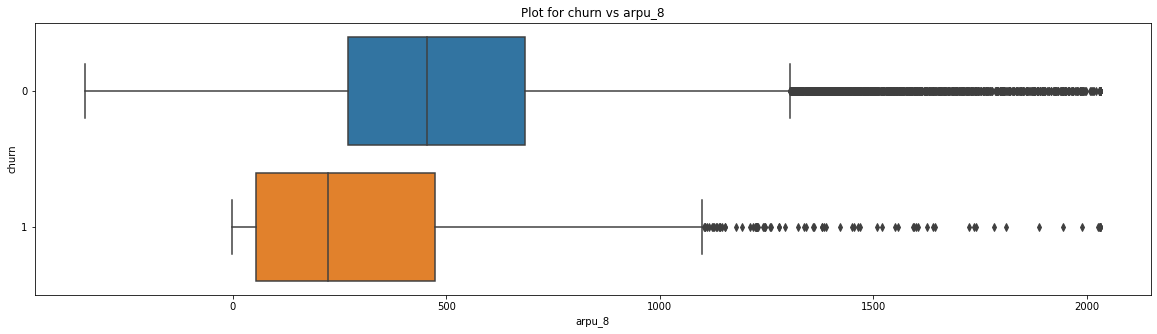

In [448]:
#Plotting churn vs arpu_8 
plt.figure(figsize = [20,5])
plt.title(f'Plot for churn vs arpu_8')
bivariate(df_tel_hvc['arpu_8'],df_tel_hvc['churn'])
plt.show()

We can see that outliers are removed to some extent

**Plotting Scatter plot with duration on network in months vs the churn**

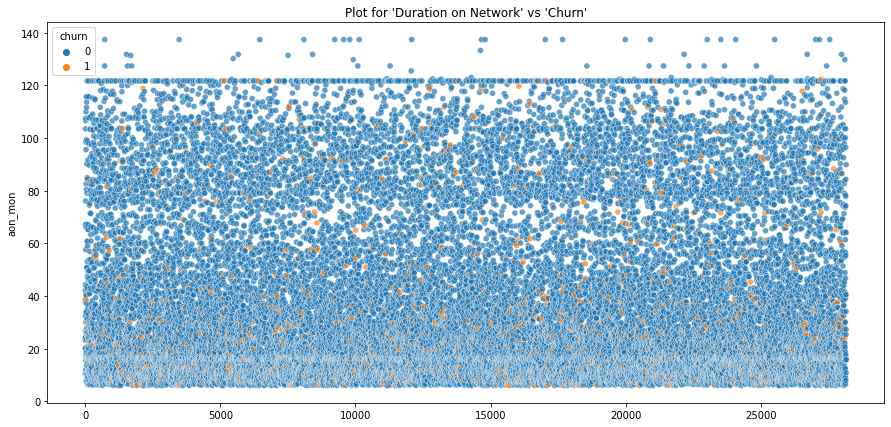

In [449]:
#PLotting scattr plot between a'age on network' and 'churn'
plt.figure(figsize=(15,7))
plt.title("Plot for 'Duration on Network' vs 'Churn'")
sns.scatterplot(y=df_tel_hvc['aon_mon'], x=df_tel_hvc.index, hue=df_tel_hvc['churn'], alpha=0.7)
plt.show()

##**6. Handling Class Imbalance**

**Creating X & y from main dataframe**

In [450]:
#Creating X & Y from train - test split
y = df_tel_hvc['churn']
X = df_tel_hvc.drop('churn', axis = 1)

**Scaling the variables in X**

In [451]:
#Scaling the X
scaler = StandardScaler()
X[X.columns] = scaler.fit_transform(X[X.columns])

**Handling Class Imbalance**

We will look at the two classes Churn = 1 and Not Churn = 0 again using a pie plot

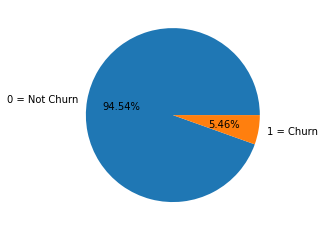

In [452]:
#Plotting a pie plot to see class distribution
plt.figure()
plt.pie(y.value_counts(), labels=['0 = Not Churn', '1 = Churn'], autopct='%.2f%%')
plt.show()

We can se that there is class imbalance / skewdness in out target variable. We need to treat the same and we will be creating synthetic samples by doing upsampling using **SMOTE** (Synthetic Minority Oversampling Technique).

In [453]:
#We have already imported the SMOTE above and now we will initialize SMOTE 
smo = SMOTE(random_state = 42)

#We will fit the X and Y using SMOTE
X_smo,y_smo = smo.fit_resample(X, y)

Lets check if class imbalance is handled well by SMOTE

In [454]:
#Looking at value counts on y_smo
y_smo.value_counts()

0    26625
1    26625
Name: churn, dtype: int64

##**7. Principal Component Analysis**

In [455]:
#We have already imported the PCA above and now we will initialize PCA
pca = PCA(n_components = 25)

#We will fit transform the X_train_sm using PCA
X_pca = pca.fit_transform(X_smo)
X_pca.shape

(53250, 25)

##**8. Model Building**

###**8.1 Logistic Regression**

####**Train-Test Split for Logistic Regression Model**

In [456]:
# Splitting data into train and test set 70:30
X_train, X_test, y_train, y_test = train_test_split(X_smo, y_smo, train_size=0.7, test_size=0.3, random_state=100)

In [457]:
#Checking the shapes of splitted datasets
print("Train Datasets")
print(f'X_train shape : {X_train.shape}')
print(f'y_train shape : {y_train.shape}')

print("Test Datasets")
print(f'X_test shape : {X_test.shape}')
print(f'y_test shape : {y_test.shape}')

Train Datasets
X_train shape : (37275, 57)
y_train shape : (37275,)
Test Datasets
X_test shape : (15975, 57)
y_test shape : (15975,)


####**8.1.1 First Logistic Regression Model**

In [458]:
#First logistic regression model
#We have already imported the Logistic Regression above and now we will initialize logistic model
X_train_sm = sm.add_constant(X_train)
logi_mod_1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())

#Looking the the model params
res = logi_mod_1.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                37275
Model:                            GLM   Df Residuals:                    37217
Model Family:                Binomial   Df Model:                           57
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14986.
Date:                Tue, 04 Oct 2022   Deviance:                       29973.
Time:                        04:14:36   Pearson chi2:                 9.65e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

**Using RFE for feature elimination**

In [459]:
#We have already imported the RFE above and now we will create an LR object
log_reg = LogisticRegression()

#Running RFE for 30 features
rfe = RFE(log_reg, n_features_to_select=25)
rfe = rfe.fit(X_train,y_train)

In [460]:
#Creating a list of features after RFE showing column name, rfe support and rfe ranking to have an overview of affects of features
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('arpu_8', True, 1),
 ('onnet_mou_8', True, 1),
 ('offnet_mou_8', True, 1),
 ('roam_ic_mou_8', False, 27),
 ('roam_og_mou_8', True, 1),
 ('loc_og_t2c_mou_8', False, 15),
 ('loc_og_mou_8', False, 9),
 ('std_og_t2f_mou_8', False, 10),
 ('std_og_mou_8', True, 1),
 ('isd_og_mou_8', False, 21),
 ('spl_og_mou_8', False, 14),
 ('og_others_8', False, 30),
 ('loc_ic_mou_8', True, 1),
 ('std_ic_t2t_mou_8', False, 7),
 ('std_ic_t2f_mou_8', False, 19),
 ('std_ic_mou_8', True, 1),
 ('spl_ic_mou_8', True, 1),
 ('isd_ic_mou_8', False, 25),
 ('ic_others_8', False, 20),
 ('total_rech_num_8', True, 1),
 ('max_rech_amt_8', False, 6),
 ('last_day_rch_amt_8', True, 1),
 ('vol_2g_mb_8', False, 2),
 ('monthly_2g_8', True, 1),
 ('sachet_2g_8', True, 1),
 ('monthly_3g_8', True, 1),
 ('sachet_3g_8', True, 1),
 ('vbc_3g_8', True, 1),
 ('aon_mon', True, 1),
 ('goodphase_std_ic_mou', False, 12),
 ('goodphase_ic_others', False, 13),
 ('goodphase_std_ic_t2t_mou', False, 5),
 ('goodphase_offnet_mou', True, 1),
 ('go

In [461]:
#Creating a list of only RFE support columns
rfe_cols = X.columns[rfe.support_]
print(rfe_cols)

Index(['arpu_8', 'onnet_mou_8', 'offnet_mou_8', 'roam_og_mou_8',
       'std_og_mou_8', 'loc_ic_mou_8', 'std_ic_mou_8', 'spl_ic_mou_8',
       'total_rech_num_8', 'last_day_rch_amt_8', 'monthly_2g_8', 'sachet_2g_8',
       'monthly_3g_8', 'sachet_3g_8', 'vbc_3g_8', 'aon_mon',
       'goodphase_offnet_mou', 'goodphase_arpu', 'goodphase_loc_ic_mou',
       'goodphase_total_rech_num', 'goodphase_onnet_mou',
       'goodphase_monthly_3g', 'goodphase_sachet_3g', 'goodphase_loc_og_mou',
       'goodphase_std_og_mou'],
      dtype='object')


####**8.1.2 Second Logistic Regression Model** (after using RFE support Columns)

In [462]:
#Second logistic regression model
X_train_sm = sm.add_constant(X_train[rfe_cols])
logi_mod_2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())

#Looking the the model params
res = logi_mod_2.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                37275
Model:                            GLM   Df Residuals:                    37249
Model Family:                Binomial   Df Model:                           25
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15215.
Date:                Tue, 04 Oct 2022   Deviance:                       30429.
Time:                        04:15:12   Pearson chi2:                 8.84e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

Getting the predicted values on the train set

In [463]:
#Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred[:10]

array([0.5164261 , 0.14272364, 0.39229282, 0.91557146, 0.43763203,
       0.76135342, 0.89294722, 0.02043693, 0.06548441, 0.97152838])

Creating a dataframe with the actual churn flag and the predicted probabilities

In [464]:
#Creating the dataframe
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':y_train_pred})
y_train_pred_final.head()

Churn  Churn_Prob
0     0    0.516426
1     0    0.142724
2     1    0.392293
3     1    0.915571
4     0    0.437632

Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0

In [465]:
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

Churn  Churn_Prob  predicted
0     0    0.516426          1
1     0    0.142724          0
2     1    0.392293          0
3     1    0.915571          1
4     0    0.437632          0

Looking at the model evaluation metrics i.e., Confusion Matrix & Accuracy Score

In [466]:
#Confusion matrix 
confusion_mat = confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
print('Confusion Matrix:\n',confusion_mat,"\n\n")

#The overall accuracy.
accuracy_score = accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted).round(3)
print(f'Accuracy Score: {accuracy_score}')

Confusion Matrix:
 [[15166  3506]
 [ 2971 15632]] 


Accuracy Score: 0.826


Checking VIFs

In [467]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[rfe_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[rfe_cols].values, i) for i in range(X_train[rfe_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
24      goodphase_std_og_mou  18.68
16      goodphase_offnet_mou  13.96
20       goodphase_onnet_mou  12.60
4               std_og_mou_8  10.79
2               offnet_mou_8   8.43
0                     arpu_8   7.83
1                onnet_mou_8   7.74
23      goodphase_loc_og_mou   6.44
5               loc_ic_mou_8   4.90
17            goodphase_arpu   4.74
18      goodphase_loc_ic_mou   4.36
8           total_rech_num_8   3.85
19  goodphase_total_rech_num   2.75
12              monthly_3g_8   2.21
21      goodphase_monthly_3g   2.03
3              roam_og_mou_8   1.80
13               sachet_3g_8   1.74
22       goodphase_sachet_3g   1.70
14                  vbc_3g_8   1.67
9         last_day_rch_amt_8   1.63
11               sachet_2g_8   1.37
10              monthly_2g_8   1.25
15                   aon_mon   1.24
6               std_ic_mou_8   1.18
7               spl_ic_mou_8   1.07

We can see that few columns have VIF more than 8. We can drop such columns one by one and re-running the models

####**8.1.3 Third Logistic Regression Model**

In [468]:
#Lets drop "goodphase_std_og_mou" since it has a high VIF
rfe_cols = rfe_cols.drop('goodphase_std_og_mou')
rfe_cols

Index(['arpu_8', 'onnet_mou_8', 'offnet_mou_8', 'roam_og_mou_8',
       'std_og_mou_8', 'loc_ic_mou_8', 'std_ic_mou_8', 'spl_ic_mou_8',
       'total_rech_num_8', 'last_day_rch_amt_8', 'monthly_2g_8', 'sachet_2g_8',
       'monthly_3g_8', 'sachet_3g_8', 'vbc_3g_8', 'aon_mon',
       'goodphase_offnet_mou', 'goodphase_arpu', 'goodphase_loc_ic_mou',
       'goodphase_total_rech_num', 'goodphase_onnet_mou',
       'goodphase_monthly_3g', 'goodphase_sachet_3g', 'goodphase_loc_og_mou'],
      dtype='object')

In [469]:
#Third logistic regression model
X_train_sm = sm.add_constant(X_train[rfe_cols])
logi_mod_3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())

#Looking the the model params
res = logi_mod_3.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                37275
Model:                            GLM   Df Residuals:                    37250
Model Family:                Binomial   Df Model:                           24
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15236.
Date:                Tue, 04 Oct 2022   Deviance:                       30471.
Time:                        04:15:16   Pearson chi2:                 8.95e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

Checking VIFs

In [470]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[rfe_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[rfe_cols].values, i) for i in range(X_train[rfe_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
4               std_og_mou_8  9.76
2               offnet_mou_8  7.96
0                     arpu_8  7.81
1                onnet_mou_8  7.26
5               loc_ic_mou_8  4.90
17            goodphase_arpu  4.63
18      goodphase_loc_ic_mou  4.36
8           total_rech_num_8  3.85
23      goodphase_loc_og_mou  3.76
16      goodphase_offnet_mou  3.58
20       goodphase_onnet_mou  3.26
19  goodphase_total_rech_num  2.75
12              monthly_3g_8  2.21
21      goodphase_monthly_3g  2.03
13               sachet_3g_8  1.74
3              roam_og_mou_8  1.70
22       goodphase_sachet_3g  1.70
14                  vbc_3g_8  1.67
9         last_day_rch_amt_8  1.63
11               sachet_2g_8  1.37
10              monthly_2g_8  1.25
15                   aon_mon  1.24
6               std_ic_mou_8  1.18
7               spl_ic_mou_8  1.07

####**8.1.4 Forth Logistic Regression Model**

In [471]:
# Let's drop std_og_mou_8 since it has a high VIF
rfe_cols = rfe_cols.drop('std_og_mou_8')
rfe_cols

Index(['arpu_8', 'onnet_mou_8', 'offnet_mou_8', 'roam_og_mou_8',
       'loc_ic_mou_8', 'std_ic_mou_8', 'spl_ic_mou_8', 'total_rech_num_8',
       'last_day_rch_amt_8', 'monthly_2g_8', 'sachet_2g_8', 'monthly_3g_8',
       'sachet_3g_8', 'vbc_3g_8', 'aon_mon', 'goodphase_offnet_mou',
       'goodphase_arpu', 'goodphase_loc_ic_mou', 'goodphase_total_rech_num',
       'goodphase_onnet_mou', 'goodphase_monthly_3g', 'goodphase_sachet_3g',
       'goodphase_loc_og_mou'],
      dtype='object')

In [472]:
#Forth logistic regression model
X_train_sm = sm.add_constant(X_train[rfe_cols])
logi_mod_4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())

#Looking the the model params
res = logi_mod_4.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                37275
Model:                            GLM   Df Residuals:                    37251
Model Family:                Binomial   Df Model:                           23
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15251.
Date:                Tue, 04 Oct 2022   Deviance:                       30502.
Time:                        04:15:19   Pearson chi2:                 9.09e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

Checking VIFs

In [473]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[rfe_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[rfe_cols].values, i) for i in range(X_train[rfe_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
0                     arpu_8  7.80
16            goodphase_arpu  4.63
4               loc_ic_mou_8  4.41
17      goodphase_loc_ic_mou  4.11
2               offnet_mou_8  3.99
7           total_rech_num_8  3.84
15      goodphase_offnet_mou  3.51
1                onnet_mou_8  3.26
19       goodphase_onnet_mou  3.21
18  goodphase_total_rech_num  2.75
11              monthly_3g_8  2.21
22      goodphase_loc_og_mou  2.09
20      goodphase_monthly_3g  2.03
12               sachet_3g_8  1.74
21       goodphase_sachet_3g  1.70
13                  vbc_3g_8  1.67
8         last_day_rch_amt_8  1.63
10               sachet_2g_8  1.37
3              roam_og_mou_8  1.28
9               monthly_2g_8  1.25
14                   aon_mon  1.24
5               std_ic_mou_8  1.17
6               spl_ic_mou_8  1.07

Getting the predicted values on the train set after removing all high VIF columns

In [474]:
#Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred[:10]

array([0.51076803, 0.14075802, 0.39587337, 0.90601493, 0.36566908,
       0.75787599, 0.896437  , 0.02045154, 0.07271457, 0.97473663])

Creating a dataframe with the actual churn flag and the predicted probabilities

In [475]:
#Creating the dataframe
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':y_train_pred})
y_train_pred_final.head()

Churn  Churn_Prob
0     0    0.510768
1     0    0.140758
2     1    0.395873
3     1    0.906015
4     0    0.365669

Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0

In [476]:
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

Churn  Churn_Prob  predicted
0     0    0.510768          1
1     0    0.140758          0
2     1    0.395873          0
3     1    0.906015          1
4     0    0.365669          0

Looking at the model evaluation metrics i.e., Confusion Matrix & Accuracy Score

In [477]:
#Confusion matrix 
confusion_mat = confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
print('Confusion Matrix:\n',confusion_mat,"\n\n")

#The overall accuracy.
accuracy_sc = metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted).round(3)
print(f'Accuracy Score: {accuracy_sc}')

Confusion Matrix:
 [[15185  3487]
 [ 3015 15588]] 


Accuracy Score: 0.826


Splitting confusion metrics elements and assigning those into new variables as below

In [478]:
TP = confusion_mat[1,1] # true positive 
TN = confusion_mat[0,0] # true negatives
FP = confusion_mat[0,1] # false positives
FN = confusion_mat[1,0] # false negatives

In [479]:
#Sensitivity
sensi = (TP / float(TP+FN)).round(3)
print(sensi)

0.838


In [480]:
#Specificity
speci = (TN / float(TN+FP)).round(3)
print(speci)

0.813


In [481]:
# Calculate false postive rate - predicting churn when customer does not have churned
FP_rate = (FP/ float(TN+FP)).round(3)
print(FP_rate)

0.187


In [482]:
# positive predictive value 
ppv = (TP / float(TP+FP)).round(3)
print(ppv)

0.817


In [483]:
# Negative predictive value
npv = (TN / float(TN+ FN)).round(3)
print(npv)

0.834


**Plotting the ROC Curve**
- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [484]:
#Defining a Fuction for ROC plot
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False)
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

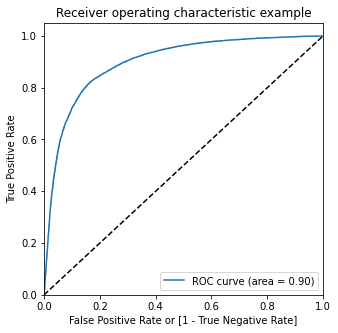

In [485]:
#Passing arguments in above defined fuction to see the ROC plot
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Churn, y_train_pred_final.Churn_Prob, drop_intermediate = False )
draw_roc(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

**Finding Optimal Cutoff Point**
* Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [486]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Churn  Churn_Prob  predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  \
0     0    0.510768          1    1    1    1    1    1    1    0    0    0   
1     0    0.140758          0    1    1    0    0    0    0    0    0    0   
2     1    0.395873          0    1    1    1    1    0    0    0    0    0   
3     1    0.906015          1    1    1    1    1    1    1    1    1    1   
4     0    0.365669          0    1    1    1    1    0    0    0    0    0   

   0.9  
0    0  
1    0  
2    0  
3    1  
4    0

In [487]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5, 0.5, 0.6,0.7,0.8,0.9]
for i in num:
    cm1 = confusion_matrix(y_train_pred_final.Churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.499074  1.000000  0.000000
0.1   0.1  0.681019  0.979466  0.383676
0.2   0.2  0.750369  0.953663  0.547826
0.3   0.3  0.790020  0.921572  0.658955
0.4   0.4  0.812126  0.883513  0.741003
0.5   0.5  0.825567  0.837929  0.813250
0.6   0.6  0.822777  0.774660  0.870716
0.7   0.7  0.799222  0.683062  0.914953
0.8   0.8  0.754769  0.559426  0.949389
0.9   0.9  0.648156  0.316239  0.978845


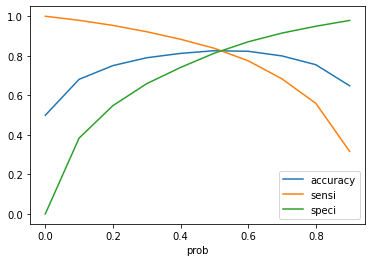

In [488]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

As we can see from above curve that our optimal cutoff is 0.5, which is same as the earlier selected cut-off. Therefore, we need not to change the cut-off.

In [489]:
#Confusion matrix 
confusion_mat = confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
print('Confusion Matrix:\n',confusion_mat,"\n\n")

#The overall accuracy.
accuracy_score = metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted).round(3)
print(f'Accuracy Score: {accuracy_score}')

Confusion Matrix:
 [[15185  3487]
 [ 3015 15588]] 


Accuracy Score: 0.826


In [490]:
TP = confusion_mat[1,1] # true positive 
TN = confusion_mat[0,0] # true negatives
FP = confusion_mat[0,1] # false positives
FN = confusion_mat[1,0] # false negatives

In [491]:
#Sensitivity / Recall
sensi = (TP / float(TP+FN)).round(3)
print(sensi)

0.838


In [492]:
#Specificity
speci = (TN / float(TN+FP)).round(3)
print(speci)

0.813


In [493]:
# Calculate false postive rate - predicting churn when customer does not have churned
FP_rate = (FP/ float(TN+FP)).round(3)
print(FP_rate)

0.187


In [494]:
# positive predictive value 
ppv = (TP / float(TP+FP)).round(3)
print(ppv)

0.817


In [495]:
# Negative predictive value
npv = (TN / float(TN+ FN)).round(3)
print(npv)

0.834


In [496]:
#Precision
prec = (TP/float(TP+FP)).round(3)
print(prec)

0.817


**Precision and recall tradeoff**

In [497]:
#Precision Recall Curve 
p, r, thresholds = precision_recall_curve(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

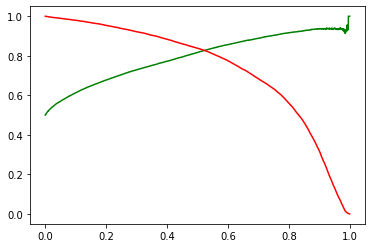

In [498]:
#Plot
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

####**8.1.5 Making Predictions on the Test Set**

In [499]:
#Adding constant for X_test
X_test = X_test[rfe_cols]
X_test_sm = sm.add_constant(X_test)

# Predict on test data

y_test_pred = res.predict(X_test_sm)
y_test_pred_final = pd.DataFrame({'Churn':y_test.values, 'Churn_Prob':y_test_pred})
y_test_pred_final['predicted'] = y_test_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_test_pred_final.head()

Churn  Churn_Prob  predicted
17428     0    0.356737          0
6017      0    0.435639          0
13351     0    0.376375          0
7804      0    0.091062          0
47754     1    0.536080          1

**Evaluating Model Performance**

Looking at the model evaluation metrics i.e., Confusion Matrix & Accuracy Score on the Test set

In [500]:
#Confusion matrix 
confusion_mat_test = confusion_matrix(y_test_pred_final.Churn, y_test_pred_final.predicted )
print('Confusion Matrix:\n',confusion_mat_test,"\n\n")

#The overall accuracy.
accuracy_score_test = metrics.accuracy_score(y_test_pred_final.Churn, y_test_pred_final.predicted).round(3)
print(f'Accuracy Score: {accuracy_score_test}')

Confusion Matrix:
 [[6363 1590]
 [1286 6736]] 


Accuracy Score: 0.82


In [501]:
TP = confusion_mat_test[1,1] # true positive 
TN = confusion_mat_test[0,0] # true negatives
FP = confusion_mat_test[0,1] # false positives
FN = confusion_mat_test[1,0] # false negatives

In [502]:
#Sensitivity / Recall
sensi = (TP / float(TP+FN)).round(3)
print(sensi)

0.84


In [503]:
#Specificity
speci = (TN / float(TN+FP)).round(3)
print(speci)

0.8


In [504]:
# Calculate false postive rate - predicting churn when customer does not have churned
FP_rate = (FP/ float(TN+FP)).round(3)
print(FP_rate)

0.2


In [505]:
# positive predictive value 
ppv = (TP / float(TP+FP)).round(3)
print(ppv)

0.809


In [506]:
# Negative predictive value
npv = (TN / float(TN+ FN)).round(3)
print(npv)

0.832


In [507]:
#Precision
prec = (TP/float(TP+FP)).round(3)
print(prec)

0.809


**Looking at Top 10 Predictors**

In [508]:
#Top 10 Predictors
abs(res.params).sort_values(ascending=False)[0:11]

const                   1.563263
loc_ic_mou_8            1.356493
monthly_3g_8            0.747024
monthly_2g_8            0.651790
spl_ic_mou_8            0.639930
total_rech_num_8        0.639280
offnet_mou_8            0.549379
last_day_rch_amt_8      0.549076
goodphase_loc_ic_mou    0.544867
onnet_mou_8             0.498493
sachet_2g_8             0.471493
dtype: float64

####**8.1.6 Observations from Logisitic Regression Model**

* With our final logistic regression model. We are getting any accuracy of 82.6% on Train Data and 82.0% on Test Data. This means that our model is an optimum fit model
* Sensitivity, Specificity and Precision on Test Data are also 84.0%, 80.0% and 80.9% respectively, which is sign of on optimal model
* Looking at the top 10 predictors, we can see most of the predictors are from 8th month i.e., action phase. Which is inline with business need. We need to target customers in action phase and take measures to retain them and avoid their churn.


###**8.2 Decision Tree**

####**Train-Test Split for Decision Tree Model**

In [509]:
# Splitting data into train and test set 70:30
X_train, X_test, y_train, y_test = train_test_split(X_smo, y_smo, train_size=0.7, test_size=0.3, random_state=100)

In [510]:
#Checking the shapes of splitted datasets
print("Train Datasets")
print(f'X_train shape : {X_train.shape}')
print(f'y_train shape : {y_train.shape}')

print("Test Datasets")
print(f'X_test shape : {X_test.shape}')
print(f'y_test shape : {y_test.shape}')

Train Datasets
X_train shape : (37275, 57)
y_train shape : (37275,)
Test Datasets
X_test shape : (15975, 57)
y_test shape : (15975,)


####**8.2.1 Decision Tree Classification Model**

In [511]:
#Instantitate DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=42, max_depth=10)

In [512]:
#Fitting the model
dtc.fit(X_train, y_train )

DecisionTreeClassifier(max_depth=10, random_state=42)

####**8.2.2 Making Predictions**

In [513]:
#Predictions on Train & Test Dataset
y_train_pred = dtc.predict(X_train)
y_test_pred = dtc.predict(X_test)

**Evaluating Model Performance**

Defining a function for Model evaluation

In [514]:
#Creating function for evaluating the model
def evaluate_model(dt_classifier):
  y_train_pred = dt_classifier.predict(X_train)
  y_test_pred = dt_classifier.predict(X_test)
  print('='*60)
  print("Train Dataset Performance")
  print(f'Accuracy Score of Train Data : {metrics.accuracy_score(y_train,y_train_pred).round(3)}')
  print(f'Confusion Matrix of Train Data : \n {metrics.confusion_matrix(y_train,y_train_pred)}')
  print( "\n", '='*60)
  print("Test Dataset Performance")
  print(f'Accuracy Score of Test Data : {metrics.accuracy_score(y_test,y_test_pred).round(3)}')
  print(f'Confusion Matrix of Test Data : \n {metrics.confusion_matrix(y_test,y_test_pred)}')    
  print('='*60)

**Model Evaulation Metrices**

In [515]:
#Evaluate Model using funciton
evaluate_model(dtc)

Train Dataset Performance
Accuracy Score of Train Data : 0.939
Confusion Matrix of Train Data : 
 [[17453  1219]
 [ 1051 17552]]

Test Dataset Performance
Accuracy Score of Test Data : 0.907
Confusion Matrix of Test Data : 
 [[7135  818]
 [ 673 7349]]


**Classification Report**

In [516]:
#Print the report on test data
print(metrics.classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.91      0.90      0.91      7953
           1       0.90      0.92      0.91      8022

    accuracy                           0.91     15975
   macro avg       0.91      0.91      0.91     15975
weighted avg       0.91      0.91      0.91     15975



**Plot ROC Curve**

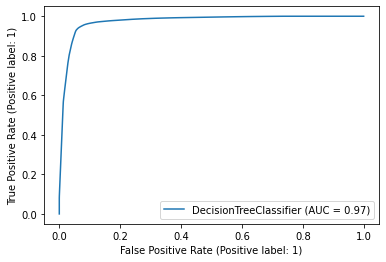

In [517]:
#ROC curve
plot_roc_curve(dtc, X_train, y_train, drop_intermediate=False)
plt.show()

**Observations from Decision Tree Model**
* With our Decision Tree model. We are getting any accuracy above 90% on Train Data and Test Data. This means that our model is an optimum fit model
* Area under ROC curve is also very good of 97%


####**8.2.3 Hyper Parameters Tuning**

**Hyper Parameter Tuning using Grid Search CV**

In [518]:
#Initiating New Decision Tree Classifier
dtc_new = DecisionTreeClassifier(random_state = 42)

In [519]:
#Defining Decision Tree Parameters
params = {
          'max_depth': [2, 3, 5, 10, 20, 30, 50],
          'min_samples_leaf' : [5, 10, 20, 50, 100,250, 500],
          'criterion' : ['gini', 'entropy']
}

In [520]:
#Defining Grid Search CV Parameters
grid_search = GridSearchCV(estimator = dtc_new,
             param_grid = params,
             cv = 4,
             n_jobs=-1, verbose = 1,
             scoring='accuracy'
             )

**Fitting the Train Datasets on Grid Search CV**

In [521]:
#Fitting the train on Grid Search CV
%%time
grid_search.fit(X_train,y_train)

Fitting 4 folds for each of 98 candidates, totalling 392 fits
CPU times: user 9.43 s, sys: 811 ms, total: 10.2 s
Wall time: 5min 15s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20, 30, 50],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 250, 500]},
             scoring='accuracy', verbose=1)

Creating a Dataframe of GridSearchCV Results

In [522]:
#Dataframe for CV results
cv_df = pd.DataFrame(grid_search.cv_results_)

In [523]:
#Looking at Dataframe Head
print(cv_df.head())

   mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.406900      0.034991         0.011055        0.005219   
1       0.383745      0.020317         0.008099        0.000286   
2       0.371532      0.004529         0.007982        0.000086   
3       0.362011      0.001166         0.007929        0.000108   
4       0.367178      0.009535         0.007896        0.000070   

  param_criterion param_max_depth param_min_samples_leaf  \
0            gini               2                      5   
1            gini               2                     10   
2            gini               2                     20   
3            gini               2                     50   
4            gini               2                    100   

                                              params  split0_test_score  \
0  {'criterion': 'gini', 'max_depth': 2, 'min_sam...           0.826162   
1  {'criterion': 'gini', 'max_depth': 2, 'min_sam...           0.826162   
2  {'criter

In [524]:
#Looking at Dataframe Head
print(cv_df.shape)

(98, 15)


In [525]:
#Looking at largest estimators
cv_df.nlargest(5, "mean_test_score")

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
77       3.148468      0.078170         0.011096        0.002141   
84       3.160294      0.098698         0.009547        0.000128   
91       3.156821      0.067411         0.009604        0.000520   
28       2.688734      0.232915         0.010076        0.000590   
35       3.367853      0.668162         0.017317        0.007333   

   param_criterion param_max_depth param_min_samples_leaf  \
77         entropy              20                      5   
84         entropy              30                      5   
91         entropy              50                      5   
28            gini              20                      5   
35            gini              30                      5   

                                               params  split0_test_score  \
77  {'criterion': 'entropy', 'max_depth': 20, 'min...           0.902994   
84  {'criterion': 'entropy', 'max_depth': 30, 'min...           0.903960   
91  {'criterion': 'entropy', 'max_depth': 50, 'min...           0.903960   
28  {'criterion': 'gini', 'max_depth': 20, 'min_sa...           0.906750   
35  {'criterion': 'gini', 'max_depth': 30, 'min_sa...           0.904389   

    split1_test_score  split2_test_score  split3_test_score  mean_test_score  \
77           0.909218           0.908574           0.918223         0.909752   
84           0.908252           0.907823           0.916720         0.909189   
91           0.908252           0.907823           0.916720         0.909189   
28           0.907608           0.907715           0.906740         0.907203   
35           0.904711           0.907823           0.906096         0.905755   

    std_test_score  rank_test_score  
77        0.005457                1  
84        0.004659                2  
91        0.004659                2  
28        0.000460                4  
35        0.001355                5

In [526]:
#Looking at best score
print(grid_search.best_score_.round(3))

0.91


In [527]:
#Looking at best estimator
grid_search.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=20, min_samples_leaf=5,
                       random_state=42)

In [528]:
#Creating new variable with best estimator
dt_best = grid_search.best_estimator_

**Making Prediction on Model after Grid Search CV**

In [529]:
#Making Predictions
y_train_pred = dt_best.predict(X_train)
y_test_pred = dt_best.predict(X_test)

**Model Evaulation Metrices**

In [530]:
#Model Evaluation after Grid Search CV
evaluate_model(dt_best)

Train Dataset Performance
Accuracy Score of Train Data : 0.974
Confusion Matrix of Train Data : 
 [[18216   456]
 [  506 18097]]

Test Dataset Performance
Accuracy Score of Test Data : 0.918
Confusion Matrix of Test Data : 
 [[7248  705]
 [ 607 7415]]


**Classification Report**

In [531]:
#Print the report on test data
print(metrics.classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.92      0.91      0.92      7953
           1       0.91      0.92      0.92      8022

    accuracy                           0.92     15975
   macro avg       0.92      0.92      0.92     15975
weighted avg       0.92      0.92      0.92     15975



**Plot ROC Curve**

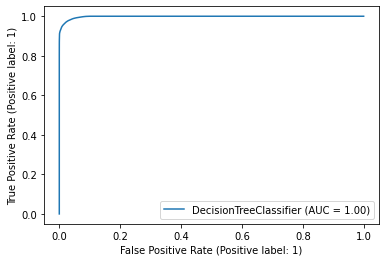

In [532]:
#ROC curve
plot_roc_curve(dt_best, X_train, y_train, drop_intermediate=False)
plt.show()

####**8.1.6 Observations from Decision Tree Model** (using GridSearchCV)
* Area under ROC curve has improved and became 100% by using the Grid Search CV method.
* Precision & Recall are above 90% Train Data and Test Data
* Best model is Decision Tree Model (using GridSearchCV) with best estimator: `DecisionTreeClassifier(criterion='entropy', max_depth=20, min_samples_leaf=5, random_state=42)`

##**9. Conclusions**

* As per the Business Problem, We need to reduce the Churn. Means we need to provide identify and provide offers who are going to churn as not doing so will incure loss to the company. In case we are providing offers to users who are not going to churn will cost less as compared to loosing a customer and bring new customer.  Therefore, we need to have high rate of correctly identifying the true positives, hence we need higher recall. 
* When we compare the models trained we can see the Decision Tree (using Grid Search CV) is performing the best, which is having high accuracy along with highest recall i.e. 92% and 91% respectively. So, we will go with Decision Tree (using Grid Search CV) model.



---


**Looking at the top 10 predictors from Logistic Regression Model**

**Here are some Recommendations**
1. Target the customers, whose minutes of usage of the incoming local calls and outgoing ISD calls are less in the 8th month i.e., action phase.
2. Target the customers, whose outgoing others charge in July and incoming others on August are less.
3. Customers having value based cost in the 8th month (action phase) increased are more likely to churn than the other customers. Hence, these customers may be a good target to provide offer.
4. Cutomers, whose monthly 2G and 3G recharge is more in 8th month (action phase) are likely to be churned.


================================== END OF CASE STUDY ===============================================

**By:**

**1. Anurag Pandit**

**2. Priya Gupta**

**DSC-40 : EPGDS**